In [527]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [528]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Amateur/FinalAmateurPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

gameId  team       summoner region champion  timestamp  \
0       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.000000   
1       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.000200   
2       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.495733   
3       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   2.000517   
4       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.979017   
...                 ...   ...            ...    ...      ...        ...   
838676  EUW1_6283483863   Red   anonymous 56   euw1    Annie  17.139450   
838677  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.688683   
838678  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.826867   
838679  EUW1_6283483863   Red   anonymous 56   euw1    Annie  25.901700   
838680  EUW1_6283483863   Red   anonymous 56   euw1    Annie  27.683317   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
0              329.0         650.0    1.0            0.0  ...   
1             6569.0       11391.0    1.0            0.0  ...   
2                NaN           NaN    NaN            NaN  ...   
3             4320.0       12059.0    1.0            0.0  ...   
4             4245.0       13217.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
838676           NaN           NaN    NaN            NaN  ...   
838677           NaN           NaN    NaN            NaN  ...   
838678           NaN           NaN    NaN            NaN  ...   
838679           NaN           NaN    NaN            NaN  ...   
838680           NaN           NaN    NaN            NaN  ...   

        trueDamageTaken  victory       eventType  skillSlot  buildingType  \
0                   0.0    False             NaN        NaN           NaN   
1                   0.0    False             NaN        NaN           NaN   
2                   NaN    False    SkillLevelUp        1.0           NaN   
3                   0.0    False             NaN        NaN           NaN   
4                   NaN    False          Assist        NaN           NaN   
...                 ...      ...             ...        ...           ...   
838676              NaN    False  Item purchased        NaN           NaN   
838677              NaN    False  Item purchased        NaN           NaN   
838678              NaN    False  Item purchased        NaN           NaN   
838679              NaN    False  Item purchased        NaN           NaN   
838680              NaN    False  Item purchased        NaN           NaN   

        lane  monster            itemName     role      rank  
0        NaN      NaN                 NaN  UTILITY  Platinum  
1        NaN      NaN                 NaN  UTILITY  Platinum  
2        NaN      NaN                 NaN  UTILITY  Platinum  
3        NaN      NaN                 NaN  UTILITY  Platinum  
4        NaN      NaN                 NaN  UTILITY  Platinum  
...      ...      ...                 ...      ...       ...  
838676   NaN      NaN           Kindlegem  UTILITY      Gold  
838677   NaN      NaN        Knight's Vow  UTILITY      Gold  
838678   NaN      NaN     Glacial Buckler  UTILITY      Gold  
838679   NaN      NaN           Kindlegem  UTILITY      Gold  
838680   NaN      NaN  Zeke's Convergence  UTILITY      Gold  

[838681 rows x 56 columns]

In [529]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death")]
top_deaths_df

gameId  team       summoner region champion  timestamp  \
3471    EUW1_6276409988  Blue  anonymous 130   euw1   Singed  14.727967   
3488    EUW1_6276409988  Blue  anonymous 130   euw1   Singed  22.273483   
3514    EUW1_6275563297   Red  anonymous 130   euw1   Singed   3.267650   
3520    EUW1_6275563297   Red  anonymous 130   euw1   Singed   5.931200   
3526    EUW1_6275563297   Red  anonymous 130   euw1   Singed   8.785300   
...                 ...   ...            ...    ...      ...        ...   
643443  EUW1_6289796520   Red  anonymous 180   euw1   Yorick  20.601450   
643510  EUW1_6289751522  Blue  anonymous 180   euw1   Yorick  18.121150   
643512  EUW1_6289751522  Blue  anonymous 180   euw1   Yorick  19.537900   
643517  EUW1_6289751522  Blue  anonymous 180   euw1   Yorick  22.041200   
643556  EUW1_6289696584  Blue  anonymous 180   euw1    Nasus  20.391050   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3471          6520.0       13909.0    NaN            NaN  ...   
3488          5429.0       13998.0    NaN            NaN  ...   
3514          3777.0       13520.0    NaN            NaN  ...   
3520          1780.0       11652.0    NaN            NaN  ...   
3526          3208.0       11933.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
643443        4270.0        9212.0    NaN            NaN  ...   
643510        2825.0       12558.0    NaN            NaN  ...   
643512       11724.0        4087.0    NaN            NaN  ...   
643517        1642.0        9813.0    NaN            NaN  ...   
643556         714.0        6706.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3471                NaN     True      Death        NaN           NaN   NaN   
3488                NaN     True      Death        NaN           NaN   NaN   
3514                NaN     True      Death        NaN           NaN   NaN   
3520                NaN     True      Death        NaN           NaN   NaN   
3526                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
643443              NaN     True      Death        NaN           NaN   NaN   
643510              NaN    False      Death        NaN           NaN   NaN   
643512              NaN    False      Death        NaN           NaN   NaN   
643517              NaN    False      Death        NaN           NaN   NaN   
643556              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
3471        NaN       NaN   TOP  Gold  
3488        NaN       NaN   TOP  Gold  
3514        NaN       NaN   TOP  Gold  
3520        NaN       NaN   TOP  Gold  
3526        NaN       NaN   TOP  Gold  
...         ...       ...   ...   ...  
643443      NaN       NaN   TOP  Gold  
643510      NaN       NaN   TOP  Gold  
643512      NaN       NaN   TOP  Gold  
643517      NaN       NaN   TOP  Gold  
643556      NaN       NaN   TOP  Gold  

[11752 rows x 56 columns]

In [530]:
print("This dataset contains {} matches in which the top died at least once".format(len(np.unique(top_deaths_df["gameId"]))))

This dataset contains 1984 matches in which the top died at least once


In [531]:
print("{} players died a total of {} times".format(len(np.unique(top_deaths_df["summoner"])), top_deaths_df.shape[0]))

35 players died a total of 11752 times


In [532]:
print("This Dataset contains an average of {} deaths per game".format((top_deaths_df.shape[0]/len(np.unique(top_deaths_df["gameId"])))))

This Dataset contains an average of 5.923387096774194 deaths per game


In [533]:
blueSide_top_deaths_df = top_deaths_df[top_deaths_df["team"] == "Blue"]
blueSide_top_deaths_df

gameId  team       summoner region champion  timestamp  \
3471    EUW1_6276409988  Blue  anonymous 130   euw1   Singed  14.727967   
3488    EUW1_6276409988  Blue  anonymous 130   euw1   Singed  22.273483   
3672    EUW1_6274285224  Blue  anonymous 130   euw1   Singed   2.538700   
3676    EUW1_6274285224  Blue  anonymous 130   euw1   Singed   3.841017   
3681    EUW1_6274285224  Blue  anonymous 130   euw1   Singed   6.196667   
...                 ...   ...            ...    ...      ...        ...   
643269  EUW1_6289931620  Blue  anonymous 180   euw1   Yorick  13.617750   
643510  EUW1_6289751522  Blue  anonymous 180   euw1   Yorick  18.121150   
643512  EUW1_6289751522  Blue  anonymous 180   euw1   Yorick  19.537900   
643517  EUW1_6289751522  Blue  anonymous 180   euw1   Yorick  22.041200   
643556  EUW1_6289696584  Blue  anonymous 180   euw1    Nasus  20.391050   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3471          6520.0       13909.0    NaN            NaN  ...   
3488          5429.0       13998.0    NaN            NaN  ...   
3672          1236.0       11369.0    NaN            NaN  ...   
3676         10327.0       14150.0    NaN            NaN  ...   
3681          3624.0       11192.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
643269        3139.0       13226.0    NaN            NaN  ...   
643510        2825.0       12558.0    NaN            NaN  ...   
643512       11724.0        4087.0    NaN            NaN  ...   
643517        1642.0        9813.0    NaN            NaN  ...   
643556         714.0        6706.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3471                NaN     True      Death        NaN           NaN   NaN   
3488                NaN     True      Death        NaN           NaN   NaN   
3672                NaN     True      Death        NaN           NaN   NaN   
3676                NaN     True      Death        NaN           NaN   NaN   
3681                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
643269              NaN     True      Death        NaN           NaN   NaN   
643510              NaN    False      Death        NaN           NaN   NaN   
643512              NaN    False      Death        NaN           NaN   NaN   
643517              NaN    False      Death        NaN           NaN   NaN   
643556              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
3471        NaN       NaN   TOP  Gold  
3488        NaN       NaN   TOP  Gold  
3672        NaN       NaN   TOP  Gold  
3676        NaN       NaN   TOP  Gold  
3681        NaN       NaN   TOP  Gold  
...         ...       ...   ...   ...  
643269      NaN       NaN   TOP  Gold  
643510      NaN       NaN   TOP  Gold  
643512      NaN       NaN   TOP  Gold  
643517      NaN       NaN   TOP  Gold  
643556      NaN       NaN   TOP  Gold  

[5766 rows x 56 columns]

In [534]:
gamesBlueSide = len(np.unique(blueSide_top_deaths_df["gameId"]))
gamesBlueSide

987

In [535]:
players_df = np.unique(blueSide_top_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_top_deaths_df[blueSide_top_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 102 played 21 matches
anonymous 112 played 38 matches
anonymous 119 played 43 matches
anonymous 120 played 65 matches
anonymous 121 played 23 matches
anonymous 122 played 19 matches
anonymous 123 played 16 matches
anonymous 13 played 27 matches
anonymous 130 played 20 matches
anonymous 142 played 14 matches
anonymous 144 played 10 matches
anonymous 147 played 21 matches
anonymous 151 played 13 matches
anonymous 156 played 27 matches
anonymous 159 played 16 matches
anonymous 164 played 31 matches
anonymous 167 played 24 matches
anonymous 171 played 16 matches
anonymous 176 played 27 matches
anonymous 177 played 14 matches
anonymous 180 played 23 matches
anonymous 25 played 19 matches
anonymous 27 played 10 matches
anonymous 38 played 54 matches
anonymous 4 played 57 matches
anonymous 41 played 55 matches
anonymous 42 played 28 matches
anonymous 47 played 33 matches
anonymous 48 played 31 matches
anonymous 5 played 22 matches
anonymous 62 played 22 matches
anonymous 7 played 38

In [536]:
print("Blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSide_top_deaths_df["gameId"]))))

Blue side contains 987 matches in which the top died at least once


In [537]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_top_deaths_df["summoner"])), blueSide_top_deaths_df.shape[0]))

35 players died a total of 5766 times on the blue side


In [538]:
redSide_top_deaths_df = top_deaths_df[top_deaths_df["team"] == "Red"]
redSide_top_deaths_df

gameId team       summoner region champion  timestamp  \
3514    EUW1_6275563297  Red  anonymous 130   euw1   Singed   3.267650   
3520    EUW1_6275563297  Red  anonymous 130   euw1   Singed   5.931200   
3526    EUW1_6275563297  Red  anonymous 130   euw1   Singed   8.785300   
3529    EUW1_6275563297  Red  anonymous 130   euw1   Singed   9.745567   
3534    EUW1_6275563297  Red  anonymous 130   euw1   Singed  11.489383   
...                 ...  ...            ...    ...      ...        ...   
643347  EUW1_6289889931  Red  anonymous 180   euw1   Yorick  21.774150   
643430  EUW1_6289796520  Red  anonymous 180   euw1   Yorick  15.175550   
643434  EUW1_6289796520  Red  anonymous 180   euw1   Yorick  17.062267   
643438  EUW1_6289796520  Red  anonymous 180   euw1   Yorick  18.843033   
643443  EUW1_6289796520  Red  anonymous 180   euw1   Yorick  20.601450   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3514          3777.0       13520.0    NaN            NaN  ...   
3520          1780.0       11652.0    NaN            NaN  ...   
3526          3208.0       11933.0    NaN            NaN  ...   
3529          1577.0       12095.0    NaN            NaN  ...   
3534           842.0        7541.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
643347        2710.0        9952.0    NaN            NaN  ...   
643430        1603.0       11809.0    NaN            NaN  ...   
643434        3029.0       12628.0    NaN            NaN  ...   
643438        3999.0       12762.0    NaN            NaN  ...   
643443        4270.0        9212.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3514                NaN     True      Death        NaN           NaN   NaN   
3520                NaN     True      Death        NaN           NaN   NaN   
3526                NaN     True      Death        NaN           NaN   NaN   
3529                NaN     True      Death        NaN           NaN   NaN   
3534                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
643347              NaN    False      Death        NaN           NaN   NaN   
643430              NaN     True      Death        NaN           NaN   NaN   
643434              NaN     True      Death        NaN           NaN   NaN   
643438              NaN     True      Death        NaN           NaN   NaN   
643443              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
3514        NaN       NaN   TOP  Gold  
3520        NaN       NaN   TOP  Gold  
3526        NaN       NaN   TOP  Gold  
3529        NaN       NaN   TOP  Gold  
3534        NaN       NaN   TOP  Gold  
...         ...       ...   ...   ...  
643347      NaN       NaN   TOP  Gold  
643430      NaN       NaN   TOP  Gold  
643434      NaN       NaN   TOP  Gold  
643438      NaN       NaN   TOP  Gold  
643443      NaN       NaN   TOP  Gold  

[5986 rows x 56 columns]

In [539]:
gamesRedSide = len(np.unique(redSide_top_deaths_df["gameId"]))
gamesRedSide

997

In [540]:
redSideVictory_top_deaths_df = redSide_top_deaths_df[redSide_top_deaths_df["victory"] == True]
blueSideVictory_top_deaths_df = blueSide_top_deaths_df[blueSide_top_deaths_df["victory"] == True]

winsRedSide = len(np.unique(redSideVictory_top_deaths_df["gameId"]))
winsBlueSide = len(np.unique(blueSideVictory_top_deaths_df["gameId"]))

print("Red Team Victories: {}".format(winsRedSide))
print("Blue Team Victories: {}".format(winsBlueSide))

Red Team Victories: 521
Blue Team Victories: 527


In [541]:
players_df = np.unique(redSide_top_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_top_deaths_df[redSide_top_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 102 played 27 matches
anonymous 112 played 41 matches
anonymous 119 played 36 matches
anonymous 120 played 65 matches
anonymous 121 played 18 matches
anonymous 122 played 21 matches
anonymous 123 played 16 matches
anonymous 13 played 29 matches
anonymous 130 played 20 matches
anonymous 142 played 12 matches
anonymous 144 played 22 matches
anonymous 147 played 26 matches
anonymous 151 played 13 matches
anonymous 156 played 22 matches
anonymous 159 played 11 matches
anonymous 164 played 38 matches
anonymous 167 played 29 matches
anonymous 171 played 9 matches
anonymous 176 played 24 matches
anonymous 177 played 12 matches
anonymous 180 played 17 matches
anonymous 25 played 25 matches
anonymous 27 played 18 matches
anonymous 38 played 50 matches
anonymous 4 played 42 matches
anonymous 41 played 46 matches
anonymous 42 played 18 matches
anonymous 47 played 26 matches
anonymous 48 played 31 matches
anonymous 5 played 29 matches
anonymous 62 played 36 matches
anonymous 7 played 39 

In [542]:
print("Red side contains {} matches in which the top died at least once".format(len(np.unique(redSide_top_deaths_df["gameId"]))))

Red side contains 997 matches in which the top died at least once


In [543]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_top_deaths_df["summoner"])), redSide_top_deaths_df.shape[0]))

35 players died a total of 5986 times on the red side


function to visualize the results

In [544]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Top Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Top Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [545]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [546]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [547]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [548]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.ylabel('Deaths')
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [549]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Iron Players

#### Clustering Red Team Victory

In [550]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)]
redSideVictory_df

gameId team      summoner region    champion  timestamp  \
98573   EUW1_6283609128  Red   anonymous 4   euw1      Yorick   3.454833   
98580   EUW1_6283609128  Red   anonymous 4   euw1      Yorick   6.158433   
98588   EUW1_6283609128  Red   anonymous 4   euw1      Yorick   9.980533   
98591   EUW1_6283609128  Red   anonymous 4   euw1      Yorick  10.994517   
98596   EUW1_6283609128  Red   anonymous 4   euw1      Yorick  13.312267   
...                 ...  ...           ...    ...         ...        ...   
621182  EUW1_6289878511  Red   anonymous 5   euw1       Nasus  29.413283   
621997  EUW1_6289225940  Red  anonymous 13   euw1  Tryndamere   2.939000   
622012  EUW1_6289225940  Red  anonymous 13   euw1  Tryndamere  10.070383   
622016  EUW1_6289225940  Red  anonymous 13   euw1  Tryndamere  12.012883   
622023  EUW1_6289225940  Red  anonymous 13   euw1  Tryndamere  16.520533   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
98573         3672.0       13913.0    NaN            NaN  ...   
98580         4230.0       13346.0    NaN            NaN  ...   
98588         2410.0       12012.0    NaN            NaN  ...   
98591         6437.0        8682.0    NaN            NaN  ...   
98596         3060.0       12682.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
621182        1744.0        3852.0    NaN            NaN  ...   
621997        1914.0       13032.0    NaN            NaN  ...   
622012        2999.0       12808.0    NaN            NaN  ...   
622016        1188.0       10783.0    NaN            NaN  ...   
622023        4772.0        9907.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
98573               NaN     True      Death        NaN           NaN   NaN   
98580               NaN     True      Death        NaN           NaN   NaN   
98588               NaN     True      Death        NaN           NaN   NaN   
98591               NaN     True      Death        NaN           NaN   NaN   
98596               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
621182              NaN     True      Death        NaN           NaN   NaN   
621997              NaN     True      Death        NaN           NaN   NaN   
622012              NaN     True      Death        NaN           NaN   NaN   
622016              NaN     True      Death        NaN           NaN   NaN   
622023              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
98573       NaN       NaN   TOP  Iron  
98580       NaN       NaN   TOP  Iron  
98588       NaN       NaN   TOP  Iron  
98591       NaN       NaN   TOP  Iron  
98596       NaN       NaN   TOP  Iron  
...         ...       ...   ...   ...  
621182      NaN       NaN   TOP  Iron  
621997      NaN       NaN   TOP  Iron  
622012      NaN       NaN   TOP  Iron  
622016      NaN       NaN   TOP  Iron  
622023      NaN       NaN   TOP  Iron  

[380 rows x 56 columns]

In [551]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)].copy()

In [552]:
redSideGames_df = top_deaths_df[top_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [553]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

80

In [554]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

57.55395683453237

In [555]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

6.348145673237554

In [556]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 13 won 17 matches on the red side
anonymous 13 has an average of 5.882352941176471 deaths per game when winning on the red side

anonymous 4 won 27 matches on the red side
anonymous 4 has an average of 3.8518518518518516 deaths per game when winning on the red side

anonymous 5 won 15 matches on the red side
anonymous 5 has an average of 6.666666666666667 deaths per game when winning on the red side

anonymous 7 won 21 matches on the red side
anonymous 7 has an average of 3.619047619047619 deaths per game when winning on the red side



In [557]:
print("Victory games on red side contains {} matches in which the top died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 80 matches in which the top died at least once
4 players died a total of 380 times on the red side
Victory games on red side contains an average of 4.75 deaths per game


In [558]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
98573         3672.0       13913.0   3.454833
98580         4230.0       13346.0   6.158433
98588         2410.0       12012.0   9.980533
98591         6437.0        8682.0  10.994517
98596         3060.0       12682.0  13.312267
...              ...           ...        ...
621182        1744.0        3852.0  29.413283
621997        1914.0       13032.0   2.939000
622012        2999.0       12808.0  10.070383
622016        1188.0       10783.0  12.012883
622023        4772.0        9907.0  16.520533

[380 rows x 3 columns]

Time discretization

In [559]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [560]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [561]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [562]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [563]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
98573      -0.116170      1.175667         -1
98580       0.095344      1.029672         -1
98588      -0.594542      0.686182         -1
98591       0.931926     -0.171253         -1
98596      -0.348154      0.858699         -1
...              ...           ...        ...
621182     -0.846995     -1.414921          1
621997     -0.782555      0.948820         -1
622012     -0.371277      0.891143         -1
622016     -1.057751      0.369729         -1
622023      0.300794      0.144170          0

[380 rows x 3 columns]

In [564]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.39844680401063737
Silhouette score for k=3: 0.4720163027243763
Silhouette score for k=4: 0.41134349791868635
Silhouette score for k=5: 0.39812618034774566
Silhouette score for k=6: 0.39448264347297723
Silhouette score for k=7: 0.3359860986726564
Silhouette score for k=8: 0.347605715418756
Silhouette score for k=9: 0.35888315862465187
Silhouette score for k=10: 0.356715502832891
Silhouette score for k=11: 0.3814152655595067
Silhouette score for k=12: 0.3775727214946254
Silhouette score for k=13: 0.3786907279196446
Silhouette score for k=14: 0.38784593509802834
Silhouette score for k=15: 0.3967874071812492


K-Means with k = 4

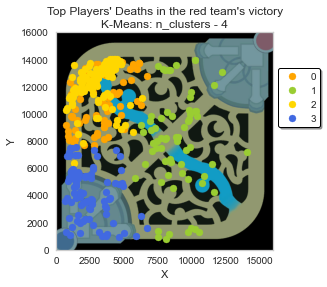

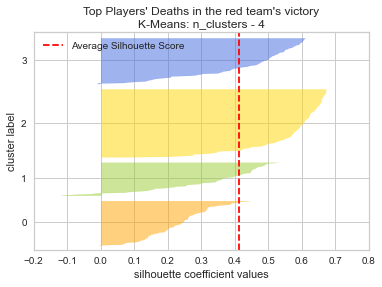

Silhouette score: 0.41134349791868635
2    135
3     91
0     88
1     66
Name: cluster, dtype: int64

Inertia: 284.0414556368723

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3241.568182  11153.363636   0.215909
1        1   8855.454545   7847.121212   0.196970
2        2   3112.585185  12349.400000  -1.000000
3        3   2438.483516   4234.285714   0.593407

In [565]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["orange", "yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

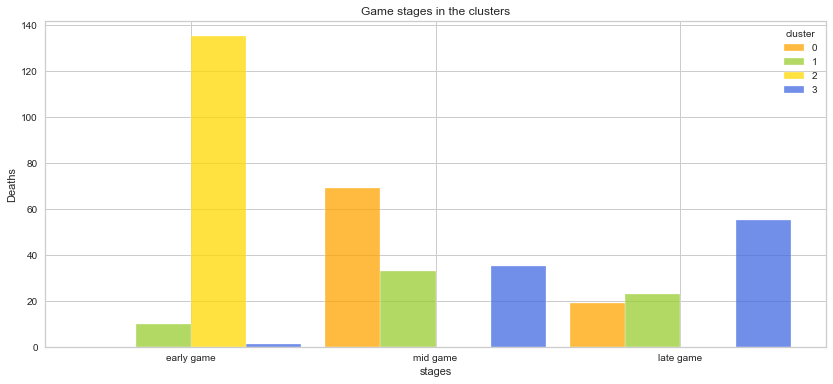

In [566]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

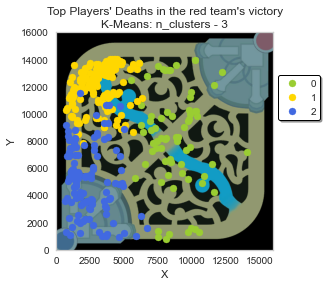

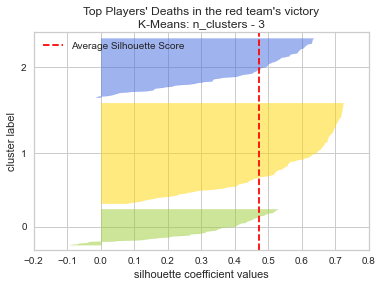

Silhouette score: 0.4720163027243763
1    195
2    115
0     70
Name: cluster, dtype: int64

Inertia: 352.8722745854474

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8700.242857   8108.885714   0.214286
1        1   3179.984615  12241.374359  -0.656410
2        2   2458.304348   5193.086957   0.556522

In [567]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [568]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1633.729681   3516.901187   0.673856
1        1   1228.399123   1405.947042   0.535793
2        2   1360.453768   2562.320747   0.530649

In [569]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14027.0            5537.0           13958.0   
1        1            6320.0             774.0           14056.0   
2        2            6670.0             630.0           11523.0   

   min coordinate_y  max timestamp  min timestamp  
0             827.0              1             -1  
1            7882.0              1             -1  
2             925.0              1             -1

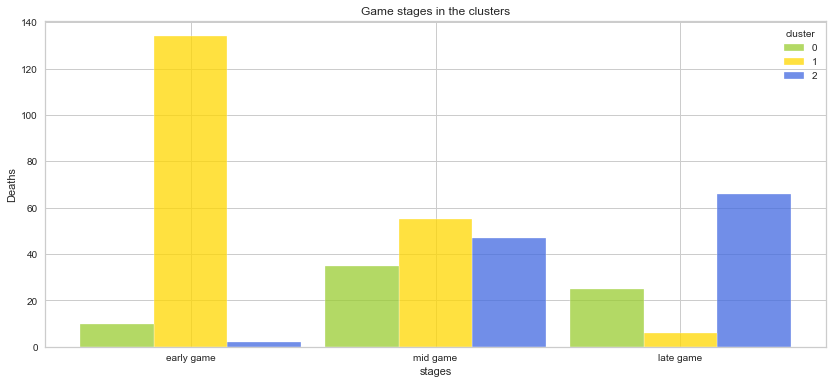

In [570]:
stagesPerClusterV2(redSideVictory_df, colors)

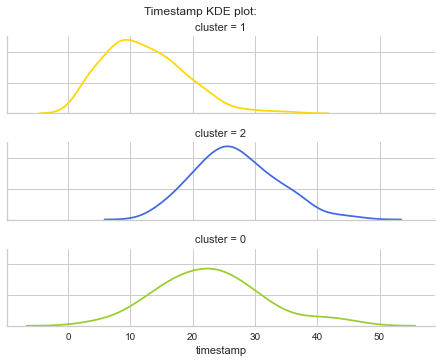

In [571]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [572]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Yorick            25
Tryndamere        14
Darius            14
Chogath            8
Mordekaiser        4
Nasus              2
TahmKench          2
Teemo              2
Gangplank          2
Warwick            2
Volibear           1
Garen              1
Kayle              1
Yone               1
Jax                1

Deaths with each champion:

In [573]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Yorick         100
Tryndamere      79
Chogath         48
Darius          48
Gangplank       17
Mordekaiser     15
Nasus           13
TahmKench       12
Volibear        10
Yone             9
Jax              9
Teemo            6
Kayle            6
Warwick          5
Garen            3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [574]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 15 champions when they won on the red side

Cluster 0 - died with 11 champions:
 ['Chogath' 'Darius' 'Gangplank' 'Jax' 'Mordekaiser' 'Nasus' 'TahmKench'
 'Teemo' 'Tryndamere' 'Yone' 'Yorick']
Yorick         31
Darius         11
Tryndamere      7
Jax             5
Chogath         4
Mordekaiser     4
Teemo           3
Yone            2
TahmKench       1
Nasus           1
Gangplank       1
Name: champion, dtype: int64

Cluster 1 - died with 15 champions:
 ['Chogath' 'Darius' 'Gangplank' 'Garen' 'Jax' 'Kayle' 'Mordekaiser'
 'Nasus' 'TahmKench' 'Teemo' 'Tryndamere' 'Volibear' 'Warwick' 'Yone'
 'Yorick']
Tryndamere     43
Yorick         42
Chogath        29
Darius         23
TahmKench       9
Mordekaiser     9
Gangplank       8
Volibear        7
Nasus           6
Yone            5
Warwick         4
Kayle           4
Jax             3
Garen           2
Teemo           1
Name: champion, dtype: int64

Cluster 2 - died with 15 champions:
 ['Chogath' 'Darius' 'Gangplan

---
#### Clustering Red Team Defeat

In [575]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region    champion  timestamp  \
98795   EUW1_6283418598  Red   anonymous 4   euw1      Yorick   5.311850   
98812   EUW1_6283418598  Red   anonymous 4   euw1      Yorick  14.121450   
98838   EUW1_6283418598  Red   anonymous 4   euw1      Yorick  26.829733   
98842   EUW1_6283418598  Red   anonymous 4   euw1      Yorick  28.941417   
98972   EUW1_6283041391  Red   anonymous 4   euw1      Yorick   6.508167   
...                 ...  ...           ...    ...         ...        ...   
621969  EUW1_6289334437  Red  anonymous 13   euw1  Tryndamere  11.270400   
621973  EUW1_6289334437  Red  anonymous 13   euw1  Tryndamere  13.959133   
621980  EUW1_6289334437  Red  anonymous 13   euw1  Tryndamere  17.824017   
621985  EUW1_6289334437  Red  anonymous 13   euw1  Tryndamere  20.526350   
621990  EUW1_6289334437  Red  anonymous 13   euw1  Tryndamere  22.182233   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
98795         4861.0       14039.0    NaN            NaN  ...   
98812         1125.0       10778.0    NaN            NaN  ...   
98838        13790.0        9063.0    NaN            NaN  ...   
98842         7690.0        9738.0    NaN            NaN  ...   
98972         1179.0       12177.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
621969        2154.0       12783.0    NaN            NaN  ...   
621973        3935.0       13731.0    NaN            NaN  ...   
621980        1220.0       11915.0    NaN            NaN  ...   
621985        9639.0        9082.0    NaN            NaN  ...   
621990        7020.0       13433.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
98795               NaN    False      Death        NaN           NaN   NaN   
98812               NaN    False      Death        NaN           NaN   NaN   
98838               NaN    False      Death        NaN           NaN   NaN   
98842               NaN    False      Death        NaN           NaN   NaN   
98972               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
621969              NaN    False      Death        NaN           NaN   NaN   
621973              NaN    False      Death        NaN           NaN   NaN   
621980              NaN    False      Death        NaN           NaN   NaN   
621985              NaN    False      Death        NaN           NaN   NaN   
621990              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
98795       NaN       NaN   TOP  Iron  
98812       NaN       NaN   TOP  Iron  
98838       NaN       NaN   TOP  Iron  
98842       NaN       NaN   TOP  Iron  
98972       NaN       NaN   TOP  Iron  
...         ...       ...   ...   ...  
621969      NaN       NaN   TOP  Iron  
621973      NaN       NaN   TOP  Iron  
621980      NaN       NaN   TOP  Iron  
621985      NaN       NaN   TOP  Iron  
621990      NaN       NaN   TOP  Iron  

[395 rows x 56 columns]

In [576]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)].copy()

In [577]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 13 lost 12 matches on the red side
anonymous 13 has an average of 8.833333333333334 deaths per game when losing on the red side

anonymous 4 lost 15 matches on the red side
anonymous 4 has an average of 5.0 deaths per game when losing on the red side

anonymous 5 lost 14 matches on the red side
anonymous 5 has an average of 8.642857142857142 deaths per game when losing on the red side

anonymous 7 lost 18 matches on the red side
anonymous 7 has an average of 5.166666666666667 deaths per game when losing on the red side



In [578]:
print("Defeat games on red side contains {} matches in which the top died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 59 matches in which the top died at least once
4 players died a total of 395 times on the red side
Defeat games on red side contains an average of 6.694915254237288 deaths per game


In [579]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
98795         4861.0       14039.0   5.311850
98812         1125.0       10778.0  14.121450
98838        13790.0        9063.0  26.829733
98842         7690.0        9738.0  28.941417
98972         1179.0       12177.0   6.508167
...              ...           ...        ...
621969        2154.0       12783.0  11.270400
621973        3935.0       13731.0  13.959133
621980        1220.0       11915.0  17.824017
621985        9639.0        9082.0  20.526350
621990        7020.0       13433.0  22.182233

[395 rows x 3 columns]

Time discretization

In [580]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [581]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [582]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [583]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [584]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
98795      -0.315115      1.185851         -1
98812      -1.298712      0.163431         -1
98838       2.035670     -0.374273          1
98842       0.429691     -0.162640          1
98972      -1.284495      0.602059         -1
...              ...           ...        ...
621969     -1.027802      0.792058         -1
621973     -0.558908      1.089284         -1
621980     -1.273701      0.519914          0
621985      0.942814     -0.368316          0
621990      0.253296      0.995852          0

[395 rows x 3 columns]

In [585]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.40498105632977915
Silhouette score for k=3: 0.4234623074722125
Silhouette score for k=4: 0.42963638687340594
Silhouette score for k=5: 0.3910137650289317
Silhouette score for k=6: 0.3958678663473312
Silhouette score for k=7: 0.40920027699950395
Silhouette score for k=8: 0.4238910380695699
Silhouette score for k=9: 0.4286146079288797
Silhouette score for k=10: 0.43136647836410275
Silhouette score for k=11: 0.44356201101553266
Silhouette score for k=12: 0.41633087535877056
Silhouette score for k=13: 0.4156952870285707
Silhouette score for k=14: 0.41480090191714436
Silhouette score for k=15: 0.41697460185483065
Silhouette score for k=16: 0.4151007478096361
Silhouette score for k=17: 0.4083467829667246
Silhouette score for k=18: 0.4291723092343259
Silhouette score for k=19: 0.4311858717802033
Silhouette score for k=20: 0.4217431624443604
Silhouette score for k=25: 0.3932603597835518


K-Means with k = 4

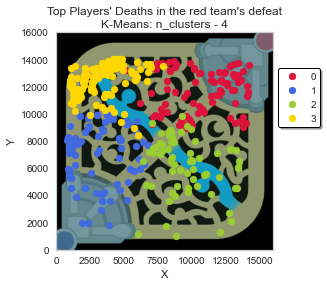

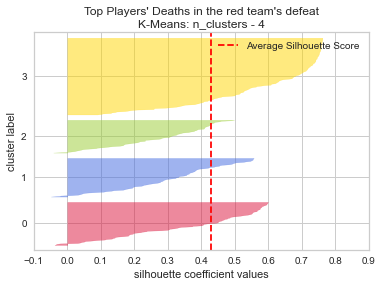

Silhouette score: 0.42963638687340594
3    158
0     89
1     80
2     68
Name: cluster, dtype: int64

Inertia: 299.47349505563704

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10654.831461  11664.157303   0.662921
1        1   3115.937500   7287.950000   0.637500
2        2   9480.764706   6246.147059   0.294118
3        3   3484.968354  12693.215190  -0.696203

In [586]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "purple", "yellowgreen", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

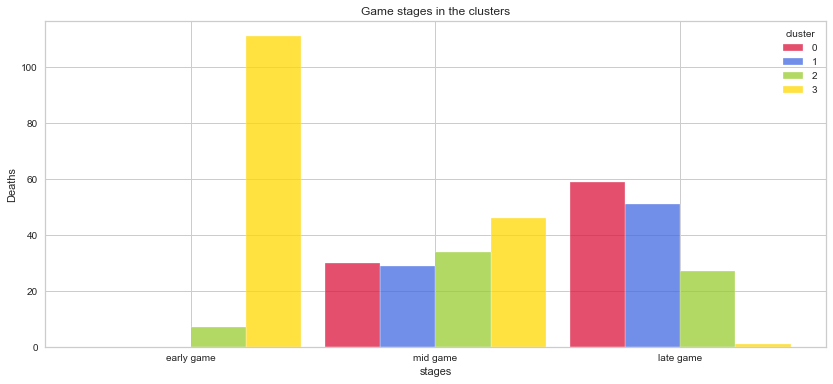

In [587]:
stagesPerClusterV2(redSideDefeat_df, colors)

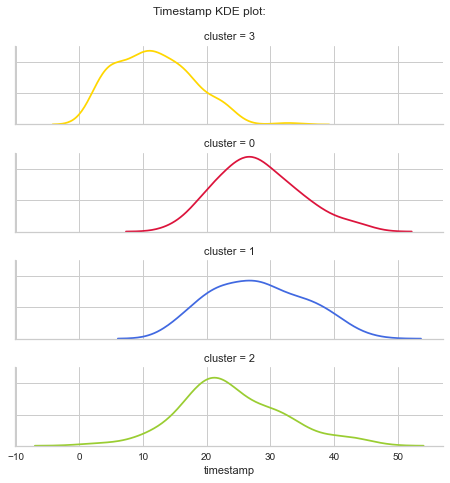

In [588]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

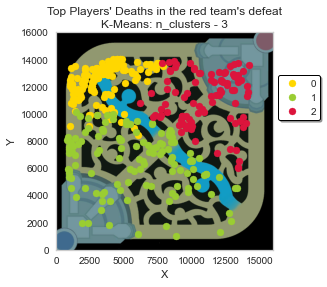

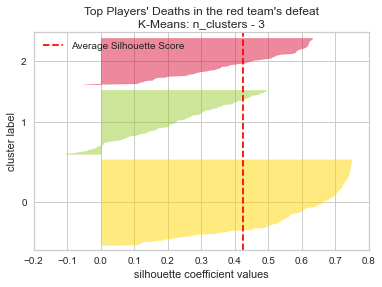

Silhouette score: 0.4234623074722125
0    172
1    129
2     94
Name: cluster, dtype: int64

Inertia: 397.40003715542986

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3531.680233  12587.767442  -0.616279
1        1   5833.550388   6512.193798   0.527132
2        2  10988.244681  11130.244681   0.617021

In [589]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [590]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1509.727107   1202.091599   0.542788
1        1   3408.103032   2170.262071   0.585053
2        2   2111.720181   1921.400629   0.507526

In [591]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            7860.0            1033.0           14060.0   
1        1           13352.0             842.0           10146.0   
2        2           14173.0            6192.0           13895.0   

   min coordinate_y  max timestamp  min timestamp  
0            8439.0              1             -1  
1            1039.0              1             -1  
2            5989.0              1             -1

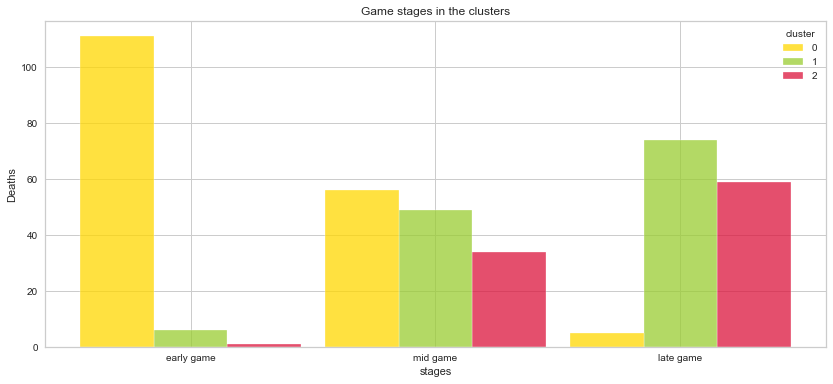

In [592]:
stagesPerClusterV2(redSideDefeat_df, colors)

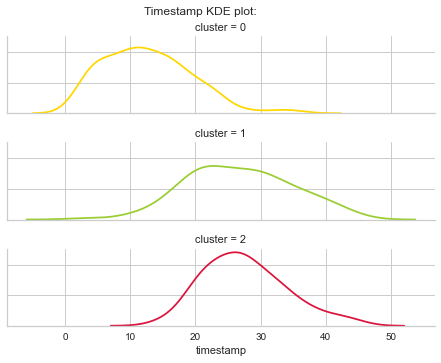

In [593]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [594]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Darius            14
Yorick            13
Chogath            7
Tryndamere         6
Irelia             3
Teemo              3
Garen              2
Gangplank          2
Jax                2
Sion               1
Kennen             1
Mordekaiser        1
Volibear           1
Renekton           1
Nasus              1
Kayle              1

Deaths with each champion:

In [595]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Darius         87
Yorick         69
Chogath        57
Tryndamere     52
Irelia         25
Garen          18
Gangplank      18
Teemo          16
Kennen         10
Kayle          10
Mordekaiser     8
Sion            7
Jax             7
Renekton        5
Volibear        4
Nasus           2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [596]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 16 champions when they won on the red side

Cluster 0 - died with 16 champions:
 ['Chogath' 'Darius' 'Gangplank' 'Garen' 'Irelia' 'Jax' 'Kayle' 'Kennen'
 'Mordekaiser' 'Nasus' 'Renekton' 'Sion' 'Teemo' 'Tryndamere' 'Volibear'
 'Yorick']
Chogath        29
Yorick         28
Darius         28
Irelia         19
Tryndamere     17
Gangplank      10
Teemo           9
Garen           7
Sion            5
Kennen          4
Renekton        4
Kayle           4
Jax             3
Mordekaiser     2
Nasus           2
Volibear        1
Name: champion, dtype: int64

Cluster 1 - died with 13 champions:
 ['Chogath' 'Darius' 'Gangplank' 'Garen' 'Irelia' 'Jax' 'Kayle' 'Kennen'
 'Mordekaiser' 'Renekton' 'Sion' 'Tryndamere' 'Yorick']
Darius         33
Tryndamere     30
Yorick         21
Chogath        16
Garen           7
Mordekaiser     6
Kayle           5
Irelia          3
Kennen          2
Gangplank       2
Jax             2
Sion            1
Renekton        1
Name: champion, dt

---
#### Clustering Blue Team Victory

In [597]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team      summoner region    champion  timestamp  \
98455   EUW1_6283895885  Blue   anonymous 4   euw1      Yorick   6.145517   
98470   EUW1_6283895885  Blue   anonymous 4   euw1      Yorick  13.852850   
98480   EUW1_6283895885  Blue   anonymous 4   euw1      Yorick  17.508350   
98486   EUW1_6283895885  Blue   anonymous 4   euw1      Yorick  20.012783   
98489   EUW1_6283895885  Blue   anonymous 4   euw1      Yorick  22.308400   
...                 ...   ...           ...    ...         ...        ...   
573742  EUW1_6287504677  Blue  anonymous 13   euw1  Tryndamere   6.544867   
573756  EUW1_6287504677  Blue  anonymous 13   euw1  Tryndamere  13.418400   
573764  EUW1_6287504677  Blue  anonymous 13   euw1  Tryndamere  17.564583   
573770  EUW1_6287504677  Blue  anonymous 13   euw1  Tryndamere  19.635917   
573791  EUW1_6287504677  Blue  anonymous 13   euw1  Tryndamere  30.473883   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
98455         1436.0       10544.0    NaN            NaN  ...   
98470         3650.0       13178.0    NaN            NaN  ...   
98480         7836.0        9539.0    NaN            NaN  ...   
98486         1659.0       10589.0    NaN            NaN  ...   
98489         3732.0       13208.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
573742         835.0        9753.0    NaN            NaN  ...   
573756         848.0       10515.0    NaN            NaN  ...   
573764        2139.0        7578.0    NaN            NaN  ...   
573770        6607.0       13384.0    NaN            NaN  ...   
573791        9855.0       11709.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
98455               NaN     True      Death        NaN           NaN   NaN   
98470               NaN     True      Death        NaN           NaN   NaN   
98480               NaN     True      Death        NaN           NaN   NaN   
98486               NaN     True      Death        NaN           NaN   NaN   
98489               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
573742              NaN     True      Death        NaN           NaN   NaN   
573756              NaN     True      Death        NaN           NaN   NaN   
573764              NaN     True      Death        NaN           NaN   NaN   
573770              NaN     True      Death        NaN           NaN   NaN   
573791              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
98455       NaN       NaN   TOP  Iron  
98470       NaN       NaN   TOP  Iron  
98480       NaN       NaN   TOP  Iron  
98486       NaN       NaN   TOP  Iron  
98489       NaN       NaN   TOP  Iron  
...         ...       ...   ...   ...  
573742      NaN       NaN   TOP  Iron  
573756      NaN       NaN   TOP  Iron  
573764      NaN       NaN   TOP  Iron  
573770      NaN       NaN   TOP  Iron  
573791      NaN       NaN   TOP  Iron  

[360 rows x 56 columns]

In [598]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)].copy()

In [599]:
blueSideGames_df = top_deaths_df[top_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [600]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

82

In [601]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

56.94444444444444

In [602]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

6.243496357960457

In [603]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 13 won 18 matches on the blue side
anonymous 13 has an average of 5.055555555555555 deaths per game when winning on the blue side

anonymous 4 won 38 matches on the blue side
anonymous 4 has an average of 3.973684210526316 deaths per game when winning on the blue side

anonymous 5 won 7 matches on the blue side
anonymous 5 has an average of 3.857142857142857 deaths per game when winning on the blue side

anonymous 7 won 19 matches on the blue side
anonymous 7 has an average of 4.7894736842105265 deaths per game when winning on the blue side



In [604]:
print("Victory games on blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 82 matches in which the top died at least once
4 players died a total of 360 times on the blue side
Victory games on blue side contains an average of 4.390243902439025 deaths per game


In [605]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
98455         1436.0       10544.0   6.145517
98470         3650.0       13178.0  13.852850
98480         7836.0        9539.0  17.508350
98486         1659.0       10589.0  20.012783
98489         3732.0       13208.0  22.308400
...              ...           ...        ...
573742         835.0        9753.0   6.544867
573756         848.0       10515.0  13.418400
573764        2139.0        7578.0  17.564583
573770        6607.0       13384.0  19.635917
573791        9855.0       11709.0  30.473883

[360 rows x 3 columns]

Time discretization

In [606]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [607]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [608]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [609]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [610]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
98455      -1.121367      0.148294         -1
98470      -0.571772      1.044940         -1
98480       0.467344     -0.193820          0
98486      -1.066010      0.163613          0
98489      -0.551417      1.055153          0
...              ...           ...        ...
573742     -1.270557     -0.120972         -1
573756     -1.267330      0.138422         -1
573764     -0.946857     -0.861369          0
573770      0.162262      1.115065          0
573791      0.968532      0.544875          1

[360 rows x 3 columns]

In [611]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4337364569257518
Silhouette score for k=3: 0.45357708316390966
Silhouette score for k=4: 0.41134347476336836
Silhouette score for k=5: 0.37752953552795265
Silhouette score for k=6: 0.38151771134434703
Silhouette score for k=7: 0.3985798098575074
Silhouette score for k=8: 0.3811799308213625
Silhouette score for k=9: 0.35571223728376
Silhouette score for k=10: 0.37583814869294413
Silhouette score for k=11: 0.3835435793514359
Silhouette score for k=12: 0.4005475654872509
Silhouette score for k=13: 0.4100721144718701
Silhouette score for k=14: 0.423817648314089
Silhouette score for k=15: 0.4471881733991625
Silhouette score for k=16: 0.45877177365619015
Silhouette score for k=17: 0.45478141270707795
Silhouette score for k=18: 0.4323624404172446
Silhouette score for k=19: 0.4684020875464772
Silhouette score for k=20: 0.4395329488060805
Silhouette score for k=25: 0.4356951748723963


K-Means with k = 4

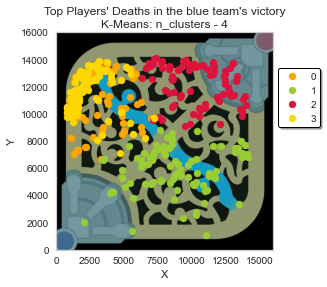

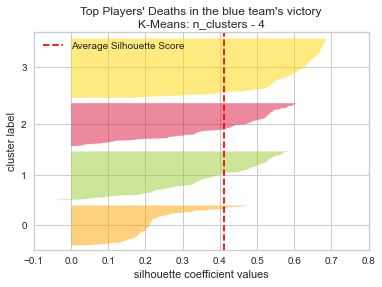

Silhouette score: 0.41134347476336836
3    112
1     92
2     81
0     75
Name: cluster, dtype: int64

Inertia: 261.7072149063299

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3184.173333  10938.026667   0.280000
1        1   8852.119565   5937.847826   0.586957
2        2  10291.185185  12154.135802   0.580247
3        3   2289.366071  11499.053571  -1.000000

In [612]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["orange", "yellowgreen", "crimson", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

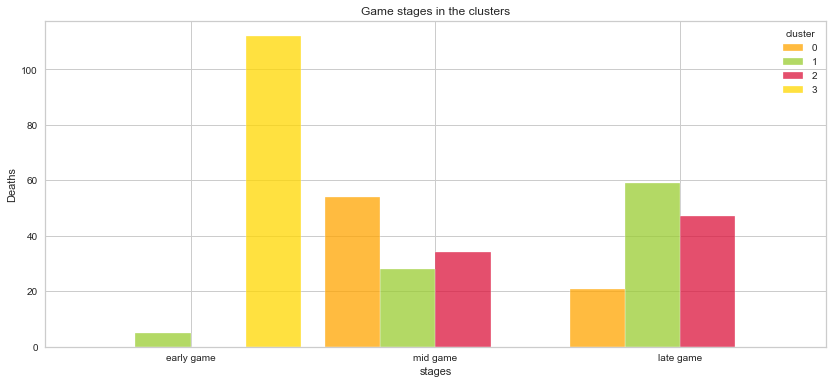

In [613]:
stagesPerClusterV2(blueSideVictory_df, colors)

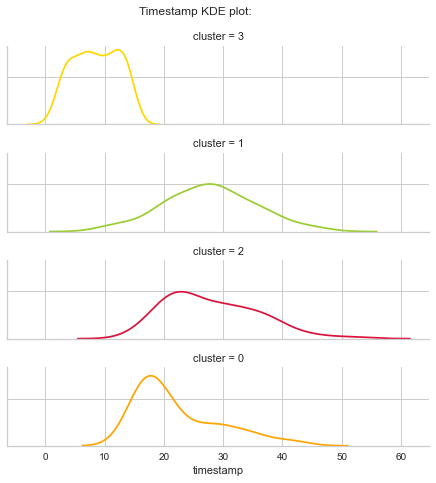

In [614]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

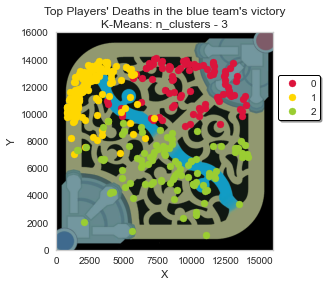

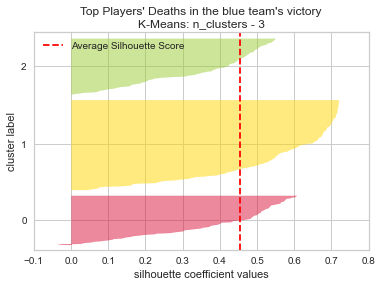

Silhouette score: 0.45357708316390966
1    166
2    103
0     91
Name: cluster, dtype: int64

Inertia: 323.1145300022123

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9715.043956  12041.923077   0.593407
1        1   2417.584337  11477.006024  -0.644578
2        2   8328.300971   6194.320388   0.611650

In [615]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [616]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2645.577736   1451.354890   0.491198
1        1   1363.446391   1487.226883   0.537902
2        2   3041.350488   1759.015988   0.578465

In [617]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13965.0            3622.0           14102.0   
1        1            7208.0             786.0           13917.0   
2        2           14122.0            1545.0            9476.0   

   min coordinate_y  max timestamp  min timestamp  
0            9094.0              1              0  
1            7040.0              1             -1  
2            1093.0              1             -1

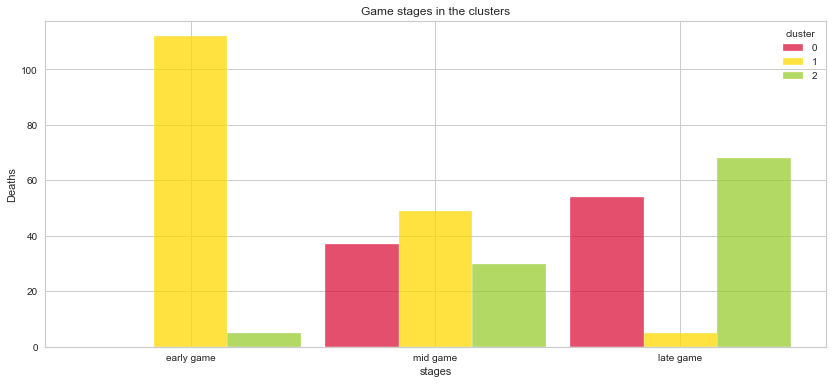

In [618]:
stagesPerClusterV2(blueSideVictory_df, colors)

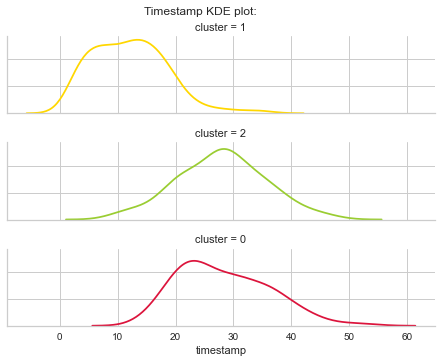

In [619]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [620]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Yorick            33
Tryndamere        15
Darius            12
Mordekaiser        6
Teemo              4
Nasus              4
Gangplank          2
Irelia             1
Garen              1
Kayle              1
Sett               1
TahmKench          1
Warwick            1

Deaths with each champion:

In [621]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Yorick         129
Tryndamere      76
Darius          63
Mordekaiser     24
Teemo           19
Gangplank       15
Nasus           10
Irelia           7
Kayle            5
Sett             4
Garen            3
Warwick          3
TahmKench        2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [622]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 13 champions when they won on the red side

Cluster 0 - died with 11 champions:
 ['Darius' 'Gangplank' 'Irelia' 'Kayle' 'Mordekaiser' 'Nasus' 'TahmKench'
 'Teemo' 'Tryndamere' 'Warwick' 'Yorick']
Yorick         33
Tryndamere     23
Darius         14
Nasus           6
Irelia          4
Teemo           3
Gangplank       3
Mordekaiser     2
Kayle           1
TahmKench       1
Warwick         1
Name: champion, dtype: int64

Cluster 1 - died with 11 champions:
 ['Darius' 'Gangplank' 'Garen' 'Kayle' 'Mordekaiser' 'Nasus' 'Sett'
 'TahmKench' 'Teemo' 'Tryndamere' 'Yorick']
Yorick         66
Tryndamere     39
Darius         19
Teemo          11
Gangplank       9
Mordekaiser     8
Nasus           4
Kayle           4
Garen           3
Sett            2
TahmKench       1
Name: champion, dtype: int64

Cluster 2 - died with 9 champions:
 ['Darius' 'Gangplank' 'Irelia' 'Mordekaiser' 'Sett' 'Teemo' 'Tryndamere'
 'Warwick' 'Yorick']
Yorick         30
Darius         30
Mordek

---
#### Clustering Blue Team Defeat

In [623]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team     summoner region champion  timestamp  \
98932   EUW1_6283079418  Blue  anonymous 4   euw1   Yorick   9.397317   
98940   EUW1_6283079418  Blue  anonymous 4   euw1   Yorick  13.701850   
99151   EUW1_6282904125  Blue  anonymous 4   euw1   Yorick  14.929750   
99166   EUW1_6282904125  Blue  anonymous 4   euw1   Yorick  23.555783   
99171   EUW1_6282904125  Blue  anonymous 4   euw1   Yorick  25.179950   
...                 ...   ...          ...    ...      ...        ...   
621099  EUW1_6289942796  Blue  anonymous 5   euw1     Olaf  16.182617   
621104  EUW1_6289942796  Blue  anonymous 5   euw1     Olaf  18.516650   
621110  EUW1_6289942796  Blue  anonymous 5   euw1     Olaf  21.444683   
621114  EUW1_6289942796  Blue  anonymous 5   euw1     Olaf  23.221517   
621116  EUW1_6289942796  Blue  anonymous 5   euw1     Olaf  24.240400   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
98932         2085.0       12446.0    NaN            NaN  ...   
98940         1976.0       11616.0    NaN            NaN  ...   
99151         1717.0        7336.0    NaN            NaN  ...   
99166        14007.0        6302.0    NaN            NaN  ...   
99171         1978.0       11569.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
621099        3113.0       13633.0    NaN            NaN  ...   
621104        7457.0        6710.0    NaN            NaN  ...   
621110        1388.0        7492.0    NaN            NaN  ...   
621114        2856.0        4510.0    NaN            NaN  ...   
621116        2064.0         813.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
98932               NaN    False      Death        NaN           NaN   NaN   
98940               NaN    False      Death        NaN           NaN   NaN   
99151               NaN    False      Death        NaN           NaN   NaN   
99166               NaN    False      Death        NaN           NaN   NaN   
99171               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
621099              NaN    False      Death        NaN           NaN   NaN   
621104              NaN    False      Death        NaN           NaN   NaN   
621110              NaN    False      Death        NaN           NaN   NaN   
621114              NaN    False      Death        NaN           NaN   NaN   
621116              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
98932       NaN       NaN   TOP  Iron  
98940       NaN       NaN   TOP  Iron  
99151       NaN       NaN   TOP  Iron  
99166       NaN       NaN   TOP  Iron  
99171       NaN       NaN   TOP  Iron  
...         ...       ...   ...   ...  
621099      NaN       NaN   TOP  Iron  
621104      NaN       NaN   TOP  Iron  
621110      NaN       NaN   TOP  Iron  
621114      NaN       NaN   TOP  Iron  
621116      NaN       NaN   TOP  Iron  

[416 rows x 56 columns]

In [624]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)].copy()

In [625]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 13 lost 9 matches on the blue side
anonymous 13 has an average of 7.111111111111111 deaths per game when losing on the blue side

anonymous 4 lost 19 matches on the blue side
anonymous 4 has an average of 6.631578947368421 deaths per game when losing on the blue side

anonymous 5 lost 15 matches on the blue side
anonymous 5 has an average of 7.666666666666667 deaths per game when losing on the blue side

anonymous 7 lost 19 matches on the blue side
anonymous 7 has an average of 5.842105263157895 deaths per game when losing on the blue side



In [626]:
print("Defeat games on blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 62 matches in which the top died at least once
4 players died a total of 416 times on the blue side
Defeat games on blue side contains an average of 6.709677419354839 deaths per game


In [627]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
98932         2085.0       12446.0   9.397317
98940         1976.0       11616.0  13.701850
99151         1717.0        7336.0  14.929750
99166        14007.0        6302.0  23.555783
99171         1978.0       11569.0  25.179950
...              ...           ...        ...
621099        3113.0       13633.0  16.182617
621104        7457.0        6710.0  18.516650
621110        1388.0        7492.0  21.444683
621114        2856.0        4510.0  23.221517
621116        2064.0         813.0  24.240400

[416 rows x 3 columns]

Time discretization

In [628]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [629]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [630]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [631]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [632]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
98932      -0.764155      1.030861         -1
98940      -0.794581      0.807947         -1
99151      -0.866875     -0.341539         -1
99166       2.563636     -0.619242          0
99171      -0.794022      0.795324          1
...              ...           ...        ...
621099     -0.477209      1.349655          0
621104      0.735333     -0.509665          0
621110     -0.958709     -0.299642          0
621114     -0.548946     -1.100522          0
621116     -0.770017     -2.093430          0

[416 rows x 3 columns]

In [633]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.401977155368371
Silhouette score for k=3: 0.4282231071724943
Silhouette score for k=4: 0.39648346688355723
Silhouette score for k=5: 0.40512826378547884
Silhouette score for k=6: 0.40065149365139424
Silhouette score for k=7: 0.4080632666699833
Silhouette score for k=8: 0.4114597881791266
Silhouette score for k=9: 0.4147783778668649
Silhouette score for k=10: 0.4205649207102228
Silhouette score for k=11: 0.4221740987227005
Silhouette score for k=12: 0.4105330180706223
Silhouette score for k=13: 0.4326648876605506
Silhouette score for k=14: 0.40808933029971173
Silhouette score for k=15: 0.4069129155638578
Silhouette score for k=16: 0.3836586925488882
Silhouette score for k=17: 0.40984006946633234
Silhouette score for k=18: 0.4134848940781745
Silhouette score for k=19: 0.4148423694180818
Silhouette score for k=20: 0.41472319903814775
Silhouette score for k=25: 0.4092593611435769


K-Means with k = 3

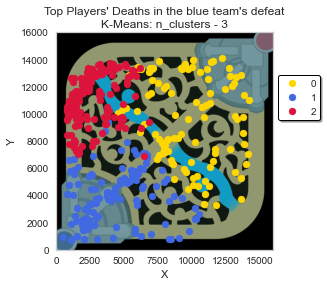

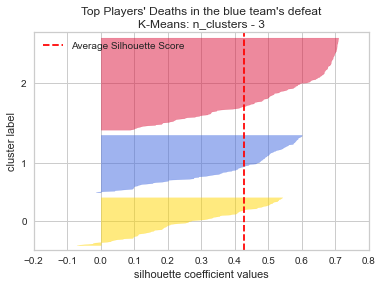

Silhouette score: 0.4282231071724943
2    194
1    121
0    101
Name: cluster, dtype: int64

Inertia: 410.20376317160935

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9806.940594   9407.752475   0.584158
1        1   4443.446281   3991.561983   0.561983
2        2   2464.206186  11070.288660  -0.530928

In [634]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "royalblue", "crimson"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [635]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2474.660920   3082.079941   0.512562
1        1   2460.532150   1973.302576   0.512530
2        2   1404.198953   1632.850530   0.627195

In [636]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14205.0            4558.0           14121.0   
1        1           10526.0             541.0            9383.0   
2        2            6851.0             794.0           13715.0   

   min coordinate_y  max timestamp  min timestamp  
0            3276.0              1             -1  
1             688.0              1             -1  
2            6924.0              1             -1

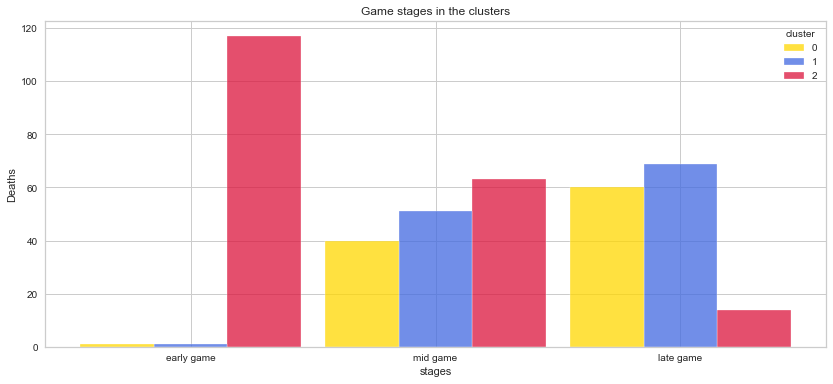

In [637]:
stagesPerClusterV2(blueSideDefeat_df, colors)

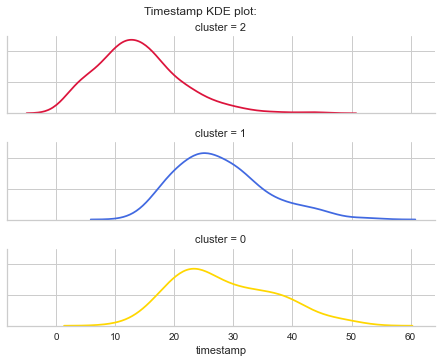

In [638]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [639]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Yorick            15
Darius            12
Tryndamere         7
Nasus              4
Mordekaiser        4
Kayle              3
Chogath            3
TahmKench          2
Jax                2
Gangplank          2
Teemo              2
Garen              2
Irelia             1
Aatrox             1
Fiora              1
Olaf               1

Deaths with each champion:

In [640]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Yorick         92
Darius         72
Tryndamere     47
Chogath        28
Mordekaiser    26
Gangplank      24
Kayle          22
Nasus          21
Garen          17
Teemo          17
Aatrox         13
Fiora          11
Jax             8
TahmKench       7
Olaf            6
Irelia          5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [641]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 16 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Aatrox' 'Chogath' 'Darius' 'Fiora' 'Gangplank' 'Garen' 'Jax' 'Kayle'
 'Mordekaiser' 'Nasus' 'Olaf' 'TahmKench' 'Teemo' 'Tryndamere' 'Yorick']
Yorick         27
Darius         11
Gangplank      11
Mordekaiser    11
Nasus           9
Chogath         8
Tryndamere      7
Teemo           5
Garen           4
Aatrox          2
Fiora           2
TahmKench       1
Jax             1
Kayle           1
Olaf            1
Name: champion, dtype: int64

Cluster 1 - died with 15 champions:
 ['Aatrox' 'Chogath' 'Darius' 'Fiora' 'Gangplank' 'Garen' 'Irelia' 'Jax'
 'Kayle' 'Mordekaiser' 'Nasus' 'Olaf' 'Teemo' 'Tryndamere' 'Yorick']
Darius         28
Yorick         23
Tryndamere     17
Garen           7
Mordekaiser     7
Kayle           7
Chogath         6
Teemo           5
Aatrox          5
Jax             4
Nasus           3
Fiora           3
Gangplank       2
Irelia          2
Olaf            2

---
### Bronze Players

#### Clustering Red Team Victory

In [642]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region     champion  timestamp  \
354094  EUW1_6284161426  Red   anonymous 86   euw1  Mordekaiser   8.934483   
354099  EUW1_6284161426  Red   anonymous 86   euw1  Mordekaiser  11.503417   
354107  EUW1_6284161426  Red   anonymous 86   euw1  Mordekaiser  15.599883   
354203  EUW1_6284115510  Red   anonymous 86   euw1      Camille  21.768783   
354213  EUW1_6284115510  Red   anonymous 86   euw1      Camille  25.460833   
...                 ...  ...            ...    ...          ...        ...   
638451  EUW1_6289561760  Red  anonymous 120   euw1        Garen   9.230217   
638469  EUW1_6289561760  Red  anonymous 120   euw1        Garen  18.722750   
638480  EUW1_6289561760  Red  anonymous 120   euw1        Garen  23.058550   
638492  EUW1_6289561760  Red  anonymous 120   euw1        Garen  27.508483   
638505  EUW1_6289561760  Red  anonymous 120   euw1        Garen  32.398817   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
354094        2833.0       13519.0    NaN            NaN  ...   
354099        2367.0       12098.0    NaN            NaN  ...   
354107        1837.0       11577.0    NaN            NaN  ...   
354203         722.0        4832.0    NaN            NaN  ...   
354213        3434.0        2138.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
638451        4543.0        9801.0    NaN            NaN  ...   
638469        2407.0        9855.0    NaN            NaN  ...   
638480        1904.0       11892.0    NaN            NaN  ...   
638492        1692.0        3805.0    NaN            NaN  ...   
638505         572.0         601.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
354094              NaN     True      Death        NaN           NaN   NaN   
354099              NaN     True      Death        NaN           NaN   NaN   
354107              NaN     True      Death        NaN           NaN   NaN   
354203              NaN     True      Death        NaN           NaN   NaN   
354213              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
638451              NaN     True      Death        NaN           NaN   NaN   
638469              NaN     True      Death        NaN           NaN   NaN   
638480              NaN     True      Death        NaN           NaN   NaN   
638492              NaN     True      Death        NaN           NaN   NaN   
638505              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role    rank  
354094      NaN       NaN   TOP  Bronze  
354099      NaN       NaN   TOP  Bronze  
354107      NaN       NaN   TOP  Bronze  
354203      NaN       NaN   TOP  Bronze  
354213      NaN       NaN   TOP  Bronze  
...         ...       ...   ...     ...  
638451      NaN       NaN   TOP  Bronze  
638469      NaN       NaN   TOP  Bronze  
638480      NaN       NaN   TOP  Bronze  
638492      NaN       NaN   TOP  Bronze  
638505      NaN       NaN   TOP  Bronze  

[680 rows x 56 columns]

In [643]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)].copy()

In [644]:
redSideGames_df = top_deaths_df[top_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [645]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

150

In [646]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

56.17977528089888

In [647]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

11.359839625793517

In [648]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 102 won 10 matches on the red side
anonymous 102 has an average of 3.0 deaths per game when winning on the red side

anonymous 112 won 22 matches on the red side
anonymous 112 has an average of 3.909090909090909 deaths per game when winning on the red side

anonymous 119 won 25 matches on the red side
anonymous 119 has an average of 5.48 deaths per game when winning on the red side

anonymous 120 won 33 matches on the red side
anonymous 120 has an average of 4.393939393939394 deaths per game when winning on the red side

anonymous 121 won 15 matches on the red side
anonymous 121 has an average of 6.4 deaths per game when winning on the red side

anonymous 122 won 6 matches on the red side
anonymous 122 has an average of 5.333333333333333 deaths per game when winning on the red side

anonymous 123 won 11 matches on the red side
anonymous 123 has an average of 4.545454545454546 deaths per game when winning on the red side

anonymous 86 won 28 matches on the red side
anonymous 8

In [649]:
print("Victory games on red side contains {} matches in which the top died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 150 matches in which the top died at least once
8 players died a total of 680 times on the red side
Victory games on red side contains an average of 4.533333333333333 deaths per game


In [650]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
354094        2833.0       13519.0   8.934483
354099        2367.0       12098.0  11.503417
354107        1837.0       11577.0  15.599883
354203         722.0        4832.0  21.768783
354213        3434.0        2138.0  25.460833
...              ...           ...        ...
638451        4543.0        9801.0   9.230217
638469        2407.0        9855.0  18.722750
638480        1904.0       11892.0  23.058550
638492        1692.0        3805.0  27.508483
638505         572.0         601.0  32.398817

[680 rows x 3 columns]

Time discretization

In [651]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [652]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [653]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [654]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [655]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
354094     -0.617855      1.180934         -1
354099     -0.767440      0.840859         -1
354107     -0.937569      0.716173          0
354203     -1.295481     -0.898044          0
354213     -0.424935     -1.542774          1
...              ...           ...        ...
638451     -0.068948      0.291140         -1
638469     -0.754600      0.304063          0
638480     -0.916062      0.791559          0
638492     -0.984113     -1.143826          1
638505     -1.343631     -1.910609          1

[680 rows x 3 columns]

In [656]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4486850203342819
Silhouette score for k=3: 0.4552186208661082
Silhouette score for k=4: 0.40455107528991036
Silhouette score for k=5: 0.36455008081084095
Silhouette score for k=6: 0.3794365956471548
Silhouette score for k=7: 0.37757556623833644
Silhouette score for k=8: 0.4004125390895123
Silhouette score for k=9: 0.41060238055630505
Silhouette score for k=10: 0.3678177392570671
Silhouette score for k=11: 0.3793607905888213
Silhouette score for k=12: 0.3925205487138014
Silhouette score for k=13: 0.41763451876790814
Silhouette score for k=14: 0.42035554505363926
Silhouette score for k=15: 0.42872508519723235
Silhouette score for k=16: 0.4065828961092408
Silhouette score for k=17: 0.4325012232736466
Silhouette score for k=18: 0.42675227877250504
Silhouette score for k=19: 0.4276761335996396
Silhouette score for k=20: 0.4415983342764142
Silhouette score for k=25: 0.4273923214152682


K-Means with k = 4

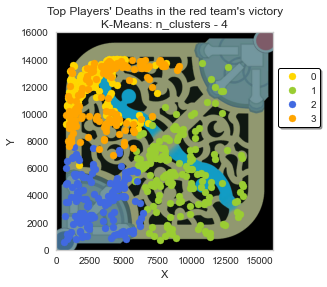

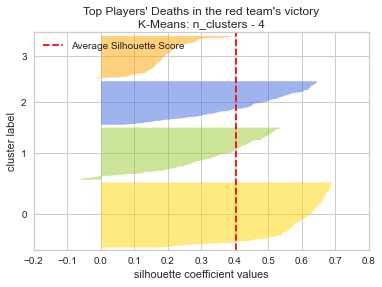

Silhouette score: 0.40455107528991036
0    218
1    174
2    146
3    142
Name: cluster, dtype: int64

Inertia: 491.6081772505338

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3111.165138  12410.463303  -1.000000
1        1   9095.413793   5786.678161   0.454023
2        2   3066.541096   3647.123288   0.657534
3        3   3709.500000  11215.485915   0.190141

In [657]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "royalblue", "orange"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

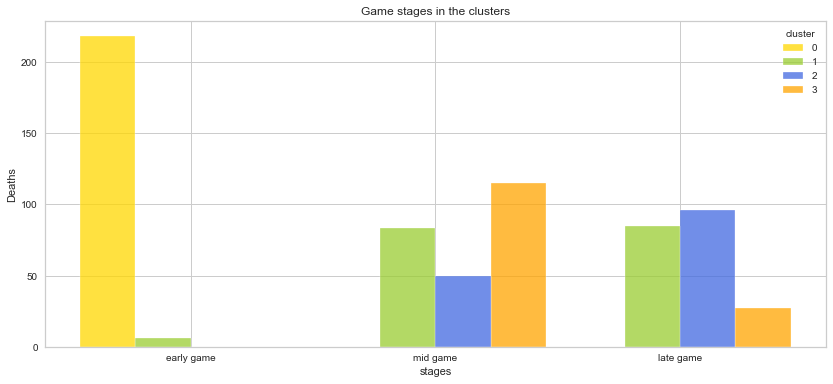

In [658]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

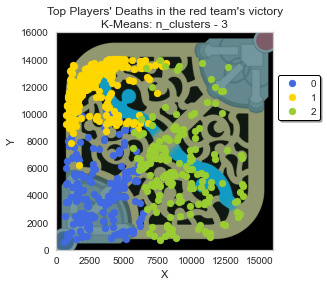

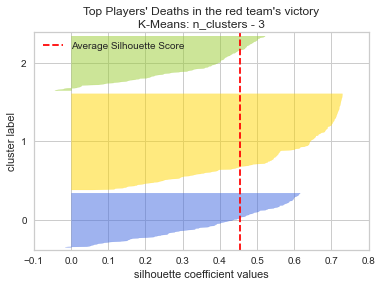

Silhouette score: 0.4552186208661082
1    319
2    181
0    180
Name: cluster, dtype: int64

Inertia: 593.2015976431763

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3128.905556   4549.650000   0.644444
1        1   3235.047022  12246.830721  -0.667712
2        2   9061.419890   6142.353591   0.447514

In [659]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [660]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1639.481851   2534.197845   0.478681
1        1   1598.804060   1528.703812   0.503210
2        2   2009.026462   3049.020503   0.559950

In [661]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            6436.0             572.0           10245.0   
1        1            8111.0             761.0           14069.0   
2        2           13781.0            5683.0           13966.0   

   min coordinate_y  max timestamp  min timestamp  
0             601.0              1              0  
1            6262.0              1             -1  
2             755.0              1             -1

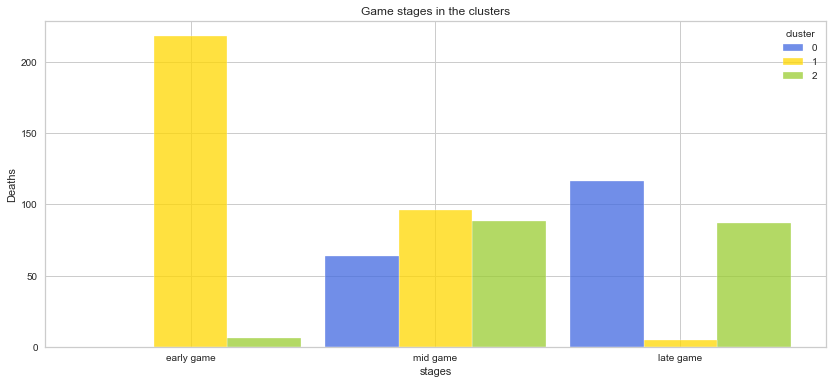

In [662]:
stagesPerClusterV2(redSideVictory_df, colors)

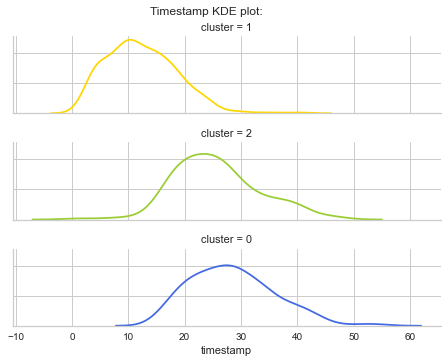

In [663]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [664]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Garen             34
Camille           23
Fiora             20
Yorick            15
Darius            15
Tryndamere         9
Mordekaiser        7
Jax                5
Nasus              5
Kled               4
Malphite           2
Vi                 2
DrMundo            2
Illaoi             1
Jinx               1
Yasuo              1
Gwen               1
Urgot              1
Warwick            1
Graves             1

Deaths with each champion:

In [665]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Garen          143
Camille         94
Darius          88
Fiora           64
Yorick          54
Jax             47
Tryndamere      44
Mordekaiser     27
Nasus           25
Kled            21
Vi              15
Gwen            10
Warwick         10
Graves           9
Malphite         8
Yasuo            6
Illaoi           6
Urgot            3
DrMundo          3
Jinx             3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [666]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 20 champions when they won on the red side

Cluster 0 - died with 19 champions:
 ['Camille' 'Darius' 'DrMundo' 'Fiora' 'Garen' 'Graves' 'Gwen' 'Illaoi'
 'Jax' 'Jinx' 'Kled' 'Malphite' 'Mordekaiser' 'Nasus' 'Tryndamere' 'Vi'
 'Warwick' 'Yasuo' 'Yorick']
Garen          45
Darius         24
Camille        22
Yorick         16
Jax            15
Fiora          14
Tryndamere     13
Nasus           5
Kled            5
Vi              4
Mordekaiser     4
Gwen            3
Graves          3
Illaoi          2
Yasuo           1
DrMundo         1
Malphite        1
Jinx            1
Warwick         1
Name: champion, dtype: int64

Cluster 1 - died with 20 champions:
 ['Camille' 'Darius' 'DrMundo' 'Fiora' 'Garen' 'Graves' 'Gwen' 'Illaoi'
 'Jax' 'Jinx' 'Kled' 'Malphite' 'Mordekaiser' 'Nasus' 'Tryndamere' 'Urgot'
 'Vi' 'Warwick' 'Yasuo' 'Yorick']
Garen          56
Darius         52
Camille        46
Fiora          33
Yorick         27
Jax            19
Mordekaiser    16
Tryn

---
#### Clustering Red Team Defeat

In [667]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
354351  EUW1_6283709134  Red   anonymous 86   euw1  Camille   6.765250   
354372  EUW1_6283709134  Red   anonymous 86   euw1  Camille  18.922667   
354376  EUW1_6283709134  Red   anonymous 86   euw1  Camille  20.896750   
354378  EUW1_6283709134  Red   anonymous 86   euw1  Camille  21.968967   
354381  EUW1_6283709134  Red   anonymous 86   euw1  Camille  23.491150   
...                 ...  ...            ...    ...      ...        ...   
638547  EUW1_6289509834  Red  anonymous 120   euw1    Garen  20.166583   
638552  EUW1_6289509834  Red  anonymous 120   euw1    Garen  23.263717   
638698  EUW1_6289291262  Red  anonymous 120   euw1    Garen  19.895583   
638707  EUW1_6289291262  Red  anonymous 120   euw1    Garen  25.883967   
638714  EUW1_6289291262  Red  anonymous 120   euw1    Garen  29.195183   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
354351        4288.0       13766.0    NaN            NaN  ...   
354372        3271.0       13322.0    NaN            NaN  ...   
354376       13198.0        4448.0    NaN            NaN  ...   
354378        7556.0       12468.0    NaN            NaN  ...   
354381       10347.0       10390.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
638547        3604.0       13438.0    NaN            NaN  ...   
638552        4116.0       10357.0    NaN            NaN  ...   
638698        4145.0       13533.0    NaN            NaN  ...   
638707        7561.0       13902.0    NaN            NaN  ...   
638714        9472.0       11434.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
354351              NaN    False      Death        NaN           NaN   NaN   
354372              NaN    False      Death        NaN           NaN   NaN   
354376              NaN    False      Death        NaN           NaN   NaN   
354378              NaN    False      Death        NaN           NaN   NaN   
354381              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
638547              NaN    False      Death        NaN           NaN   NaN   
638552              NaN    False      Death        NaN           NaN   NaN   
638698              NaN    False      Death        NaN           NaN   NaN   
638707              NaN    False      Death        NaN           NaN   NaN   
638714              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role    rank  
354351      NaN       NaN   TOP  Bronze  
354372      NaN       NaN   TOP  Bronze  
354376      NaN       NaN   TOP  Bronze  
354378      NaN       NaN   TOP  Bronze  
354381      NaN       NaN   TOP  Bronze  
...         ...       ...   ...     ...  
638547      NaN       NaN   TOP  Bronze  
638552      NaN       NaN   TOP  Bronze  
638698      NaN       NaN   TOP  Bronze  
638707      NaN       NaN   TOP  Bronze  
638714      NaN       NaN   TOP  Bronze  

[748 rows x 56 columns]

In [668]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)].copy()

In [669]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 102 lost 17 matches on the red side
anonymous 102 has an average of 6.470588235294118 deaths per game when losing on the red side

anonymous 112 lost 19 matches on the red side
anonymous 112 has an average of 6.894736842105263 deaths per game when losing on the red side

anonymous 119 lost 11 matches on the red side
anonymous 119 has an average of 7.363636363636363 deaths per game when losing on the red side

anonymous 120 lost 32 matches on the red side
anonymous 120 has an average of 5.65625 deaths per game when losing on the red side

anonymous 121 lost 3 matches on the red side
anonymous 121 has an average of 9.0 deaths per game when losing on the red side

anonymous 122 lost 15 matches on the red side
anonymous 122 has an average of 5.2 deaths per game when losing on the red side

anonymous 123 lost 5 matches on the red side
anonymous 123 has an average of 5.8 deaths per game when losing on the red side

anonymous 86 lost 15 matches on the red side
anonymous 86 has an av

In [670]:
print("Defeat games on red side contains {} matches in which the top died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 117 matches in which the top died at least once
8 players died a total of 748 times on the red side
Defeat games on red side contains an average of 6.3931623931623935 deaths per game


In [671]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
354351        4288.0       13766.0   6.765250
354372        3271.0       13322.0  18.922667
354376       13198.0        4448.0  20.896750
354378        7556.0       12468.0  21.968967
354381       10347.0       10390.0  23.491150
...              ...           ...        ...
638547        3604.0       13438.0  20.166583
638552        4116.0       10357.0  23.263717
638698        4145.0       13533.0  19.895583
638707        7561.0       13902.0  25.883967
638714        9472.0       11434.0  29.195183

[748 rows x 3 columns]

Time discretization

In [672]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [673]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [674]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [675]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [676]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
354351     -0.636327      1.148949         -1
354372     -0.897387      1.018660          0
354376      1.650838     -1.585367          0
354378      0.202557      0.768058          0
354381      0.918997      0.158280          0
...              ...           ...        ...
638547     -0.811907      1.052699          0
638552     -0.680478      0.148597          0
638698     -0.673034      1.080576          0
638707      0.203841      1.188858          1
638714      0.694387      0.464636          1

[748 rows x 3 columns]

In [677]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.42255130149273357
Silhouette score for k=3: 0.40466943468350397
Silhouette score for k=4: 0.4055872522130756
Silhouette score for k=5: 0.3710639308255643
Silhouette score for k=6: 0.366394452570705
Silhouette score for k=7: 0.37749991077505474
Silhouette score for k=8: 0.39207787903234226
Silhouette score for k=9: 0.38652608351398743
Silhouette score for k=10: 0.3910263745702233
Silhouette score for k=11: 0.38099913502100863
Silhouette score for k=12: 0.3862489553852524
Silhouette score for k=13: 0.3982791471255543
Silhouette score for k=14: 0.4057224557450309
Silhouette score for k=15: 0.41256734696233116
Silhouette score for k=16: 0.41874732427312744
Silhouette score for k=17: 0.4222926797337407
Silhouette score for k=18: 0.42846923565449563
Silhouette score for k=19: 0.4346428062090608
Silhouette score for k=20: 0.43760591898789664
Silhouette score for k=25: 0.44621677443193886


K-Means with k = 4

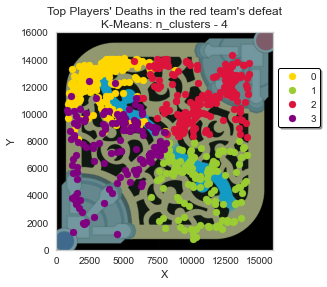

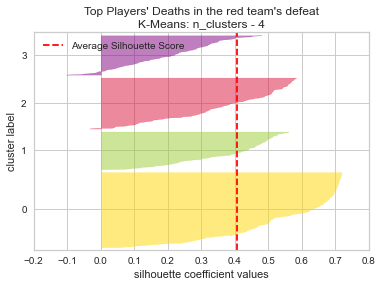

Silhouette score: 0.4055872522130756
0    276
2    188
3    145
1    139
Name: cluster, dtype: int64

Inertia: 571.3654189672882

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3428.427536  12499.445652  -0.688406
1        1  10584.561151   5064.539568   0.546763
2        2  10671.010638  11312.441489   0.617021
3        3   4399.979310   7501.386207   0.503448

In [678]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson", "purple"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

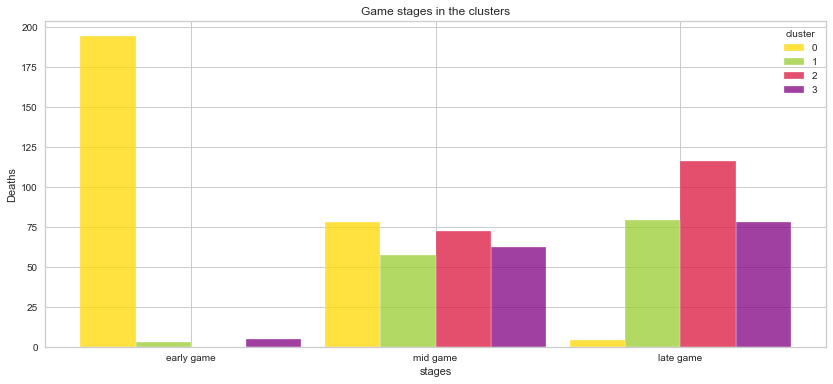

In [679]:
stagesPerClusterV2(redSideDefeat_df, colors)

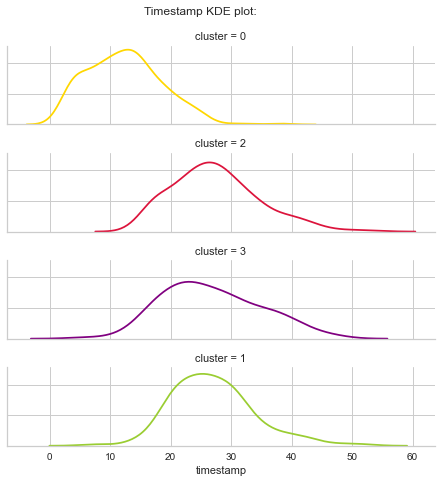

In [680]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

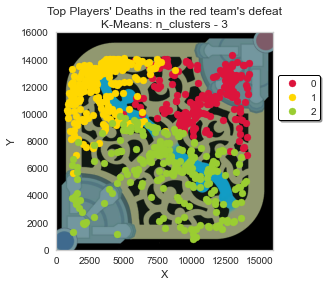

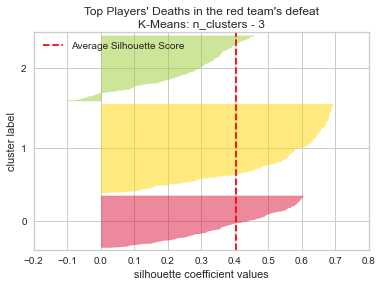

Silhouette score: 0.40466943468350397
1    323
2    237
0    188
Name: cluster, dtype: int64

Inertia: 738.2926788866131

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10739.542553  11251.542553   0.664894
1        1   3393.034056  12088.699690  -0.538700
2        2   8213.767932   5689.105485   0.523207

In [681]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [682]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2261.239025   1707.973692   0.472028
1        1   1517.051143   1690.375077   0.615251
2        2   3252.553897   2177.706021   0.555458

In [683]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14237.0            4906.0           14299.0   
1        1            8750.0             788.0           14081.0   
2        2           13958.0            1195.0            9816.0   

   min coordinate_y  max timestamp  min timestamp  
0            6981.0              1              0  
1            5657.0              1             -1  
2             821.0              1             -1

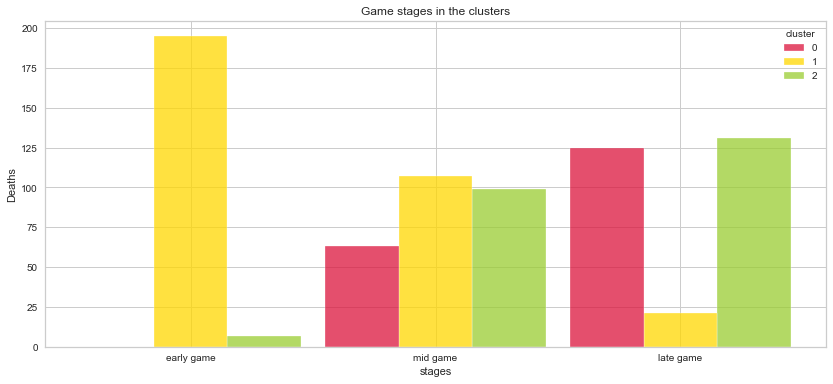

In [684]:
stagesPerClusterV2(redSideDefeat_df, colors)

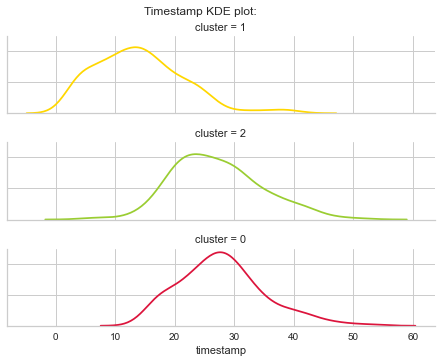

In [685]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [686]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Garen             32
Yorick            18
Fiora             16
Camille           13
Darius             7
Kled               7
Jax                3
Lillia             3
Renekton           2
Shen               2
Tryndamere         2
Mordekaiser        2
Vayne              1
Caitlyn            1
Urgot              1
Teemo              1
Aatrox             1
Kassadin           1
Nasus              1
Yasuo              1
Ornn               1
Sejuani            1

Deaths with each champion:

In [687]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Garen          184
Yorick         119
Fiora          114
Camille         95
Darius          46
Kled            43
Jax             27
Mordekaiser     22
Lillia          13
Tryndamere      12
Yasuo            9
Urgot            9
Renekton         8
Teemo            8
Aatrox           7
Nasus            7
Sejuani          7
Vayne            6
Kassadin         4
Shen             3
Ornn             3
Caitlyn          2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [688]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 22 champions when they won on the red side

Cluster 0 - died with 20 champions:
 ['Aatrox' 'Camille' 'Darius' 'Fiora' 'Garen' 'Jax' 'Kassadin' 'Kled'
 'Lillia' 'Mordekaiser' 'Nasus' 'Renekton' 'Sejuani' 'Shen' 'Teemo'
 'Tryndamere' 'Urgot' 'Vayne' 'Yasuo' 'Yorick']
Garen          46
Fiora          34
Camille        28
Yorick         23
Darius         12
Kled           11
Jax             6
Mordekaiser     4
Aatrox          3
Yasuo           3
Nasus           3
Renekton        2
Teemo           2
Vayne           2
Kassadin        2
Lillia          2
Tryndamere      2
Urgot           1
Shen            1
Sejuani         1
Name: champion, dtype: int64

Cluster 1 - died with 22 champions:
 ['Aatrox' 'Caitlyn' 'Camille' 'Darius' 'Fiora' 'Garen' 'Jax' 'Kassadin'
 'Kled' 'Lillia' 'Mordekaiser' 'Nasus' 'Ornn' 'Renekton' 'Sejuani' 'Shen'
 'Teemo' 'Tryndamere' 'Urgot' 'Vayne' 'Yasuo' 'Yorick']
Garen          82
Yorick         48
Camille        38
Fiora          38
Dariu

---
#### Clustering Blue Team Victory

In [689]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
354700  EUW1_6282739383  Blue   anonymous 86   euw1  Camille  12.401033   
354714  EUW1_6282739383  Blue   anonymous 86   euw1  Camille  18.153417   
354719  EUW1_6282739383  Blue   anonymous 86   euw1  Camille  21.488650   
354930  EUW1_6281967694  Blue   anonymous 86   euw1  Camille  26.478183   
354935  EUW1_6281967694  Blue   anonymous 86   euw1  Camille  28.912700   
...                 ...   ...            ...    ...      ...        ...   
638565  EUW1_6289426365  Blue  anonymous 120   euw1    Garen   5.197383   
638574  EUW1_6289426365  Blue  anonymous 120   euw1    Garen  10.096700   
638640  EUW1_6289351619  Blue  anonymous 120   euw1    Garen  19.353550   
638648  EUW1_6289351619  Blue  anonymous 120   euw1    Garen  21.974183   
638661  EUW1_6289351619  Blue  anonymous 120   euw1    Garen  25.429633   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
354700        3127.0       13338.0    NaN            NaN  ...   
354714        6830.0        9998.0    NaN            NaN  ...   
354719        4864.0       13268.0    NaN            NaN  ...   
354930        6966.0        9066.0    NaN            NaN  ...   
354935        9441.0        7236.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
638565        3426.0       13076.0    NaN            NaN  ...   
638574         833.0       10469.0    NaN            NaN  ...   
638640       11882.0       12144.0    NaN            NaN  ...   
638648       10159.0       10445.0    NaN            NaN  ...   
638661       13678.0       13716.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
354700              NaN     True      Death        NaN           NaN   NaN   
354714              NaN     True      Death        NaN           NaN   NaN   
354719              NaN     True      Death        NaN           NaN   NaN   
354930              NaN     True      Death        NaN           NaN   NaN   
354935              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
638565              NaN     True      Death        NaN           NaN   NaN   
638574              NaN     True      Death        NaN           NaN   NaN   
638640              NaN     True      Death        NaN           NaN   NaN   
638648              NaN     True      Death        NaN           NaN   NaN   
638661              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role    rank  
354700      NaN       NaN   TOP  Bronze  
354714      NaN       NaN   TOP  Bronze  
354719      NaN       NaN   TOP  Bronze  
354930      NaN       NaN   TOP  Bronze  
354935      NaN       NaN   TOP  Bronze  
...         ...       ...   ...     ...  
638565      NaN       NaN   TOP  Bronze  
638574      NaN       NaN   TOP  Bronze  
638640      NaN       NaN   TOP  Bronze  
638648      NaN       NaN   TOP  Bronze  
638661      NaN       NaN   TOP  Bronze  

[599 rows x 56 columns]

In [690]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)].copy()

In [691]:
blueSideGames_df = top_deaths_df[top_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [692]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

134

In [693]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

52.54901960784314

In [694]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

10.38848421782865

In [695]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 102 won 13 matches on the blue side
anonymous 102 has an average of 4.230769230769231 deaths per game when winning on the blue side

anonymous 112 won 19 matches on the blue side
anonymous 112 has an average of 4.526315789473684 deaths per game when winning on the blue side

anonymous 119 won 24 matches on the blue side
anonymous 119 has an average of 5.666666666666667 deaths per game when winning on the blue side

anonymous 120 won 33 matches on the blue side
anonymous 120 has an average of 4.0 deaths per game when winning on the blue side

anonymous 121 won 11 matches on the blue side
anonymous 121 has an average of 4.090909090909091 deaths per game when winning on the blue side

anonymous 122 won 11 matches on the blue side
anonymous 122 has an average of 3.5454545454545454 deaths per game when winning on the blue side

anonymous 123 won 6 matches on the blue side
anonymous 123 has an average of 4.0 deaths per game when winning on the blue side

anonymous 86 won 17 matches

In [696]:
print("Victory games on blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 134 matches in which the top died at least once
8 players died a total of 599 times on the blue side
Victory games on blue side contains an average of 4.470149253731344 deaths per game


In [697]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
354700        3127.0       13338.0  12.401033
354714        6830.0        9998.0  18.153417
354719        4864.0       13268.0  21.488650
354930        6966.0        9066.0  26.478183
354935        9441.0        7236.0  28.912700
...              ...           ...        ...
638565        3426.0       13076.0   5.197383
638574         833.0       10469.0  10.096700
638640       11882.0       12144.0  19.353550
638648       10159.0       10445.0  21.974183
638661       13678.0       13716.0  25.429633

[599 rows x 3 columns]

Time discretization

In [698]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [699]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [700]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [701]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [702]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
354700     -0.706081      1.057276         -1
354714      0.191995     -0.081638          0
354719     -0.284812      1.033406          0
354930      0.224978     -0.399442          1
354935      0.825232     -1.023458          1
...              ...           ...        ...
638565     -0.633566      0.967936         -1
638574     -1.262437      0.078970         -1
638640      1.417239      0.650131          0
638648      0.999366      0.070786          0
638661      1.852817      1.186171          1

[599 rows x 3 columns]

In [703]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.44696555929959925
Silhouette score for k=3: 0.4274762344540827
Silhouette score for k=4: 0.3869020611873461
Silhouette score for k=5: 0.3723720413381582
Silhouette score for k=6: 0.35845652723573335
Silhouette score for k=7: 0.32808040051525966
Silhouette score for k=8: 0.3552351662285384
Silhouette score for k=9: 0.3749690106143168
Silhouette score for k=10: 0.37918221204626196
Silhouette score for k=11: 0.4015573654718807
Silhouette score for k=12: 0.39041399000188315
Silhouette score for k=13: 0.40305161812671486
Silhouette score for k=14: 0.41765703676056803
Silhouette score for k=15: 0.4193323015941542
Silhouette score for k=16: 0.4269204856044243
Silhouette score for k=17: 0.42409400179562146
Silhouette score for k=18: 0.4258331994318443
Silhouette score for k=19: 0.4207154359861553
Silhouette score for k=20: 0.44090884549375764
Silhouette score for k=25: 0.43475972935700063


K-Means with k = 4

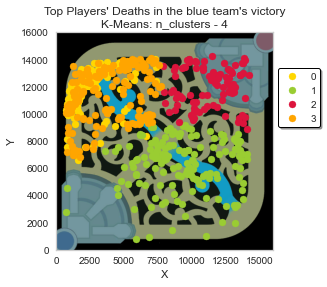

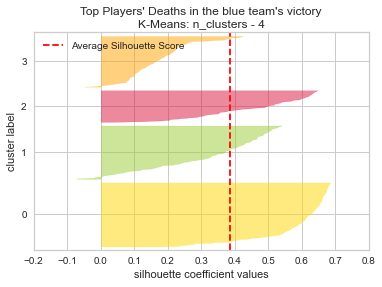

Silhouette score: 0.3869020611873461
0    192
1    160
3    152
2     95
Name: cluster, dtype: int64

Inertia: 459.0872313528903

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2411.973958  11754.572917  -1.000000
1        1   9316.837500   6299.800000   0.443750
2        2  11297.136842  11947.347368   0.663158
3        3   3881.276316  11397.144737   0.302632

In [704]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson", "orange"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

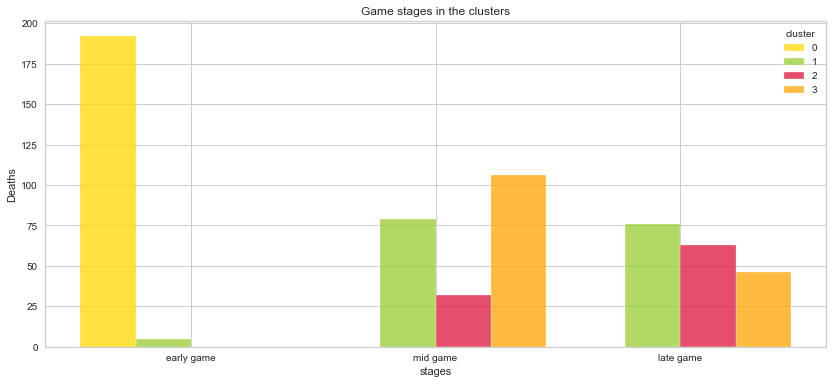

In [705]:
stagesPerClusterV2(blueSideVictory_df, colors)

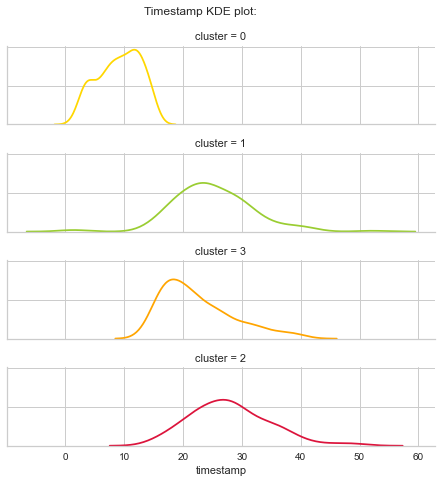

In [706]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

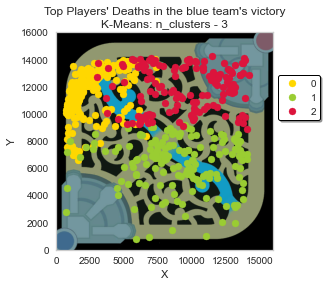

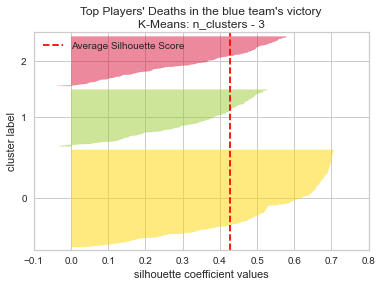

Silhouette score: 0.4274762344540827
0    286
1    167
2    146
Name: cluster, dtype: int64

Inertia: 562.4821906174811

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2550.461538  11645.314685  -0.646853
1        1   8986.952096   6354.658683   0.467066
2        2   9498.095890  11920.698630   0.650685

In [707]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [708]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1498.930482    1586.57245   0.526674
1        1   3102.042006    1854.09867   0.555694
2        2   2932.290779    1568.73145   0.476754

In [709]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            7375.0             772.0           14061.0   
1        1           14068.0             752.0            9180.0   
2        2           14211.0            3045.0           14255.0   

   min coordinate_y  max timestamp  min timestamp  
0            6597.0              1             -1  
1             818.0              1             -1  
2            8922.0              1              0

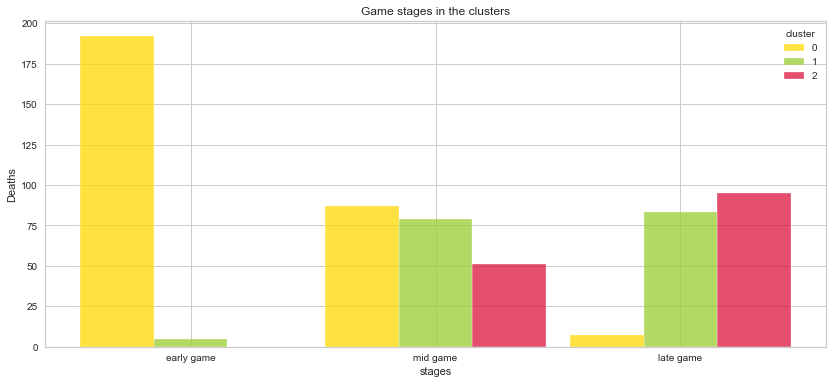

In [710]:
stagesPerClusterV2(blueSideVictory_df, colors)

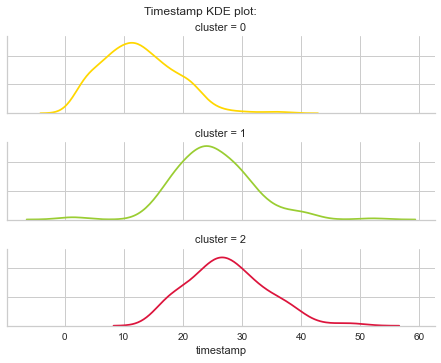

In [711]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [712]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Garen             31
Darius            19
Fiora             16
Yorick            16
Camille           14
Mordekaiser        6
Kled               5
Malphite           5
Tryndamere         4
Shen               2
Lillia             2
DrMundo            2
Graves             2
Ornn               2
Jax                2
Gangplank          1
Illaoi             1
Urgot              1
Nasus              1
Poppy              1
Riven              1

Deaths with each champion:

In [713]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Garen          110
Darius         110
Camille         71
Fiora           68
Yorick          65
Malphite        30
Mordekaiser     20
Tryndamere      17
Kled            15
Graves          12
Jax             11
Ornn            10
Illaoi           9
Urgot            8
Shen             8
Nasus            8
Gangplank        7
Lillia           7
Poppy            5
Riven            5
DrMundo          3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [714]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 21 champions when they won on the red side

Cluster 0 - died with 21 champions:
 ['Camille' 'Darius' 'DrMundo' 'Fiora' 'Gangplank' 'Garen' 'Graves'
 'Illaoi' 'Jax' 'Kled' 'Lillia' 'Malphite' 'Mordekaiser' 'Nasus' 'Ornn'
 'Poppy' 'Riven' 'Shen' 'Tryndamere' 'Urgot' 'Yorick']
Darius         62
Garen          40
Yorick         38
Camille        31
Fiora          24
Mordekaiser    15
Malphite       13
Tryndamere     11
Graves          6
Urgot           6
Jax             6
Riven           5
Ornn            4
Kled            4
Nasus           4
Poppy           4
Shen            3
Illaoi          3
Lillia          3
Gangplank       2
DrMundo         2
Name: champion, dtype: int64

Cluster 1 - died with 17 champions:
 ['Camille' 'Darius' 'Fiora' 'Gangplank' 'Garen' 'Graves' 'Illaoi' 'Jax'
 'Kled' 'Lillia' 'Malphite' 'Mordekaiser' 'Nasus' 'Ornn' 'Shen'
 'Tryndamere' 'Yorick']
Garen          35
Camille        27
Darius         25
Fiora          24
Yorick         13
Ma

---
#### Clustering Blue Team Defeat

In [715]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
354230  EUW1_6283847719  Blue   anonymous 86   euw1  Camille   3.325683   
354244  EUW1_6283847719  Blue   anonymous 86   euw1  Camille  10.455917   
354248  EUW1_6283847719  Blue   anonymous 86   euw1  Camille  12.212100   
354256  EUW1_6283847719  Blue   anonymous 86   euw1  Camille  16.854833   
354259  EUW1_6283847719  Blue   anonymous 86   euw1  Camille  18.985600   
...                 ...   ...            ...    ...      ...        ...   
638338  EUW1_6289727567  Blue  anonymous 120   euw1    Garen  16.444417   
638343  EUW1_6289727567  Blue  anonymous 120   euw1    Garen  19.031700   
638348  EUW1_6289727567  Blue  anonymous 120   euw1    Garen  21.089417   
638356  EUW1_6289727567  Blue  anonymous 120   euw1    Garen  25.676733   
638358  EUW1_6289727567  Blue  anonymous 120   euw1    Garen  26.953250   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
354230        3552.0       10803.0    NaN            NaN  ...   
354244        3488.0       13208.0    NaN            NaN  ...   
354248         938.0       11151.0    NaN            NaN  ...   
354256        1122.0       12157.0    NaN            NaN  ...   
354259        7727.0        4767.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
638338        7602.0        5210.0    NaN            NaN  ...   
638343        8479.0        6840.0    NaN            NaN  ...   
638348        4854.0        5406.0    NaN            NaN  ...   
638356        3553.0        3957.0    NaN            NaN  ...   
638358        5488.0        5439.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
354230              NaN    False      Death        NaN           NaN   NaN   
354244              NaN    False      Death        NaN           NaN   NaN   
354248              NaN    False      Death        NaN           NaN   NaN   
354256              NaN    False      Death        NaN           NaN   NaN   
354259              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
638338              NaN    False      Death        NaN           NaN   NaN   
638343              NaN    False      Death        NaN           NaN   NaN   
638348              NaN    False      Death        NaN           NaN   NaN   
638356              NaN    False      Death        NaN           NaN   NaN   
638358              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role    rank  
354230      NaN       NaN   TOP  Bronze  
354244      NaN       NaN   TOP  Bronze  
354248      NaN       NaN   TOP  Bronze  
354256      NaN       NaN   TOP  Bronze  
354259      NaN       NaN   TOP  Bronze  
...         ...       ...   ...     ...  
638338      NaN       NaN   TOP  Bronze  
638343      NaN       NaN   TOP  Bronze  
638348      NaN       NaN   TOP  Bronze  
638356      NaN       NaN   TOP  Bronze  
638358      NaN       NaN   TOP  Bronze  

[726 rows x 56 columns]

In [716]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)].copy()

In [717]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 102 lost 8 matches on the blue side
anonymous 102 has an average of 4.0 deaths per game when losing on the blue side

anonymous 112 lost 19 matches on the blue side
anonymous 112 has an average of 5.526315789473684 deaths per game when losing on the blue side

anonymous 119 lost 19 matches on the blue side
anonymous 119 has an average of 6.7368421052631575 deaths per game when losing on the blue side

anonymous 120 lost 32 matches on the blue side
anonymous 120 has an average of 5.5625 deaths per game when losing on the blue side

anonymous 121 lost 12 matches on the blue side
anonymous 121 has an average of 5.666666666666667 deaths per game when losing on the blue side

anonymous 122 lost 8 matches on the blue side
anonymous 122 has an average of 5.75 deaths per game when losing on the blue side

anonymous 123 lost 10 matches on the blue side
anonymous 123 has an average of 7.0 deaths per game when losing on the blue side

anonymous 86 lost 13 matches on the blue side
anonym

In [718]:
print("Defeat games on blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 121 matches in which the top died at least once
8 players died a total of 726 times on the blue side
Defeat games on blue side contains an average of 6.0 deaths per game


In [719]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
354230        3552.0       10803.0   3.325683
354244        3488.0       13208.0  10.455917
354248         938.0       11151.0  12.212100
354256        1122.0       12157.0  16.854833
354259        7727.0        4767.0  18.985600
...              ...           ...        ...
638338        7602.0        5210.0  16.444417
638343        8479.0        6840.0  19.031700
638348        4854.0        5406.0  21.089417
638356        3553.0        3957.0  25.676733
638358        5488.0        5439.0  26.953250

[726 rows x 3 columns]

Time discretization

In [720]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [721]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [722]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [723]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [724]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
354230     -0.401627      0.688372         -1
354244     -0.419601      1.317255         -1
354248     -1.135729      0.779370         -1
354256     -1.084055      1.042429          0
354259      0.770857     -0.889983          0
...              ...           ...        ...
638338      0.735752     -0.774142          0
638343      0.982044     -0.347914          0
638348     -0.035981     -0.722890          0
638356     -0.401346     -1.101790          1
638358      0.142068     -0.714261          1

[726 rows x 3 columns]

In [725]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.44891825654095324
Silhouette score for k=3: 0.43239280480617026
Silhouette score for k=4: 0.39921306441251925
Silhouette score for k=5: 0.3841425340481866
Silhouette score for k=6: 0.379536462550678
Silhouette score for k=7: 0.4059439153169719
Silhouette score for k=8: 0.3972388403983075
Silhouette score for k=9: 0.39951102767189134
Silhouette score for k=10: 0.4094702692524524
Silhouette score for k=11: 0.4253546835904589
Silhouette score for k=12: 0.422827511661169
Silhouette score for k=13: 0.38774590810555654
Silhouette score for k=14: 0.3879794267601036
Silhouette score for k=15: 0.39649791631774967
Silhouette score for k=16: 0.4117621152989989
Silhouette score for k=17: 0.40815200848584365
Silhouette score for k=18: 0.39306912507302133
Silhouette score for k=19: 0.4044641226818793
Silhouette score for k=20: 0.4085340877242736
Silhouette score for k=25: 0.4026883327122268


K-Means with k = 3

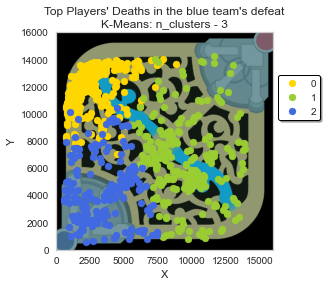

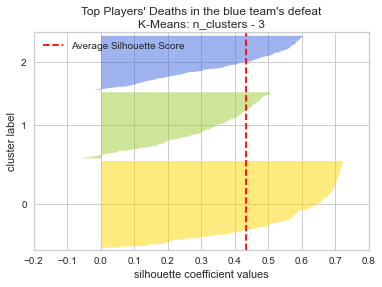

Silhouette score: 0.43239280480617026
0    305
1    232
2    189
Name: cluster, dtype: int64

Inertia: 654.4244616861297

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2528.104918  11657.026230  -0.567213
1        1   9461.982759   6576.564655   0.551724
2        2   3443.216931   4500.687831   0.703704

In [726]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [727]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1526.692420   1439.563581   0.586381
1        1   2005.077552   2966.558739   0.562397
2        2   1812.998793   2414.128638   0.456623

In [728]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8811.0             754.0           14013.0   
1        1           13931.0            5701.0           14235.0   
2        2            7471.0             613.0           10398.0   

   min coordinate_y  max timestamp  min timestamp  
0            7020.0              1             -1  
1             826.0              1             -1  
2             601.0              1              0

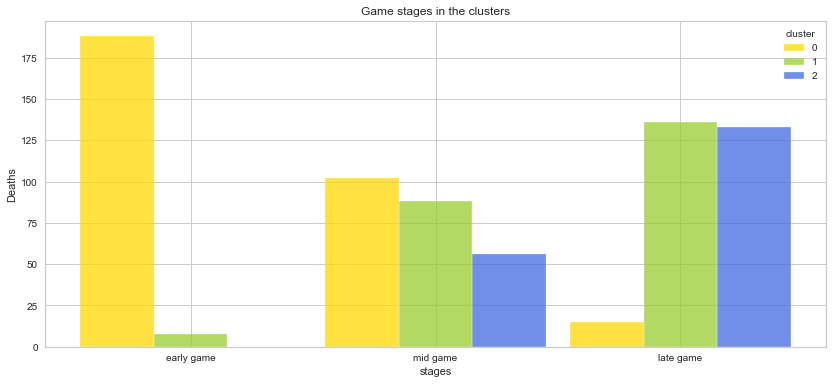

In [729]:
stagesPerClusterV2(blueSideDefeat_df, colors)

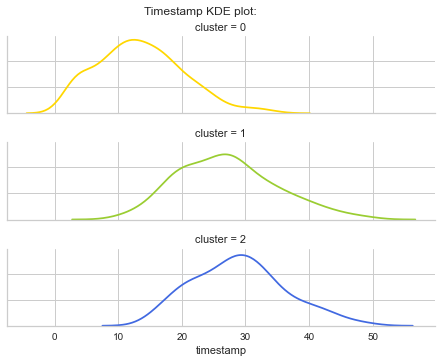

In [730]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [731]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Garen             30
Darius            18
Fiora             17
Camille           11
Yorick            10
Jax                6
Malphite           4
Mordekaiser        4
Tryndamere         4
Nasus              3
Kled               3
Ornn               2
Pantheon           1
Aatrox             1
DrMundo            1
Gwen               1
Teemo              1
Lillia             1
Renekton           1
Gangplank          1
Irelia             1

Deaths with each champion:

In [732]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Garen          162
Darius         110
Fiora           95
Camille         86
Yorick          42
Malphite        38
Tryndamere      32
Jax             32
Mordekaiser     29
Kled            18
Nasus           13
Teemo           11
Irelia           9
Pantheon         8
Gangplank        7
DrMundo          7
Ornn             7
Aatrox           6
Lillia           5
Renekton         5
Gwen             4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [733]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 21 champions when they won on the red side

Cluster 0 - died with 21 champions:
 ['Aatrox' 'Camille' 'Darius' 'DrMundo' 'Fiora' 'Gangplank' 'Garen' 'Gwen'
 'Irelia' 'Jax' 'Kled' 'Lillia' 'Malphite' 'Mordekaiser' 'Nasus' 'Ornn'
 'Pantheon' 'Renekton' 'Teemo' 'Tryndamere' 'Yorick']
Garen          65
Darius         51
Fiora          39
Camille        32
Yorick         20
Malphite       16
Tryndamere     13
Jax            11
Kled            9
Mordekaiser     9
Nasus           7
Irelia          7
DrMundo         4
Teemo           4
Aatrox          4
Pantheon        4
Gangplank       3
Ornn            3
Lillia          2
Gwen            1
Renekton        1
Name: champion, dtype: int64

Cluster 1 - died with 18 champions:
 ['Camille' 'Darius' 'DrMundo' 'Fiora' 'Gangplank' 'Garen' 'Gwen' 'Irelia'
 'Jax' 'Kled' 'Lillia' 'Malphite' 'Mordekaiser' 'Nasus' 'Renekton' 'Teemo'
 'Tryndamere' 'Yorick']
Garen          54
Fiora          42
Camille        32
Darius         29
T

---
### Silver Players

#### Clustering Red Team Victory

In [734]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region  champion  timestamp  \
18935   EUW1_6276051905  Red  anonymous 142   euw1       Jax   3.637717   
18940   EUW1_6276051905  Red  anonymous 142   euw1       Jax   5.522000   
18946   EUW1_6276051905  Red  anonymous 142   euw1       Jax   8.576983   
19089   EUW1_6275654400  Red  anonymous 142   euw1       Jax  13.270267   
19094   EUW1_6275654400  Red  anonymous 142   euw1       Jax  16.695450   
...                 ...  ...            ...    ...       ...        ...   
639896  EUW1_6289758416  Red  anonymous 147   euw1    Darius  25.368183   
639903  EUW1_6289758416  Red  anonymous 147   euw1    Darius  29.301900   
640056  EUW1_6289413200  Red  anonymous 147   euw1  Pantheon   9.284800   
640061  EUW1_6289413200  Red  anonymous 147   euw1  Pantheon  11.518517   
640106  EUW1_6289332034  Red  anonymous 147   euw1     Garen  21.449433   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
18935         3183.0       12898.0    NaN            NaN  ...   
18940         2722.0       12459.0    NaN            NaN  ...   
18946         1977.0       11697.0    NaN            NaN  ...   
19089         4468.0       14048.0    NaN            NaN  ...   
19094         8487.0       13439.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639896        1571.0        8292.0    NaN            NaN  ...   
639903        1376.0        4936.0    NaN            NaN  ...   
640056        3618.0        9988.0    NaN            NaN  ...   
640061        1126.0       10907.0    NaN            NaN  ...   
640106        6467.0        8483.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
18935               NaN     True      Death        NaN           NaN   NaN   
18940               NaN     True      Death        NaN           NaN   NaN   
18946               NaN     True      Death        NaN           NaN   NaN   
19089               NaN     True      Death        NaN           NaN   NaN   
19094               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639896              NaN     True      Death        NaN           NaN   NaN   
639903              NaN     True      Death        NaN           NaN   NaN   
640056              NaN     True      Death        NaN           NaN   NaN   
640061              NaN     True      Death        NaN           NaN   NaN   
640106              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role    rank  
18935       NaN       NaN   TOP  Silver  
18940       NaN       NaN   TOP  Silver  
18946       NaN       NaN   TOP  Silver  
19089       NaN       NaN   TOP  Silver  
19094       NaN       NaN   TOP  Silver  
...         ...       ...   ...     ...  
639896      NaN       NaN   TOP  Silver  
639903      NaN       NaN   TOP  Silver  
640056      NaN       NaN   TOP  Silver  
640061      NaN       NaN   TOP  Silver  
640106      NaN       NaN   TOP  Silver  

[504 rows x 56 columns]

In [735]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)].copy()

In [736]:
redSideGames_df = top_deaths_df[top_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [737]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

101

In [738]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

49.50980392156863

In [739]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

8.41964584029402

In [740]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 142 won 3 matches on the red side
anonymous 142 has an average of 5.666666666666667 deaths per game when winning on the red side

anonymous 144 won 13 matches on the red side
anonymous 144 has an average of 3.230769230769231 deaths per game when winning on the red side

anonymous 147 won 15 matches on the red side
anonymous 147 has an average of 6.266666666666667 deaths per game when winning on the red side

anonymous 151 won 6 matches on the red side
anonymous 151 has an average of 8.166666666666666 deaths per game when winning on the red side

anonymous 171 won 3 matches on the red side
anonymous 171 has an average of 5.0 deaths per game when winning on the red side

anonymous 62 won 20 matches on the red side
anonymous 62 has an average of 5.3 deaths per game when winning on the red side

anonymous 75 won 17 matches on the red side
anonymous 75 has an average of 4.882352941176471 deaths per game when winning on the red side

anonymous 80 won 24 matches on the red side
anon

In [741]:
print("Victory games on red side contains {} matches in which the top died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 101 matches in which the top died at least once
8 players died a total of 504 times on the red side
Victory games on red side contains an average of 4.99009900990099 deaths per game


In [742]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
18935         3183.0       12898.0   3.637717
18940         2722.0       12459.0   5.522000
18946         1977.0       11697.0   8.576983
19089         4468.0       14048.0  13.270267
19094         8487.0       13439.0  16.695450
...              ...           ...        ...
639896        1571.0        8292.0  25.368183
639903        1376.0        4936.0  29.301900
640056        3618.0        9988.0   9.284800
640061        1126.0       10907.0  11.518517
640106        6467.0        8483.0  21.449433

[504 rows x 3 columns]

Time discretization

In [743]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [744]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [745]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [746]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [747]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
18935      -0.387500      1.176714         -1
18940      -0.538542      1.066081         -1
18946      -0.782633      0.874047         -1
19089       0.033517      1.466529         -1
19094       1.350302      1.313053          0
...              ...           ...        ...
639896     -0.915655      0.015942          1
639903     -0.979545     -0.829814          1
640056     -0.244976      0.443356         -1
640061     -1.061455      0.674956         -1
640106      0.688469      0.064076          0

[504 rows x 3 columns]

In [748]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.432493716911339
Silhouette score for k=3: 0.44559046899485183
Silhouette score for k=4: 0.39591677660189273
Silhouette score for k=5: 0.38241699796772355
Silhouette score for k=6: 0.3809024361089703
Silhouette score for k=7: 0.3450850460628356
Silhouette score for k=8: 0.34869660401446634
Silhouette score for k=9: 0.36640287254333953
Silhouette score for k=10: 0.3805444103147729
Silhouette score for k=11: 0.38843069666769553
Silhouette score for k=12: 0.39502914454174376
Silhouette score for k=13: 0.39900765980985897
Silhouette score for k=14: 0.4023096663168045
Silhouette score for k=15: 0.4037507933760916
Silhouette score for k=16: 0.38495985744903083
Silhouette score for k=17: 0.40220681647968665
Silhouette score for k=18: 0.41275494970455157
Silhouette score for k=19: 0.4065457212372414
Silhouette score for k=20: 0.42567067106773926
Silhouette score for k=25: 0.4150536664063756


K-Means with k = 4

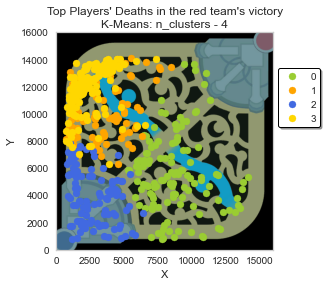

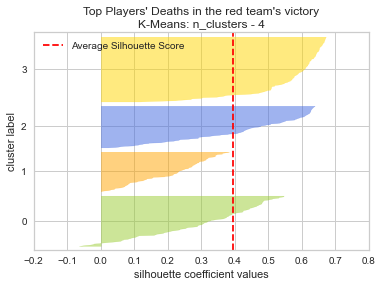

Silhouette score: 0.39591677660189273
3    166
0    129
2    107
1    102
Name: cluster, dtype: int64

Inertia: 372.99765504367844

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8737.751938   5589.527132   0.325581
1        1   3368.627451  10153.549020   0.254902
2        2   2747.373832   3862.579439   0.775701
3        3   2623.939759  11911.319277  -1.000000

In [749]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "orange", "royalblue", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

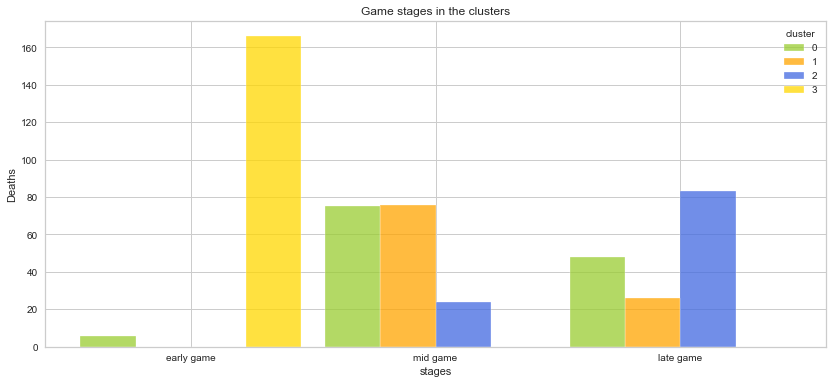

In [750]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

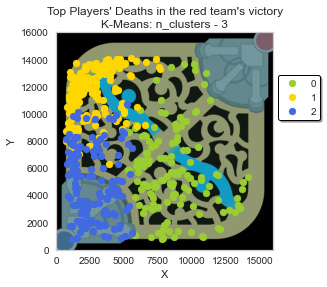

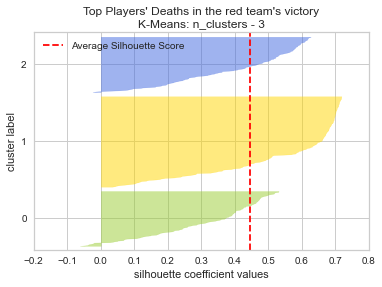

Silhouette score: 0.44559046899485183
1    227
2    139
0    138
Name: cluster, dtype: int64

Inertia: 450.3196890339954

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8585.246377   5768.891304   0.333333
1        1   2792.400881  11702.348018  -0.713656
2        2   2745.856115   4998.172662   0.726619

In [751]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [752]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2050.410347   3017.687222   0.556038
1        1   1442.103362   1763.365427   0.489483
2        2   1365.348716   2612.193050   0.445695

In [753]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14127.0            5318.0           13667.0   
1        1            7684.0             717.0           14100.0   
2        2            5604.0             754.0           10693.0   

   min coordinate_y  max timestamp  min timestamp  
0             788.0              1             -1  
1            6279.0              1             -1  
2             768.0              1              0

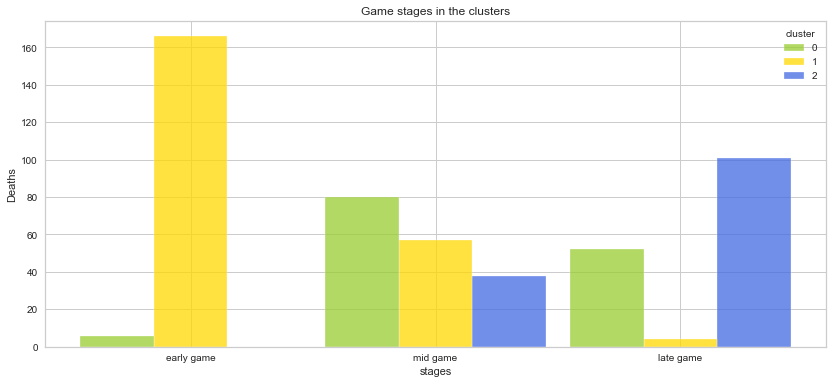

In [754]:
stagesPerClusterV2(redSideVictory_df, colors)

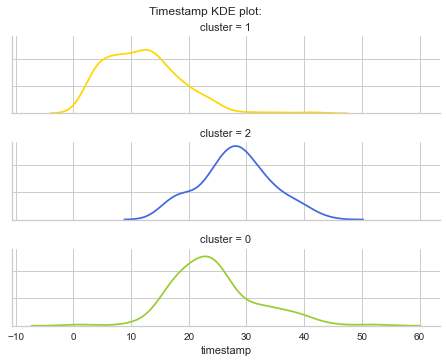

In [755]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [756]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Yorick            15
Jax               12
Darius            12
TahmKench          7
Gangplank          6
Pantheon           6
Illaoi             5
Nasus              5
Olaf               5
Sett               4
Mordekaiser        3
Fiora              3
Garen              3
Tryndamere         2
Malphite           2
Urgot              2
Teemo              2
Kalista            1
Gnar               1
Vayne              1
Riven              1
Jayce              1
Renekton           1
DrMundo            1

Deaths with each champion:

In [757]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jax            65
Yorick         65
Darius         48
Illaoi         40
Gangplank      38
Fiora          36
Pantheon       28
TahmKench      27
Nasus          26
Olaf           25
Mordekaiser    20
Sett           12
Garen          11
Tryndamere     10
Malphite        8
Kalista         7
Teemo           7
Urgot           6
Jayce           6
DrMundo         5
Vayne           5
Gnar            4
Renekton        3
Riven           2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [758]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 24 champions when they won on the red side

Cluster 0 - died with 22 champions:
 ['Darius' 'Fiora' 'Gangplank' 'Garen' 'Gnar' 'Illaoi' 'Jax' 'Jayce'
 'Kalista' 'Malphite' 'Mordekaiser' 'Nasus' 'Olaf' 'Pantheon' 'Renekton'
 'Sett' 'TahmKench' 'Teemo' 'Tryndamere' 'Urgot' 'Vayne' 'Yorick']
Jax            19
Fiora          18
Yorick         14
Darius         11
Illaoi         11
TahmKench       9
Nasus           8
Gangplank       8
Mordekaiser     7
Pantheon        6
Olaf            4
Malphite        4
Kalista         3
Garen           3
Jayce           3
Sett            2
Renekton        2
Tryndamere      2
Gnar            1
Urgot           1
Teemo           1
Vayne           1
Name: champion, dtype: int64

Cluster 1 - died with 24 champions:
 ['Darius' 'DrMundo' 'Fiora' 'Gangplank' 'Garen' 'Gnar' 'Illaoi' 'Jax'
 'Jayce' 'Kalista' 'Malphite' 'Mordekaiser' 'Nasus' 'Olaf' 'Pantheon'
 'Renekton' 'Riven' 'Sett' 'TahmKench' 'Teemo' 'Tryndamere' 'Urgot'
 'Vayne' 'Yo

---
#### Clustering Red Team Defeat

In [759]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
18333   EUW1_6278272529  Red  anonymous 142   euw1    Nasus   9.593467   
18338   EUW1_6278272529  Red  anonymous 142   euw1    Nasus  12.111450   
18341   EUW1_6278272529  Red  anonymous 142   euw1    Nasus  13.978167   
18346   EUW1_6278272529  Red  anonymous 142   euw1    Nasus  16.467550   
18355   EUW1_6278272529  Red  anonymous 142   euw1    Nasus  22.220033   
...                 ...  ...            ...    ...      ...        ...   
640016  EUW1_6289453540  Red  anonymous 147   euw1    Teemo  28.242300   
640019  EUW1_6289453540  Red  anonymous 147   euw1    Teemo  29.796083   
640023  EUW1_6289453540  Red  anonymous 147   euw1    Teemo  31.043967   
640026  EUW1_6289453540  Red  anonymous 147   euw1    Teemo  33.787733   
640032  EUW1_6289453540  Red  anonymous 147   euw1    Teemo  35.915367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
18333         7176.0       13707.0    NaN            NaN  ...   
18338         3567.0       13562.0    NaN            NaN  ...   
18341         1577.0       11155.0    NaN            NaN  ...   
18346         9276.0       13264.0    NaN            NaN  ...   
18355        13820.0       10664.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
640016        7796.0        5233.0    NaN            NaN  ...   
640019        7567.0        3158.0    NaN            NaN  ...   
640023        9254.0        8975.0    NaN            NaN  ...   
640026       10014.0        4934.0    NaN            NaN  ...   
640032        8988.0        9540.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
18333               NaN    False      Death        NaN           NaN   NaN   
18338               NaN    False      Death        NaN           NaN   NaN   
18341               NaN    False      Death        NaN           NaN   NaN   
18346               NaN    False      Death        NaN           NaN   NaN   
18355               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
640016              NaN    False      Death        NaN           NaN   NaN   
640019              NaN    False      Death        NaN           NaN   NaN   
640023              NaN    False      Death        NaN           NaN   NaN   
640026              NaN    False      Death        NaN           NaN   NaN   
640032              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role    rank  
18333       NaN       NaN   TOP  Silver  
18338       NaN       NaN   TOP  Silver  
18341       NaN       NaN   TOP  Silver  
18346       NaN       NaN   TOP  Silver  
18355       NaN       NaN   TOP  Silver  
...         ...       ...   ...     ...  
640016      NaN       NaN   TOP  Silver  
640019      NaN       NaN   TOP  Silver  
640023      NaN       NaN   TOP  Silver  
640026      NaN       NaN   TOP  Silver  
640032      NaN       NaN   TOP  Silver  

[763 rows x 56 columns]

In [760]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)].copy()

In [761]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 142 lost 9 matches on the red side
anonymous 142 has an average of 8.777777777777779 deaths per game when losing on the red side

anonymous 144 lost 9 matches on the red side
anonymous 144 has an average of 7.777777777777778 deaths per game when losing on the red side

anonymous 147 lost 11 matches on the red side
anonymous 147 has an average of 8.636363636363637 deaths per game when losing on the red side

anonymous 151 lost 7 matches on the red side
anonymous 151 has an average of 8.428571428571429 deaths per game when losing on the red side

anonymous 171 lost 6 matches on the red side
anonymous 171 has an average of 6.0 deaths per game when losing on the red side

anonymous 62 lost 16 matches on the red side
anonymous 62 has an average of 7.5625 deaths per game when losing on the red side

anonymous 75 lost 20 matches on the red side
anonymous 75 has an average of 7.05 deaths per game when losing on the red side

anonymous 80 lost 25 matches on the red side
anonymous 80 h

In [762]:
print("Defeat games on red side contains {} matches in which the top died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 103 matches in which the top died at least once
8 players died a total of 763 times on the red side
Defeat games on red side contains an average of 7.407766990291262 deaths per game


In [763]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
18333         7176.0       13707.0   9.593467
18338         3567.0       13562.0  12.111450
18341         1577.0       11155.0  13.978167
18346         9276.0       13264.0  16.467550
18355        13820.0       10664.0  22.220033
...              ...           ...        ...
640016        7796.0        5233.0  28.242300
640019        7567.0        3158.0  29.796083
640023        9254.0        8975.0  31.043967
640026       10014.0        4934.0  33.787733
640032        8988.0        9540.0  35.915367

[763 rows x 3 columns]

Time discretization

In [764]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [765]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [766]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [767]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [768]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
18333       0.188569      1.153667         -1
18338      -0.729010      1.109761         -1
18341      -1.234963      0.380915         -1
18346       0.722489      1.019525          0
18355       1.877790      0.232239          0
...              ...           ...        ...
640016      0.346203     -1.412280          1
640019      0.287980     -2.040595          1
640023      0.716896     -0.279194          1
640026      0.910124     -1.502818          1
640032      0.649266     -0.108110          1

[763 rows x 3 columns]

In [769]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.458210825345948
Silhouette score for k=3: 0.4204240906063838
Silhouette score for k=4: 0.42529254459473503
Silhouette score for k=5: 0.3871759921946219
Silhouette score for k=6: 0.38536610926310366
Silhouette score for k=7: 0.4021535930182413
Silhouette score for k=8: 0.41222206368372655
Silhouette score for k=9: 0.4143953164083493
Silhouette score for k=10: 0.3745618178692517
Silhouette score for k=11: 0.3927182240476631
Silhouette score for k=12: 0.3902401268131545
Silhouette score for k=13: 0.4003100436923075
Silhouette score for k=14: 0.4081121448921412
Silhouette score for k=15: 0.41381114874438185
Silhouette score for k=16: 0.41894620855348674
Silhouette score for k=17: 0.4160409420564266
Silhouette score for k=18: 0.42502237918344393
Silhouette score for k=19: 0.43144823062045073
Silhouette score for k=20: 0.44639869266585
Silhouette score for k=25: 0.4437540605359552


K-Means with k = 4

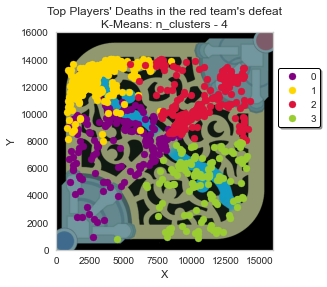

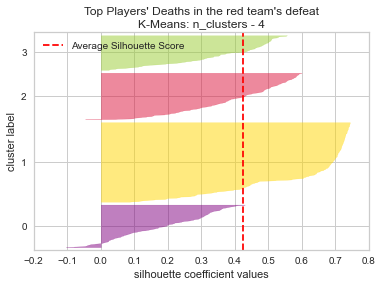

Silhouette score: 0.42529254459473503
1    298
2    175
0    160
3    130
Name: cluster, dtype: int64

Inertia: 554.4056697677802

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4590.237500   7927.443750   0.393750
1        1   3154.604027  12543.328859  -0.808725
2        2  10619.331429  10927.531429   0.645714
3        3  10588.438462   4867.807692   0.469231

In [770]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "gold", "crimson", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

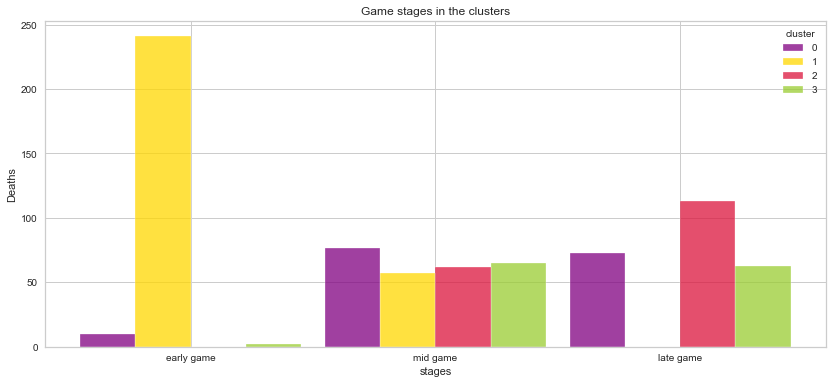

In [771]:
stagesPerClusterV2(redSideDefeat_df, colors)

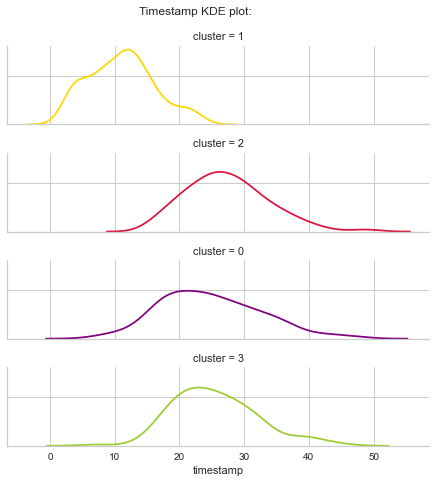

In [772]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

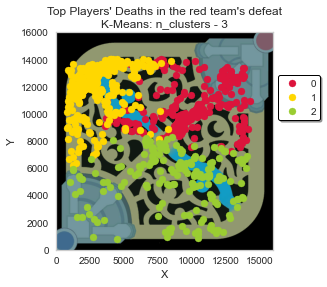

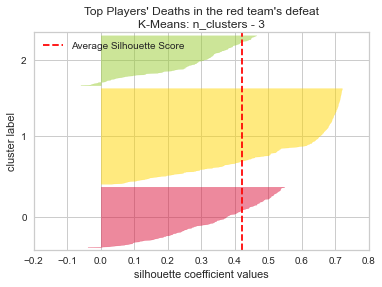

Silhouette score: 0.4204240906063838
1    354
0    224
2    185
Name: cluster, dtype: int64

Inertia: 718.9490798265534

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9815.263393  10507.084821   0.651786
1        1   3131.274011  12008.782486  -0.669492
2        2   8661.081081   5117.513514   0.470270

In [773]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [774]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2714.313853   1675.636997   0.494791
1        1   1585.970279   1748.391219   0.521651
2        2   3223.877224   1976.059741   0.550609

In [775]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14276.0            3585.0           14006.0   
1        1            8467.0             781.0           14056.0   
2        2           14024.0            1011.0            8285.0   

   min coordinate_y  max timestamp  min timestamp  
0            7281.0              1             -1  
1            6230.0              1             -1  
2             820.0              1             -1

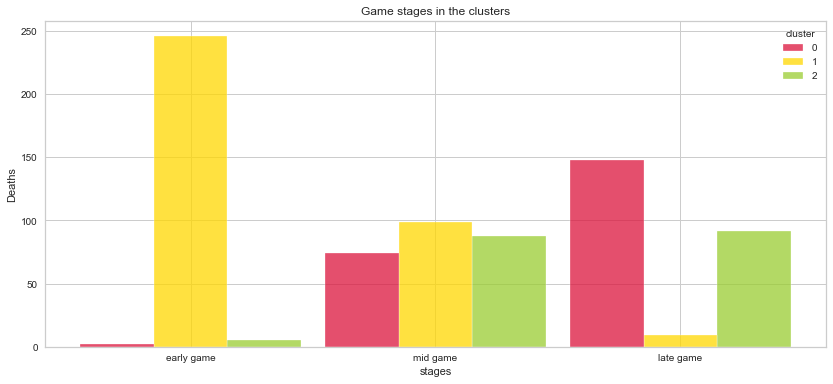

In [776]:
stagesPerClusterV2(redSideDefeat_df, colors)

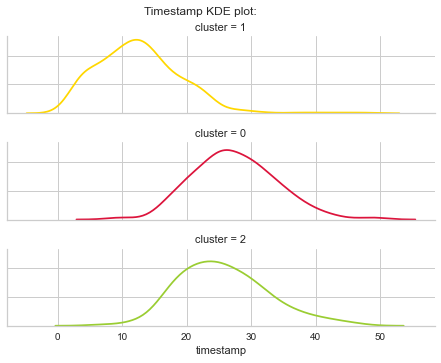

In [777]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [778]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Gangplank          15
Darius             14
Yorick             13
Jax                 9
Nasus               7
Illaoi              6
Olaf                5
Garen               4
Mordekaiser         3
Malphite            3
TahmKench           3
Kalista             2
Riven               2
Akali               2
KSante              1
Pantheon            1
Teemo               1
Sion                1
Fiora               1
Gnar                1
Vayne               1
Tryndamere          1
Sett                1
Chogath             1
Gwen                1
Kayle               1
Heimerdinger        1
Aatrox              1
DrMundo             1

Deaths with each champion:

In [779]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Darius          119
Gangplank       105
Yorick           73
Jax              63
Illaoi           54
Olaf             53
Nasus            44
Malphite         24
Garen            22
TahmKench        20
Akali            18
Mordekaiser      18
DrMundo          13
Heimerdinger     12
Riven            12
Sion             11
Sett             11
Teemo            11
Kayle            10
Gwen              9
Kalista           9
Aatrox            8
Gnar              8
Pantheon          8
KSante            7
Tryndamere        6
Fiora             6
Chogath           5
Vayne             4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [780]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 29 champions when they won on the red side

Cluster 0 - died with 28 champions:
 ['Aatrox' 'Akali' 'Chogath' 'Darius' 'DrMundo' 'Fiora' 'Gangplank' 'Garen'
 'Gnar' 'Gwen' 'Heimerdinger' 'Illaoi' 'Jax' 'KSante' 'Kalista' 'Kayle'
 'Malphite' 'Mordekaiser' 'Nasus' 'Olaf' 'Riven' 'Sett' 'Sion' 'TahmKench'
 'Teemo' 'Tryndamere' 'Vayne' 'Yorick']
Darius          38
Gangplank       30
Yorick          23
Jax             19
Olaf            17
Nasus           14
TahmKench        8
Illaoi           7
Akali            7
Garen            6
Malphite         6
Riven            6
Sett             5
Heimerdinger     5
Mordekaiser      4
Kalista          4
DrMundo          4
Kayle            3
Vayne            2
Sion             2
Gnar             2
Teemo            2
Chogath          2
Gwen             2
Tryndamere       2
KSante           2
Fiora            1
Aatrox           1
Name: champion, dtype: int64

Cluster 1 - died with 29 champions:
 ['Aatrox' 'Akali' 'Chogath' 'D

---
#### Clustering Blue Team Victory

In [781]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region  champion  timestamp  \
18648   EUW1_6277784739  Blue  anonymous 142   euw1       Jax   8.048800   
18658   EUW1_6277784739  Blue  anonymous 142   euw1       Jax  12.136250   
18663   EUW1_6277784739  Blue  anonymous 142   euw1       Jax  14.366433   
18668   EUW1_6277784739  Blue  anonymous 142   euw1       Jax  16.247417   
18672   EUW1_6277784739  Blue  anonymous 142   euw1       Jax  18.682733   
...                 ...   ...            ...    ...       ...        ...   
640163  EUW1_6289278193  Blue  anonymous 147   euw1  Pantheon  12.387500   
640167  EUW1_6289278193  Blue  anonymous 147   euw1  Pantheon  14.381800   
640173  EUW1_6289278193  Blue  anonymous 147   euw1  Pantheon  17.532617   
640181  EUW1_6289278193  Blue  anonymous 147   euw1  Pantheon  20.902367   
640191  EUW1_6289278193  Blue  anonymous 147   euw1  Pantheon  26.132117   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
18648          785.0       10075.0    NaN            NaN  ...   
18658         4990.0        9098.0    NaN            NaN  ...   
18663         3072.0       10934.0    NaN            NaN  ...   
18668         1734.0       12330.0    NaN            NaN  ...   
18672        13473.0        6977.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
640163        1412.0       10450.0    NaN            NaN  ...   
640167        2338.0       11743.0    NaN            NaN  ...   
640173         816.0       10395.0    NaN            NaN  ...   
640181        7895.0        8114.0    NaN            NaN  ...   
640191       13481.0       10358.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
18648               NaN     True      Death        NaN           NaN   NaN   
18658               NaN     True      Death        NaN           NaN   NaN   
18663               NaN     True      Death        NaN           NaN   NaN   
18668               NaN     True      Death        NaN           NaN   NaN   
18672               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
640163              NaN     True      Death        NaN           NaN   NaN   
640167              NaN     True      Death        NaN           NaN   NaN   
640173              NaN     True      Death        NaN           NaN   NaN   
640181              NaN     True      Death        NaN           NaN   NaN   
640191              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role    rank  
18648       NaN       NaN   TOP  Silver  
18658       NaN       NaN   TOP  Silver  
18663       NaN       NaN   TOP  Silver  
18668       NaN       NaN   TOP  Silver  
18672       NaN       NaN   TOP  Silver  
...         ...       ...   ...     ...  
640163      NaN       NaN   TOP  Silver  
640167      NaN       NaN   TOP  Silver  
640173      NaN       NaN   TOP  Silver  
640181      NaN       NaN   TOP  Silver  
640191      NaN       NaN   TOP  Silver  

[435 rows x 56 columns]

In [782]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)].copy()

In [783]:
blueSideGames_df = top_deaths_df[top_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [784]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

82

In [785]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

46.590909090909086

In [786]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

7.544224765868887

In [787]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 142 won 4 matches on the blue side
anonymous 142 has an average of 6.0 deaths per game when winning on the blue side

anonymous 144 won 2 matches on the blue side
anonymous 144 has an average of 3.5 deaths per game when winning on the blue side

anonymous 147 won 13 matches on the blue side
anonymous 147 has an average of 5.846153846153846 deaths per game when winning on the blue side

anonymous 151 won 7 matches on the blue side
anonymous 151 has an average of 8.857142857142858 deaths per game when winning on the blue side

anonymous 171 won 4 matches on the blue side
anonymous 171 has an average of 4.75 deaths per game when winning on the blue side

anonymous 62 won 12 matches on the blue side
anonymous 62 has an average of 5.166666666666667 deaths per game when winning on the blue side

anonymous 75 won 16 matches on the blue side
anonymous 75 has an average of 5.1875 deaths per game when winning on the blue side

anonymous 80 won 24 matches on the blue side
anonymous 80 h

In [788]:
print("Victory games on blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 82 matches in which the top died at least once
8 players died a total of 435 times on the blue side
Victory games on blue side contains an average of 5.304878048780488 deaths per game


In [789]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
18648          785.0       10075.0   8.048800
18658         4990.0        9098.0  12.136250
18663         3072.0       10934.0  14.366433
18668         1734.0       12330.0  16.247417
18672        13473.0        6977.0  18.682733
...              ...           ...        ...
640163        1412.0       10450.0  12.387500
640167        2338.0       11743.0  14.381800
640173         816.0       10395.0  17.532617
640181        7895.0        8114.0  20.902367
640191       13481.0       10358.0  26.132117

[435 rows x 3 columns]

Time discretization

In [790]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [791]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [792]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [793]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [794]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
18648      -1.296875     -0.139100         -1
18658      -0.322543     -0.462449         -1
18663      -0.766959      0.145195         -1
18668      -1.076984      0.607217          0
18672       1.643035     -1.164418          0
...              ...           ...        ...
640163     -1.151594     -0.014990         -1
640167     -0.937033      0.412943         -1
640173     -1.289692     -0.033193          0
640181      0.350568     -0.788115          0
640191      1.644888     -0.045438          1

[435 rows x 3 columns]

In [795]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4513709766158944
Silhouette score for k=3: 0.46614980997155897
Silhouette score for k=4: 0.4476523776398469
Silhouette score for k=5: 0.3897181792812784
Silhouette score for k=6: 0.32673758197715413
Silhouette score for k=7: 0.36434541783942026
Silhouette score for k=8: 0.3673104460580445
Silhouette score for k=9: 0.35426965354500956
Silhouette score for k=10: 0.38182483501344094
Silhouette score for k=11: 0.38303753668386115
Silhouette score for k=12: 0.4000456629810873
Silhouette score for k=13: 0.4084748869644759
Silhouette score for k=14: 0.41069390653570353
Silhouette score for k=15: 0.4246747776662751
Silhouette score for k=16: 0.4420932084270345
Silhouette score for k=17: 0.4407868940520294
Silhouette score for k=18: 0.4434269696832983
Silhouette score for k=19: 0.44240048964598505
Silhouette score for k=20: 0.41190859378383016
Silhouette score for k=25: 0.4364639028414443


K-Means with k = 4

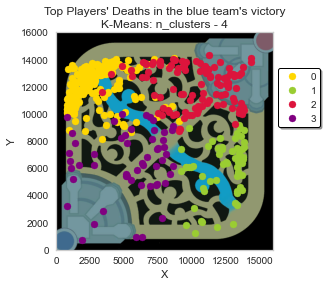

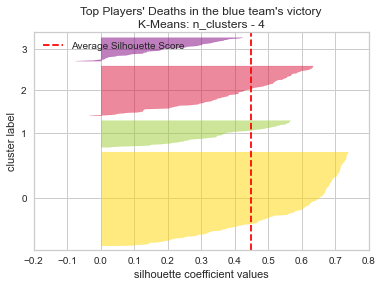

Silhouette score: 0.4476523776398469
0    210
2    112
1     60
3     53
Name: cluster, dtype: int64

Inertia: 317.8573549508064

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2893.085714  11937.142857  -0.785714
1        1  12233.116667   6000.750000   0.283333
2        2  10242.330357  12110.241071   0.633929
3        3   5424.622642   6457.735849   0.226415

In [796]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson", "purple"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

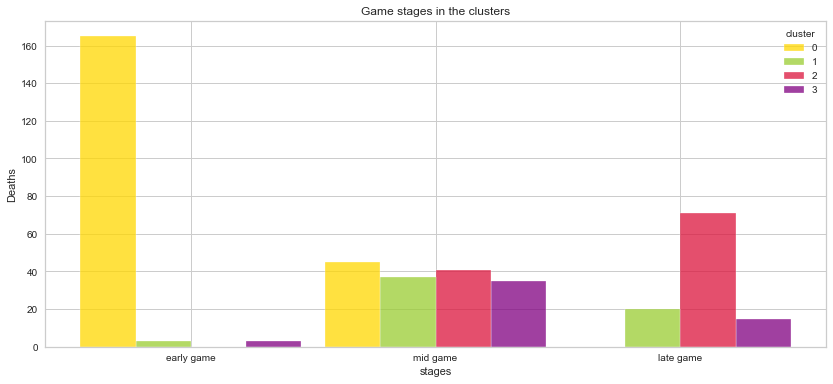

In [797]:
stagesPerClusterV2(blueSideVictory_df, colors)

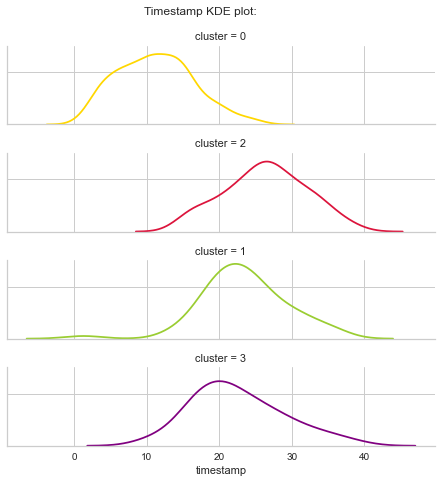

In [798]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

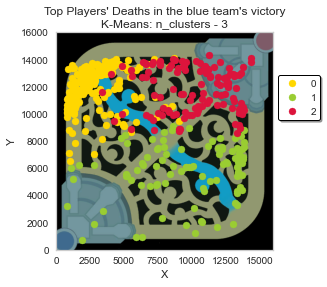

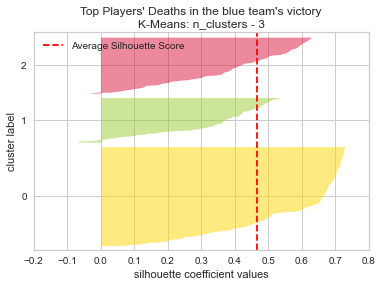

Silhouette score: 0.46614980997155897
0    216
2    122
1     97
Name: cluster, dtype: int64

Inertia: 375.00861159912216

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2850.893519  11822.652778  -0.768519
1        1   9591.298969   5796.257732   0.247423
2        2  10082.229508  11881.327869   0.631148

In [799]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [800]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1762.896618   1512.318812   0.432617
1        1   3592.242120   2037.817188   0.518342
2        2   2587.174777   1613.737264   0.482494

In [801]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9024.0             785.0           14083.0   
1        1           13873.0             801.0            9092.0   
2        2           14350.0            3367.0           14349.0   

   min coordinate_y  max timestamp  min timestamp  
0            6547.0              1             -1  
1             729.0              1             -1  
2            8593.0              1              0

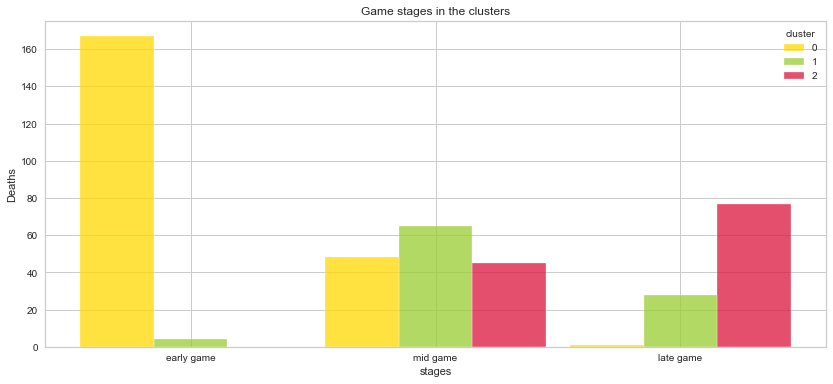

In [802]:
stagesPerClusterV2(blueSideVictory_df, colors)

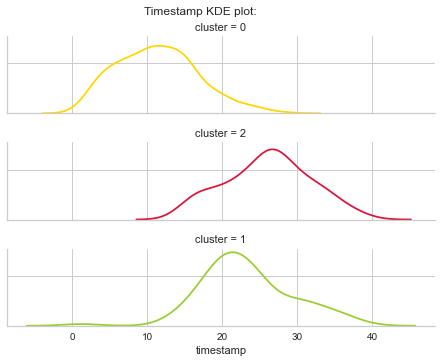

In [803]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [804]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Yorick            15
Darius            12
Jax                9
Illaoi             6
Gangplank          6
Pantheon           5
Mordekaiser        3
Nasus              3
Renekton           3
TahmKench          2
Ornn               2
Garen              1
Sion               1
Jayce              1
Yasuo              1
Shyvana            1
Cassiopeia         1
Olaf               1
Akali              1
Malphite           1
Teemo              1
Riven              1
Irelia             1
Gnar               1
Camille            1
Sett               1
Gwen               1

Deaths with each champion:

In [805]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Yorick         77
Illaoi         51
Darius         44
Jax            41
Gangplank      35
Pantheon       30
Renekton       20
Nasus          18
Shyvana        14
Mordekaiser    12
Ornn           11
Garen           9
Sion            9
Olaf            7
Yasuo           7
Jayce           6
Teemo           5
Irelia          5
TahmKench       5
Sett            4
Gnar            4
Akali           4
Riven           4
Cassiopeia      4
Camille         3
Malphite        3
Gwen            3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [806]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 27 champions when they won on the red side

Cluster 0 - died with 27 champions:
 ['Akali' 'Camille' 'Cassiopeia' 'Darius' 'Gangplank' 'Garen' 'Gnar' 'Gwen'
 'Illaoi' 'Irelia' 'Jax' 'Jayce' 'Malphite' 'Mordekaiser' 'Nasus' 'Olaf'
 'Ornn' 'Pantheon' 'Renekton' 'Riven' 'Sett' 'Shyvana' 'Sion' 'TahmKench'
 'Teemo' 'Yasuo' 'Yorick']
Yorick         37
Illaoi         26
Gangplank      21
Jax            20
Pantheon       19
Darius         18
Nasus           8
Ornn            6
Renekton        6
Mordekaiser     6
Sion            5
Gnar            4
Jayce           4
Olaf            4
Shyvana         4
Akali           3
Teemo           3
Yasuo           3
Malphite        3
Garen           2
Gwen            2
Camille         2
Cassiopeia      2
Sett            2
Riven           2
TahmKench       2
Irelia          2
Name: champion, dtype: int64

Cluster 1 - died with 20 champions:
 ['Cassiopeia' 'Darius' 'Gangplank' 'Garen' 'Illaoi' 'Jax' 'Jayce'
 'Mordekaiser' 'Nasus' 

---
#### Clustering Blue Team Defeat

In [807]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region   champion  timestamp  \
18364   EUW1_6278241940  Blue  anonymous 142   euw1  Gangplank   3.620717   
18371   EUW1_6278241940  Blue  anonymous 142   euw1  Gangplank   6.527850   
18373   EUW1_6278241940  Blue  anonymous 142   euw1  Gangplank   7.611650   
18387   EUW1_6278241940  Blue  anonymous 142   euw1  Gangplank  16.926833   
18391   EUW1_6278241940  Blue  anonymous 142   euw1  Gangplank  18.020383   
...                 ...   ...            ...    ...        ...        ...   
631712  EUW1_6289755268  Blue   anonymous 75   euw1  Gangplank   2.143300   
631715  EUW1_6289755268  Blue   anonymous 75   euw1  Gangplank   3.636833   
631735  EUW1_6289755268  Blue   anonymous 75   euw1  Gangplank  12.630867   
631739  EUW1_6289755268  Blue   anonymous 75   euw1  Gangplank  14.672050   
631746  EUW1_6289755268  Blue   anonymous 75   euw1  Gangplank  18.715100   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
18364         1245.0       10347.0    NaN            NaN  ...   
18371         1111.0       10577.0    NaN            NaN  ...   
18373         3698.0       10025.0    NaN            NaN  ...   
18387         1302.0       11102.0    NaN            NaN  ...   
18391         1417.0        6207.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
631712        2185.0       13120.0    NaN            NaN  ...   
631715        1194.0       10516.0    NaN            NaN  ...   
631735        1443.0        9990.0    NaN            NaN  ...   
631739        2954.0       11482.0    NaN            NaN  ...   
631746        1043.0        5691.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
18364               NaN    False      Death        NaN           NaN   NaN   
18371               NaN    False      Death        NaN           NaN   NaN   
18373               NaN    False      Death        NaN           NaN   NaN   
18387               NaN    False      Death        NaN           NaN   NaN   
18391               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
631712              NaN    False      Death        NaN           NaN   NaN   
631715              NaN    False      Death        NaN           NaN   NaN   
631735              NaN    False      Death        NaN           NaN   NaN   
631739              NaN    False      Death        NaN           NaN   NaN   
631746              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role    rank  
18364       NaN       NaN   TOP  Silver  
18371       NaN       NaN   TOP  Silver  
18373       NaN       NaN   TOP  Silver  
18387       NaN       NaN   TOP  Silver  
18391       NaN       NaN   TOP  Silver  
...         ...       ...   ...     ...  
631712      NaN       NaN   TOP  Silver  
631715      NaN       NaN   TOP  Silver  
631735      NaN       NaN   TOP  Silver  
631739      NaN       NaN   TOP  Silver  
631746      NaN       NaN   TOP  Silver  

[706 rows x 56 columns]

In [808]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)].copy()

In [809]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 142 lost 10 matches on the blue side
anonymous 142 has an average of 9.1 deaths per game when losing on the blue side

anonymous 144 lost 8 matches on the blue side
anonymous 144 has an average of 8.625 deaths per game when losing on the blue side

anonymous 147 lost 8 matches on the blue side
anonymous 147 has an average of 10.125 deaths per game when losing on the blue side

anonymous 151 lost 6 matches on the blue side
anonymous 151 has an average of 10.166666666666666 deaths per game when losing on the blue side

anonymous 171 lost 12 matches on the blue side
anonymous 171 has an average of 7.166666666666667 deaths per game when losing on the blue side

anonymous 62 lost 10 matches on the blue side
anonymous 62 has an average of 6.9 deaths per game when losing on the blue side

anonymous 75 lost 17 matches on the blue side
anonymous 75 has an average of 6.705882352941177 deaths per game when losing on the blue side

anonymous 80 lost 23 matches on the blue side
anonymous 

In [810]:
print("Defeat games on blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 94 matches in which the top died at least once
8 players died a total of 706 times on the blue side
Defeat games on blue side contains an average of 7.51063829787234 deaths per game


In [811]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
18364         1245.0       10347.0   3.620717
18371         1111.0       10577.0   6.527850
18373         3698.0       10025.0   7.611650
18387         1302.0       11102.0  16.926833
18391         1417.0        6207.0  18.020383
...              ...           ...        ...
631712        2185.0       13120.0   2.143300
631715        1194.0       10516.0   3.636833
631735        1443.0        9990.0  12.630867
631739        2954.0       11482.0  14.672050
631746        1043.0        5691.0  18.715100

[706 rows x 3 columns]

Time discretization

In [812]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [813]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [814]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [815]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [816]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
18364      -1.012702      0.506954         -1
18371      -1.053224      0.568070         -1
18373      -0.270899      0.421391         -1
18387      -0.995464      0.707575          0
18391      -0.960688     -0.593140          0
...              ...           ...        ...
631712     -0.728440      1.243804         -1
631715     -1.028124      0.551861         -1
631735     -0.952825      0.412091         -1
631739     -0.495890      0.808549         -1
631746     -1.073788     -0.730253          0

[706 rows x 3 columns]

In [817]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4287302227561194
Silhouette score for k=3: 0.4255975866879558
Silhouette score for k=4: 0.4094932417491424
Silhouette score for k=5: 0.3832181147454268
Silhouette score for k=6: 0.39409905309865706
Silhouette score for k=7: 0.4045821995519698
Silhouette score for k=8: 0.4075303741015571
Silhouette score for k=9: 0.3687971369714465
Silhouette score for k=10: 0.3662826256532539
Silhouette score for k=11: 0.38226946812154783
Silhouette score for k=12: 0.38426415731811636
Silhouette score for k=13: 0.39178920949152457
Silhouette score for k=14: 0.3928069706734077
Silhouette score for k=15: 0.39788538547406016
Silhouette score for k=16: 0.39642028888774034
Silhouette score for k=17: 0.40159252121206784
Silhouette score for k=18: 0.4071500181543338
Silhouette score for k=19: 0.413412204086208
Silhouette score for k=20: 0.4123214087927125
Silhouette score for k=25: 0.4359745102946356


K-Means with k = 3

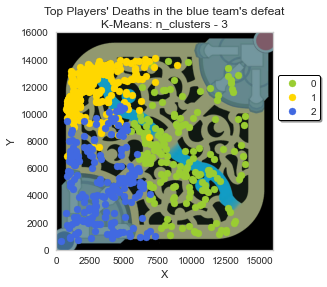

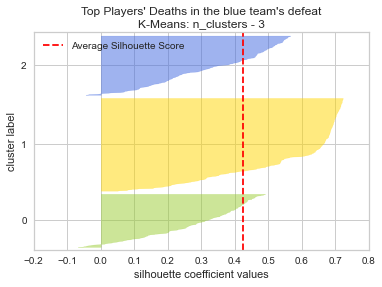

Silhouette score: 0.4255975866879558
1    319
2    204
0    183
Name: cluster, dtype: int64

Inertia: 675.4745612666577

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9230.885246   6864.672131   0.409836
1        1   2651.420063  11625.918495  -0.686520
2        2   3471.455882   4868.397059   0.553922

In [818]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [819]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2189.288577   3019.719066   0.583293
1        1   1607.528508   1460.128712   0.515138
2        2   1747.796070   2577.835306   0.516430

In [820]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13905.0            5522.0           13861.0   
1        1            8903.0             764.0           14106.0   
2        2            7306.0             392.0           10549.0   

   min coordinate_y  max timestamp  min timestamp  
0            1080.0              1             -1  
1            5538.0              1             -1  
2             630.0              1             -1

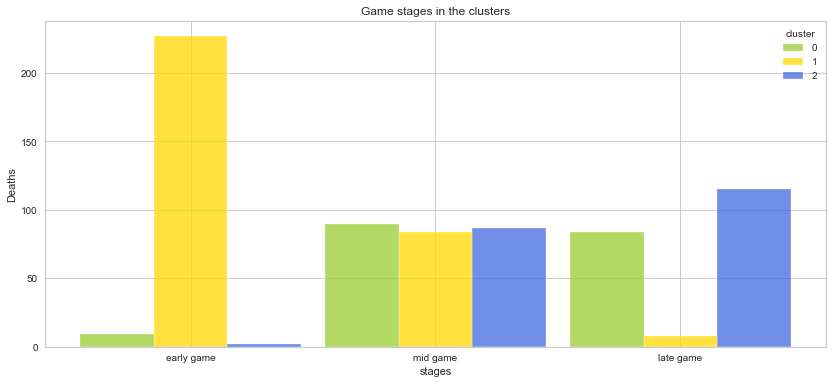

In [821]:
stagesPerClusterV2(blueSideDefeat_df, colors)

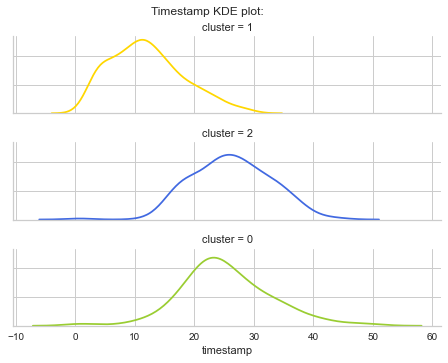

In [822]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [823]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Yorick            12
Gangplank         12
Darius            10
Illaoi             5
Jax                5
Renekton           5
Nasus              5
TahmKench          5
Mordekaiser        4
Malphite           3
Kayle              3
Pantheon           2
Garen              2
Jayce              2
Teemo              2
DrMundo            2
Olaf               2
Sett               2
Warwick            1
MonkeyKing         1
Gnar               1
Fiora              1
Kennen             1
Aatrox             1
Kayn               1
Camille            1
Zac                1
Sylas              1
Tryndamere         1

Deaths with each champion:

In [824]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Gangplank      90
Yorick         71
Darius         58
Illaoi         57
TahmKench      41
Jax            40
Mordekaiser    35
Renekton       32
Nasus          29
Kayle          28
Jayce          25
Pantheon       21
Olaf           17
Garen          16
Malphite       15
Kennen         14
DrMundo        14
Gnar           11
Teemo          11
Sylas          10
Camille        10
Aatrox          9
Kayn            9
Sett            8
Fiora           8
Zac             8
MonkeyKing      8
Warwick         7
Tryndamere      4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [825]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 29 champions when they won on the red side

Cluster 0 - died with 24 champions:
 ['Aatrox' 'Darius' 'DrMundo' 'Fiora' 'Gangplank' 'Garen' 'Gnar' 'Illaoi'
 'Jax' 'Jayce' 'Kayle' 'Kennen' 'Malphite' 'MonkeyKing' 'Mordekaiser'
 'Nasus' 'Olaf' 'Pantheon' 'Renekton' 'Sylas' 'TahmKench' 'Warwick'
 'Yorick' 'Zac']
Yorick         30
Illaoi         18
Gangplank      18
Darius         17
TahmKench      12
Renekton       12
Jax             9
Kennen          8
Mordekaiser     7
Gnar            7
Malphite        6
Pantheon        6
Olaf            5
Nasus           5
Jayce           4
DrMundo         4
Aatrox          3
Zac             2
Warwick         2
Garen           2
Fiora           2
Kayle           2
Sylas           1
MonkeyKing      1
Name: champion, dtype: int64

Cluster 1 - died with 29 champions:
 ['Aatrox' 'Camille' 'Darius' 'DrMundo' 'Fiora' 'Gangplank' 'Garen' 'Gnar'
 'Illaoi' 'Jax' 'Jayce' 'Kayle' 'Kayn' 'Kennen' 'Malphite' 'MonkeyKing'
 'Mordekaiser' 'Na

---
### Gold Players

#### Clustering Red Team Victory

In [826]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
3514    EUW1_6275563297  Red  anonymous 130   euw1   Singed   3.267650   
3520    EUW1_6275563297  Red  anonymous 130   euw1   Singed   5.931200   
3526    EUW1_6275563297  Red  anonymous 130   euw1   Singed   8.785300   
3529    EUW1_6275563297  Red  anonymous 130   euw1   Singed   9.745567   
3534    EUW1_6275563297  Red  anonymous 130   euw1   Singed  11.489383   
...                 ...  ...            ...    ...      ...        ...   
643181  EUW1_6289333450  Red  anonymous 176   euw1   Darius  26.950600   
643430  EUW1_6289796520  Red  anonymous 180   euw1   Yorick  15.175550   
643434  EUW1_6289796520  Red  anonymous 180   euw1   Yorick  17.062267   
643438  EUW1_6289796520  Red  anonymous 180   euw1   Yorick  18.843033   
643443  EUW1_6289796520  Red  anonymous 180   euw1   Yorick  20.601450   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3514          3777.0       13520.0    NaN            NaN  ...   
3520          1780.0       11652.0    NaN            NaN  ...   
3526          3208.0       11933.0    NaN            NaN  ...   
3529          1577.0       12095.0    NaN            NaN  ...   
3534           842.0        7541.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
643181        3900.0       13037.0    NaN            NaN  ...   
643430        1603.0       11809.0    NaN            NaN  ...   
643434        3029.0       12628.0    NaN            NaN  ...   
643438        3999.0       12762.0    NaN            NaN  ...   
643443        4270.0        9212.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3514                NaN     True      Death        NaN           NaN   NaN   
3520                NaN     True      Death        NaN           NaN   NaN   
3526                NaN     True      Death        NaN           NaN   NaN   
3529                NaN     True      Death        NaN           NaN   NaN   
3534                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
643181              NaN     True      Death        NaN           NaN   NaN   
643430              NaN     True      Death        NaN           NaN   NaN   
643434              NaN     True      Death        NaN           NaN   NaN   
643438              NaN     True      Death        NaN           NaN   NaN   
643443              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
3514        NaN       NaN   TOP  Gold  
3520        NaN       NaN   TOP  Gold  
3526        NaN       NaN   TOP  Gold  
3529        NaN       NaN   TOP  Gold  
3534        NaN       NaN   TOP  Gold  
...         ...       ...   ...   ...  
643181      NaN       NaN   TOP  Gold  
643430      NaN       NaN   TOP  Gold  
643434      NaN       NaN   TOP  Gold  
643438      NaN       NaN   TOP  Gold  
643443      NaN       NaN   TOP  Gold  

[386 rows x 56 columns]

In [827]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)].copy()

In [828]:
redSideGames_df = top_deaths_df[top_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [829]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

76

In [830]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

55.47445255474452

In [831]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

6.448379552288673

In [832]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 130 won 12 matches on the red side
anonymous 130 has an average of 5.083333333333333 deaths per game when winning on the red side

anonymous 156 won 13 matches on the red side
anonymous 156 has an average of 4.615384615384615 deaths per game when winning on the red side

anonymous 159 won 6 matches on the red side
anonymous 159 has an average of 5.166666666666667 deaths per game when winning on the red side

anonymous 176 won 14 matches on the red side
anonymous 176 has an average of 4.428571428571429 deaths per game when winning on the red side

anonymous 177 won 7 matches on the red side
anonymous 177 has an average of 7.714285714285714 deaths per game when winning on the red side

anonymous 180 won 8 matches on the red side
anonymous 180 has an average of 3.0 deaths per game when winning on the red side

anonymous 48 won 16 matches on the red side
anonymous 48 has an average of 5.875 deaths per game when winning on the red side



In [833]:
print("Victory games on red side contains {} matches in which the top died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 76 matches in which the top died at least once
7 players died a total of 386 times on the red side
Victory games on red side contains an average of 5.078947368421052 deaths per game


In [834]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
3514          3777.0       13520.0   3.267650
3520          1780.0       11652.0   5.931200
3526          3208.0       11933.0   8.785300
3529          1577.0       12095.0   9.745567
3534           842.0        7541.0  11.489383
...              ...           ...        ...
643181        3900.0       13037.0  26.950600
643430        1603.0       11809.0  15.175550
643434        3029.0       12628.0  17.062267
643438        3999.0       12762.0  18.843033
643443        4270.0        9212.0  20.601450

[386 rows x 3 columns]

Time discretization

In [835]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [836]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [837]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [838]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [839]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
3514       -0.282117      1.140493         -1
3520       -0.912730      0.693307         -1
3526       -0.461796      0.760577         -1
3529       -0.976834      0.799358         -1
3534       -1.208932     -0.290837         -1
...              ...           ...        ...
643181     -0.243276      1.024867          1
643430     -0.968623      0.730892          0
643434     -0.518321      0.926955          0
643438     -0.212014      0.959033          0
643443     -0.126437      0.109189          0

[386 rows x 3 columns]

In [840]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4752223531778198
Silhouette score for k=3: 0.44790853353873306
Silhouette score for k=4: 0.3861909346979842
Silhouette score for k=5: 0.390793915069823
Silhouette score for k=6: 0.3875127321119935
Silhouette score for k=7: 0.33749232125959555
Silhouette score for k=8: 0.3567450948419419
Silhouette score for k=9: 0.36805726010011036
Silhouette score for k=10: 0.374920421716979
Silhouette score for k=11: 0.37473347997733786
Silhouette score for k=12: 0.3805474402480802
Silhouette score for k=13: 0.39398338695940266
Silhouette score for k=14: 0.3857265293923097
Silhouette score for k=15: 0.39414111871285695
Silhouette score for k=16: 0.4054610592696505
Silhouette score for k=17: 0.3561864618752164
Silhouette score for k=18: 0.3968445539847947
Silhouette score for k=19: 0.40446419267769324
Silhouette score for k=20: 0.4032836625022745
Silhouette score for k=25: 0.4031892961448729


K-Means with k = 4

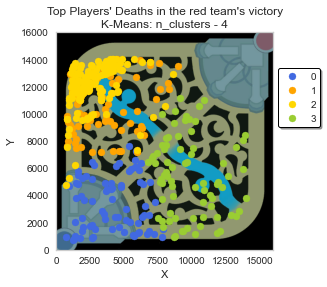

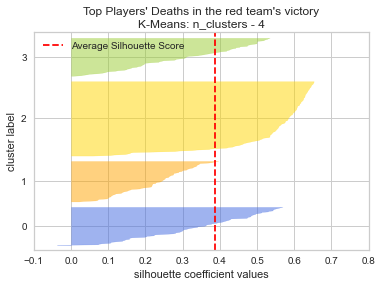

Silhouette score: 0.3861909346979842
2    150
1     82
3     77
0     77
Name: cluster, dtype: int64

Inertia: 279.8464543895983

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4165.636364   3444.610390   0.584416
1        1   3460.524390  10694.841463   0.158537
2        2   2962.466667  12141.520000  -1.000000
3        3   9790.727273   5406.948052   0.220779

In [841]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "orange", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

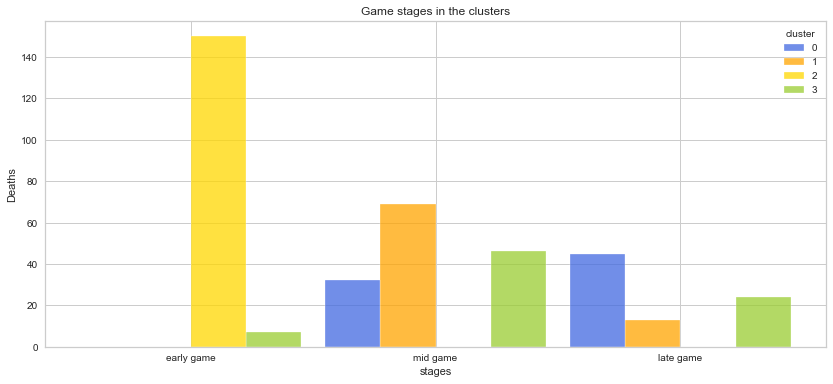

In [842]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

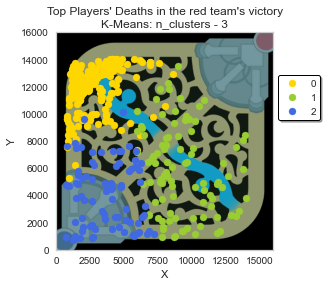

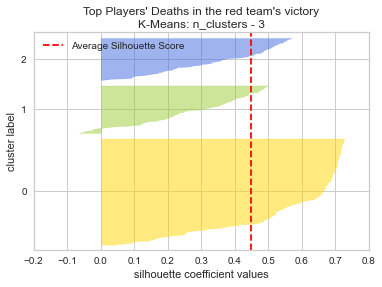

Silhouette score: 0.44790853353873306
0    209
1     94
2     83
Name: cluster, dtype: int64

Inertia: 341.1237727750602

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2955.660287  11930.861244  -0.688995
1        1   9303.255319   5829.478723   0.265957
2        2   3741.373494   4075.349398   0.530120

In [843]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [844]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1535.762565   1680.824862   0.511984
1        1   2061.482724   3158.602060   0.586652
2        2   1819.617487   2397.304000   0.522675

In [845]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8588.0             781.0           14057.0   
1        1           13961.0            5936.0           13548.0   
2        2            7233.0             711.0           10160.0   

   min coordinate_y  max timestamp  min timestamp  
0            5280.0              1             -1  
1             920.0              1             -1  
2             743.0              1             -1

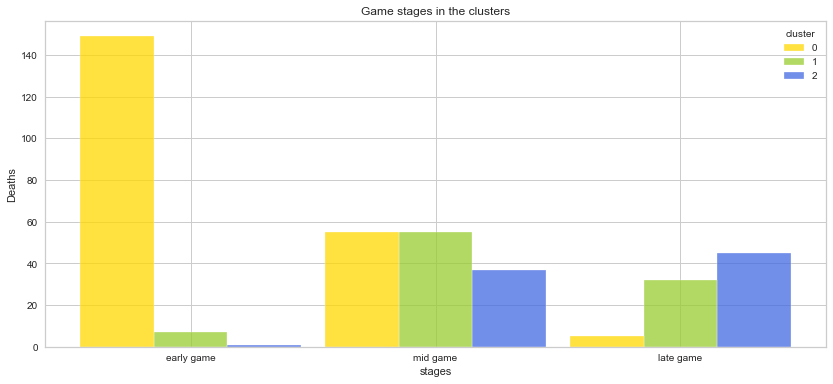

In [846]:
stagesPerClusterV2(redSideVictory_df, colors)

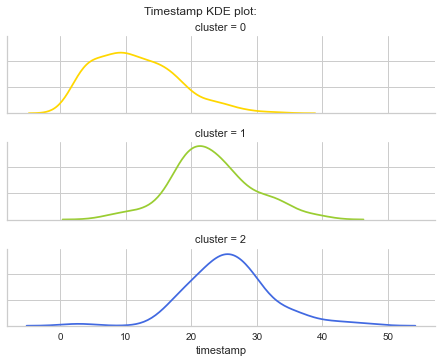

In [847]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [848]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Yorick          11
Gangplank        9
Camille          6
Singed           6
Gwen             4
Zac              4
Olaf             4
Pantheon         4
Darius           4
KSante           3
Yasuo            2
Sion             2
Aatrox           2
Ezreal           2
Kaisa            2
Garen            1
Jax              1
Warwick          1
Jayce            1
Tristana         1
Caitlyn          1
Yone             1
Nasus            1
Fiora            1
Ornn             1
Urgot            1

Deaths with each champion:

In [849]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Camille      44
Singed       43
Gangplank    39
Olaf         31
Pantheon     30
Yorick       30
Gwen         21
Zac          17
KSante       15
Kaisa        14
Yasuo        13
Darius       13
Aatrox       11
Ezreal        9
Yone          8
Warwick       6
Garen         6
Jayce         6
Urgot         6
Caitlyn       5
Sion          5
Tristana      3
Nasus         3
Fiora         3
Jax           3
Ornn          2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [850]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 26 champions when they won on the red side

Cluster 0 - died with 25 champions:
 ['Aatrox' 'Caitlyn' 'Camille' 'Darius' 'Ezreal' 'Fiora' 'Gangplank'
 'Garen' 'Gwen' 'Jax' 'Jayce' 'KSante' 'Kaisa' 'Nasus' 'Olaf' 'Pantheon'
 'Singed' 'Sion' 'Tristana' 'Urgot' 'Warwick' 'Yasuo' 'Yone' 'Yorick'
 'Zac']
Singed       26
Yorick       23
Camille      23
Gangplank    17
Olaf         16
Pantheon     13
Gwen         12
Yasuo         9
Kaisa         8
Darius        7
Ezreal        7
Zac           7
KSante        6
Aatrox        5
Urgot         5
Sion          4
Garen         3
Caitlyn       3
Warwick       3
Jayce         3
Tristana      2
Yone          2
Nasus         2
Jax           2
Fiora         1
Name: champion, dtype: int64

Cluster 1 - died with 24 champions:
 ['Aatrox' 'Camille' 'Darius' 'Ezreal' 'Fiora' 'Gangplank' 'Garen' 'Gwen'
 'Jax' 'Jayce' 'KSante' 'Kaisa' 'Nasus' 'Olaf' 'Ornn' 'Pantheon' 'Singed'
 'Tristana' 'Urgot' 'Warwick' 'Yasuo' 'Yone' 'Yorick' 'Zac

---
#### Clustering Red Team Defeat

In [851]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
3640    EUW1_6275510573  Red  anonymous 130   euw1   Rumble   8.935917   
3643    EUW1_6275510573  Red  anonymous 130   euw1   Rumble  10.344500   
3650    EUW1_6275510573  Red  anonymous 130   euw1   Rumble  14.186500   
3654    EUW1_6275510573  Red  anonymous 130   euw1   Rumble  16.423250   
3657    EUW1_6275510573  Red  anonymous 130   euw1   Rumble  18.071983   
...                 ...  ...            ...    ...      ...        ...   
643325  EUW1_6289889931  Red  anonymous 180   euw1   Yorick   9.782067   
643333  EUW1_6289889931  Red  anonymous 180   euw1   Yorick  14.393283   
643336  EUW1_6289889931  Red  anonymous 180   euw1   Yorick  15.990800   
643340  EUW1_6289889931  Red  anonymous 180   euw1   Yorick  18.316183   
643347  EUW1_6289889931  Red  anonymous 180   euw1   Yorick  21.774150   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3640          3336.0       13082.0    NaN            NaN  ...   
3643          2988.0       13224.0    NaN            NaN  ...   
3650          1706.0       12214.0    NaN            NaN  ...   
3654          6766.0       11008.0    NaN            NaN  ...   
3657          7341.0        9070.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
643325        3714.0       13390.0    NaN            NaN  ...   
643333        4309.0       13385.0    NaN            NaN  ...   
643336        3110.0       12746.0    NaN            NaN  ...   
643340        4130.0       11712.0    NaN            NaN  ...   
643347        2710.0        9952.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3640                NaN    False      Death        NaN           NaN   NaN   
3643                NaN    False      Death        NaN           NaN   NaN   
3650                NaN    False      Death        NaN           NaN   NaN   
3654                NaN    False      Death        NaN           NaN   NaN   
3657                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
643325              NaN    False      Death        NaN           NaN   NaN   
643333              NaN    False      Death        NaN           NaN   NaN   
643336              NaN    False      Death        NaN           NaN   NaN   
643340              NaN    False      Death        NaN           NaN   NaN   
643347              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
3640        NaN       NaN   TOP  Gold  
3643        NaN       NaN   TOP  Gold  
3650        NaN       NaN   TOP  Gold  
3654        NaN       NaN   TOP  Gold  
3657        NaN       NaN   TOP  Gold  
...         ...       ...   ...   ...  
643325      NaN       NaN   TOP  Gold  
643333      NaN       NaN   TOP  Gold  
643336      NaN       NaN   TOP  Gold  
643340      NaN       NaN   TOP  Gold  
643347      NaN       NaN   TOP  Gold  

[436 rows x 56 columns]

In [852]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)].copy()

In [853]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 130 lost 8 matches on the red side
anonymous 130 has an average of 5.375 deaths per game when losing on the red side

anonymous 156 lost 9 matches on the red side
anonymous 156 has an average of 7.555555555555555 deaths per game when losing on the red side

anonymous 159 lost 5 matches on the red side
anonymous 159 has an average of 10.4 deaths per game when losing on the red side

anonymous 176 lost 10 matches on the red side
anonymous 176 has an average of 7.4 deaths per game when losing on the red side

anonymous 177 lost 5 matches on the red side
anonymous 177 has an average of 7.4 deaths per game when losing on the red side

anonymous 180 lost 9 matches on the red side
anonymous 180 has an average of 4.555555555555555 deaths per game when losing on the red side

anonymous 48 lost 15 matches on the red side
anonymous 48 has an average of 8.066666666666666 deaths per game when losing on the red side



In [854]:
print("Defeat games on red side contains {} matches in which the top died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 61 matches in which the top died at least once
7 players died a total of 436 times on the red side
Defeat games on red side contains an average of 7.147540983606557 deaths per game


In [855]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
3640          3336.0       13082.0   8.935917
3643          2988.0       13224.0  10.344500
3650          1706.0       12214.0  14.186500
3654          6766.0       11008.0  16.423250
3657          7341.0        9070.0  18.071983
...              ...           ...        ...
643325        3714.0       13390.0   9.782067
643333        4309.0       13385.0  14.393283
643336        3110.0       12746.0  15.990800
643340        4130.0       11712.0  18.316183
643347        2710.0        9952.0  21.774150

[436 rows x 3 columns]

Time discretization

In [856]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [857]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [858]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [859]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [860]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
3640       -0.747770      0.855148         -1
3643       -0.839761      0.900297         -1
3650       -1.178648      0.579163         -1
3654        0.158925      0.195710          0
3657        0.310922     -0.420485          0
...              ...           ...        ...
643325     -0.647848      0.953078         -1
643333     -0.490564      0.951488         -1
643336     -0.807511      0.748315          0
643340     -0.537882      0.419550          0
643347     -0.913248     -0.140049          0

[436 rows x 3 columns]

In [861]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4676917204150358
Silhouette score for k=3: 0.4202765436997885
Silhouette score for k=4: 0.4056196942831692
Silhouette score for k=5: 0.3677784575514247
Silhouette score for k=6: 0.3662908131343242
Silhouette score for k=7: 0.3608767165700475
Silhouette score for k=8: 0.37129143692929145
Silhouette score for k=9: 0.37965638928856454
Silhouette score for k=10: 0.3809983486607671
Silhouette score for k=11: 0.40053710236112516
Silhouette score for k=12: 0.4027643087045257
Silhouette score for k=13: 0.4039826352311215
Silhouette score for k=14: 0.40744118654039774
Silhouette score for k=15: 0.41731434711213355
Silhouette score for k=16: 0.42111283295185525
Silhouette score for k=17: 0.4180589459830789
Silhouette score for k=18: 0.4015407601039391
Silhouette score for k=19: 0.4094167437581849
Silhouette score for k=20: 0.43563056156388663
Silhouette score for k=25: 0.4227015622766508


K-Means with k = 4

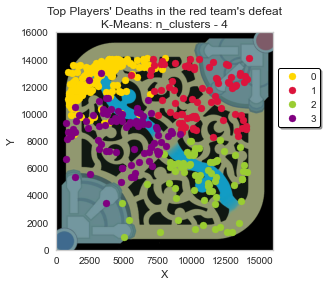

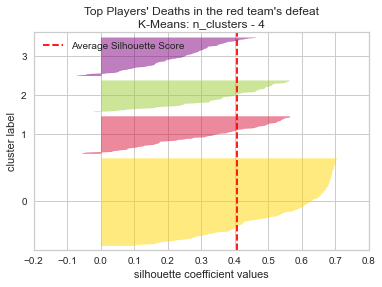

Silhouette score: 0.4056196942831692
0    196
3     86
1     84
2     70
Name: cluster, dtype: int64

Inertia: 317.41589843685404

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3305.280612  12644.459184  -0.806122
1        1  10564.452381  11324.511905   0.511905
2        2  10513.385714   5192.771429   0.371429
3        3   4844.918605   8581.976744   0.162791

In [862]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen", "purple"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

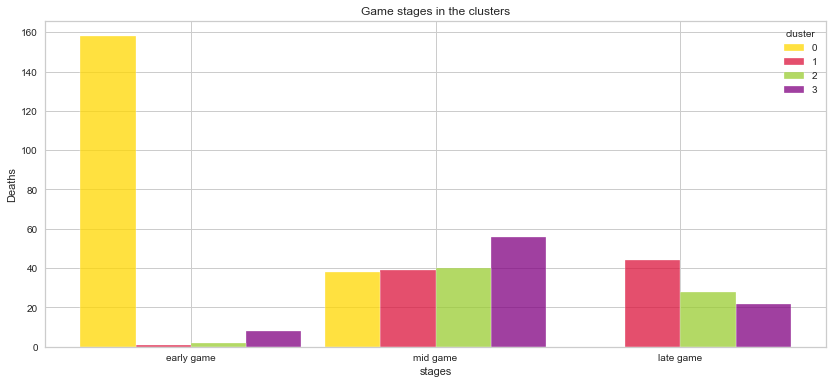

In [863]:
stagesPerClusterV2(redSideDefeat_df, colors)

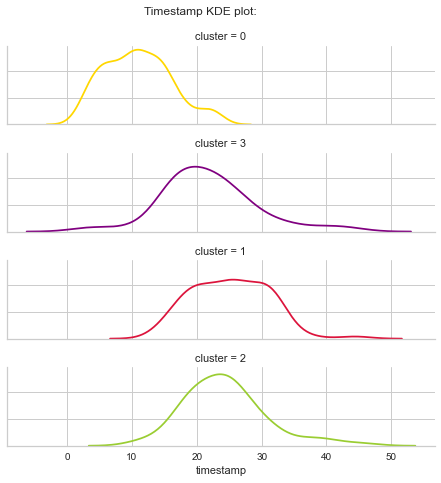

In [864]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

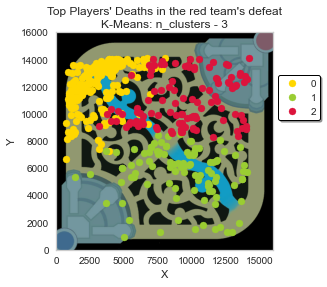

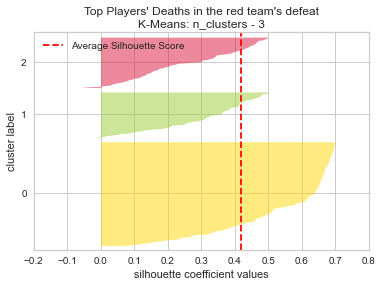

Silhouette score: 0.4202765436997885
0    227
2    110
1     99
Name: cluster, dtype: int64

Inertia: 400.62697966882763

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3240.784141  12193.497797  -0.700441
1        1   9216.070707   5640.878788   0.292929
2        2   9452.727273  10952.236364   0.500000

In [865]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [866]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1530.849323   1647.668090   0.486061
1        1   2817.793847   1867.117068   0.573004
2        2   2812.026461   1772.046572   0.517863

In [867]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8022.0             733.0           14089.0   
1        1           14034.0            1434.0            8516.0   
2        2           14184.0            3151.0           14086.0   

   min coordinate_y  max timestamp  min timestamp  
0            6707.0              1             -1  
1             959.0              1             -1  
2            8308.0              1             -1

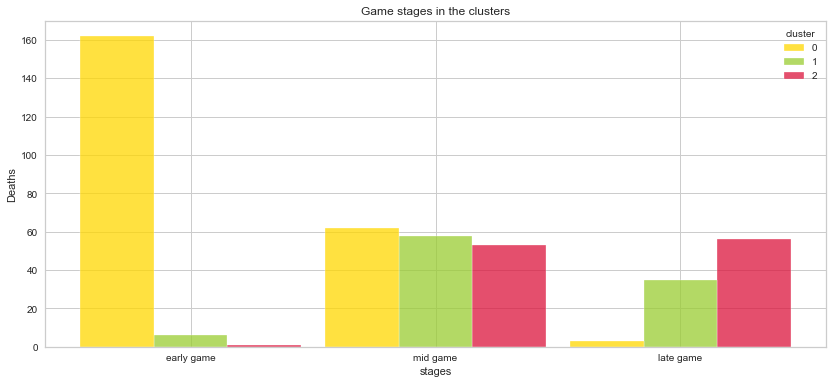

In [868]:
stagesPerClusterV2(redSideDefeat_df, colors)

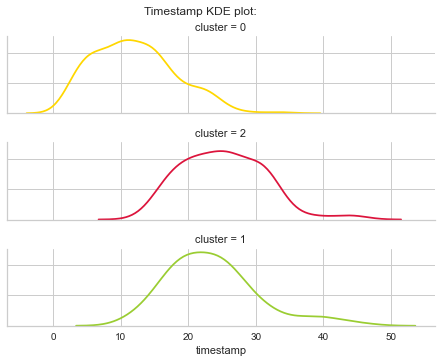

In [869]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [870]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Yorick            10
Gangplank          6
Gwen               5
Darius             4
Aatrox             3
Nasus              3
Camille            3
Ezreal             3
Rumble             2
KSante             2
Fiora              2
Mordekaiser        2
Jayce              2
Kled               2
Sion               1
Volibear           1
Urgot              1
Renekton           1
Zac                1
Singed             1
Olaf               1
Garen              1
Jax                1
Ornn               1
Kassadin           1
Gnar               1

Deaths with each champion:

In [871]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Yorick         49
Gangplank      46
Gwen           37
Aatrox         32
Ezreal         32
Darius         31
Camille        26
Nasus          24
Fiora          18
Kled           16
KSante         13
Jayce          13
Mordekaiser    11
Rumble         10
Volibear       10
Olaf            9
Kassadin        9
Renekton        7
Jax             7
Zac             7
Singed          6
Sion            6
Garen           5
Gnar            5
Ornn            4
Urgot           3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [872]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 26 champions when they won on the red side

Cluster 0 - died with 25 champions:
 ['Aatrox' 'Camille' 'Darius' 'Ezreal' 'Fiora' 'Gangplank' 'Garen' 'Gnar'
 'Gwen' 'Jax' 'Jayce' 'KSante' 'Kassadin' 'Kled' 'Mordekaiser' 'Nasus'
 'Olaf' 'Ornn' 'Renekton' 'Rumble' 'Singed' 'Sion' 'Volibear' 'Yorick'
 'Zac']
Yorick         36
Gwen           23
Gangplank      19
Ezreal         16
Darius         16
Aatrox         15
Camille        13
Nasus          11
KSante          8
Kled            7
Mordekaiser     6
Fiora           6
Rumble          6
Kassadin        6
Olaf            5
Jayce           5
Ornn            4
Sion            4
Renekton        4
Garen           3
Singed          3
Zac             3
Volibear        3
Gnar            3
Jax             2
Name: champion, dtype: int64

Cluster 1 - died with 24 champions:
 ['Aatrox' 'Camille' 'Darius' 'Ezreal' 'Fiora' 'Gangplank' 'Garen' 'Gwen'
 'Jax' 'Jayce' 'KSante' 'Kassadin' 'Kled' 'Mordekaiser' 'Nasus' 'Olaf'
 'Renek

---
#### Clustering Blue Team Victory

In [873]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
3471    EUW1_6276409988  Blue  anonymous 130   euw1   Singed  14.727967   
3488    EUW1_6276409988  Blue  anonymous 130   euw1   Singed  22.273483   
3672    EUW1_6274285224  Blue  anonymous 130   euw1   Singed   2.538700   
3676    EUW1_6274285224  Blue  anonymous 130   euw1   Singed   3.841017   
3681    EUW1_6274285224  Blue  anonymous 130   euw1   Singed   6.196667   
...                 ...   ...            ...    ...      ...        ...   
643102  EUW1_6289402539  Blue  anonymous 176   euw1   Darius  29.766667   
643105  EUW1_6289402539  Blue  anonymous 176   euw1   Darius  31.601733   
643111  EUW1_6289402539  Blue  anonymous 176   euw1   Darius  34.332467   
643259  EUW1_6289931620  Blue  anonymous 180   euw1   Yorick   9.561250   
643269  EUW1_6289931620  Blue  anonymous 180   euw1   Yorick  13.617750   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3471          6520.0       13909.0    NaN            NaN  ...   
3488          5429.0       13998.0    NaN            NaN  ...   
3672          1236.0       11369.0    NaN            NaN  ...   
3676         10327.0       14150.0    NaN            NaN  ...   
3681          3624.0       11192.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
643102       10314.0        2723.0    NaN            NaN  ...   
643105        6283.0       13702.0    NaN            NaN  ...   
643111        5200.0        8799.0    NaN            NaN  ...   
643259        1444.0       10858.0    NaN            NaN  ...   
643269        3139.0       13226.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3471                NaN     True      Death        NaN           NaN   NaN   
3488                NaN     True      Death        NaN           NaN   NaN   
3672                NaN     True      Death        NaN           NaN   NaN   
3676                NaN     True      Death        NaN           NaN   NaN   
3681                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
643102              NaN     True      Death        NaN           NaN   NaN   
643105              NaN     True      Death        NaN           NaN   NaN   
643111              NaN     True      Death        NaN           NaN   NaN   
643259              NaN     True      Death        NaN           NaN   NaN   
643269              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
3471        NaN       NaN   TOP  Gold  
3488        NaN       NaN   TOP  Gold  
3672        NaN       NaN   TOP  Gold  
3676        NaN       NaN   TOP  Gold  
3681        NaN       NaN   TOP  Gold  
...         ...       ...   ...   ...  
643102      NaN       NaN   TOP  Gold  
643105      NaN       NaN   TOP  Gold  
643111      NaN       NaN   TOP  Gold  
643259      NaN       NaN   TOP  Gold  
643269      NaN       NaN   TOP  Gold  

[410 rows x 56 columns]

In [874]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)].copy()

In [875]:
blueSideGames_df = top_deaths_df[top_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [876]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

81

In [877]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

51.26582278481012

In [878]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

7.11064862989941

In [879]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 130 won 12 matches on the blue side
anonymous 130 has an average of 3.8333333333333335 deaths per game when winning on the blue side

anonymous 156 won 15 matches on the blue side
anonymous 156 has an average of 4.8 deaths per game when winning on the blue side

anonymous 159 won 7 matches on the blue side
anonymous 159 has an average of 7.571428571428571 deaths per game when winning on the blue side

anonymous 176 won 13 matches on the blue side
anonymous 176 has an average of 4.615384615384615 deaths per game when winning on the blue side

anonymous 177 won 6 matches on the blue side
anonymous 177 has an average of 9.5 deaths per game when winning on the blue side

anonymous 180 won 12 matches on the blue side
anonymous 180 has an average of 2.8333333333333335 deaths per game when winning on the blue side

anonymous 48 won 16 matches on the blue side
anonymous 48 has an average of 5.5 deaths per game when winning on the blue side



In [880]:
print("Victory games on blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 81 matches in which the top died at least once
7 players died a total of 410 times on the blue side
Victory games on blue side contains an average of 5.061728395061729 deaths per game


In [881]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
3471          6520.0       13909.0  14.727967
3488          5429.0       13998.0  22.273483
3672          1236.0       11369.0   2.538700
3676         10327.0       14150.0   3.841017
3681          3624.0       11192.0   6.196667
...              ...           ...        ...
643102       10314.0        2723.0  29.766667
643105        6283.0       13702.0  31.601733
643111        5200.0        8799.0  34.332467
643259        1444.0       10858.0   9.561250
643269        3139.0       13226.0  13.617750

[410 rows x 3 columns]

Time discretization

In [882]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [883]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [884]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [885]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [886]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
3471        0.035272      1.229787         -1
3488       -0.224385      1.259605          0
3672       -1.222313      0.378814         -1
3676        0.941333      1.310529         -1
3681       -0.653972      0.319514         -1
...              ...           ...        ...
643102      0.938239     -2.517846          1
643105     -0.021134      1.160436          1
643111     -0.278886     -0.482210          1
643259     -1.172809      0.207614         -1
643269     -0.769402      1.000963         -1

[410 rows x 3 columns]

In [887]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.43930945743501265
Silhouette score for k=3: 0.4038501445104197
Silhouette score for k=4: 0.3513753027793283
Silhouette score for k=5: 0.3628877820167159
Silhouette score for k=6: 0.3523414285344386
Silhouette score for k=7: 0.3524409403325099
Silhouette score for k=8: 0.3676847322116005
Silhouette score for k=9: 0.3702460107390313
Silhouette score for k=10: 0.3777052510292327
Silhouette score for k=11: 0.3785682371462108
Silhouette score for k=12: 0.3851577768266188
Silhouette score for k=13: 0.3983306762963803
Silhouette score for k=14: 0.40845059053938665
Silhouette score for k=15: 0.4067055194538093
Silhouette score for k=16: 0.41540170618771993
Silhouette score for k=17: 0.4167864610120353
Silhouette score for k=18: 0.4182033351679236
Silhouette score for k=19: 0.423114533230323
Silhouette score for k=20: 0.41821389734117564
Silhouette score for k=25: 0.41526518411147334


K-Means with k = 4

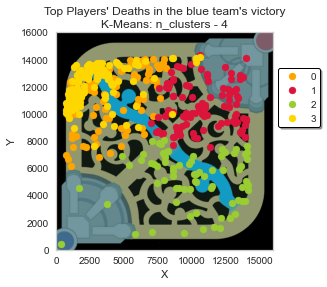

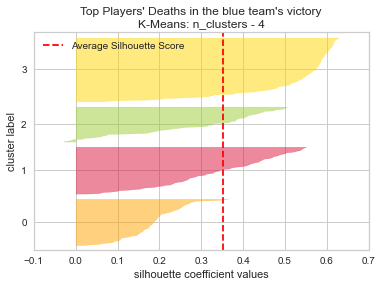

Silhouette score: 0.3513753027793283
3    136
1    100
0     99
2     75
Name: cluster, dtype: int64

Inertia: 334.1920236949534

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3959.515152  11229.030303   0.171717
1        1  10705.000000  10590.960000   0.600000
2        2   9989.680000   5224.026667   0.240000
3        3   2946.463235  12023.051471  -1.000000

In [888]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["orange", "crimson", "yellowgreen", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

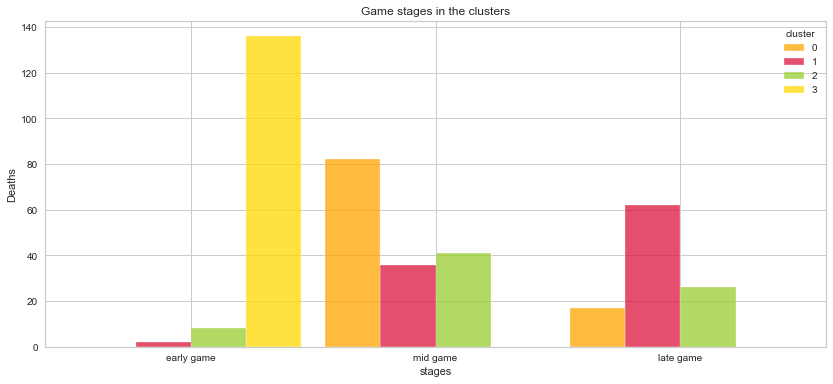

In [889]:
stagesPerClusterV2(blueSideVictory_df, colors)

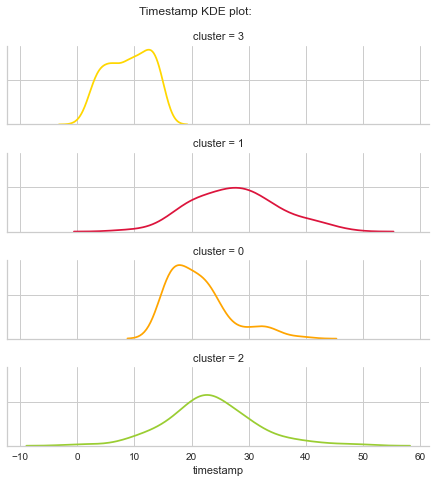

In [890]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

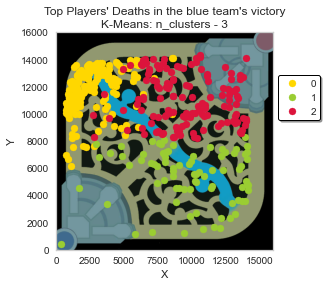

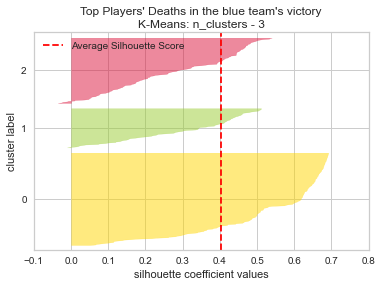

Silhouette score: 0.4038501445104197
0    192
2    136
1     82
Name: cluster, dtype: int64

Inertia: 397.80073016094644

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2706.151042  11685.583333  -0.682292
1        1   9732.560976   5423.524390   0.292683
2        2   9520.485294  11098.132353   0.485294

In [891]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [892]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1662.281794   1607.241232   0.487445
1        1   3245.973668   1949.495440   0.634146
2        2   2697.160187   1801.709767   0.568606

In [893]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8599.0             762.0           14146.0   
1        1           14132.0             394.0            8296.0   
2        2           14013.0            2718.0           14353.0   

   min coordinate_y  max timestamp  min timestamp  
0            6180.0              1             -1  
1             461.0              1             -1  
2            8254.0              1             -1

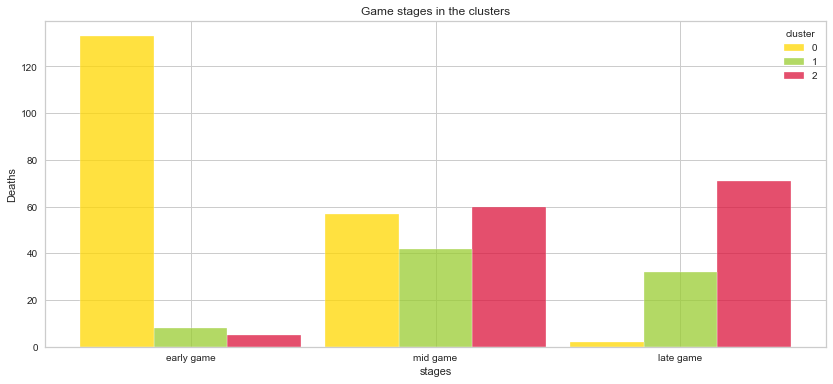

In [894]:
stagesPerClusterV2(blueSideVictory_df, colors)

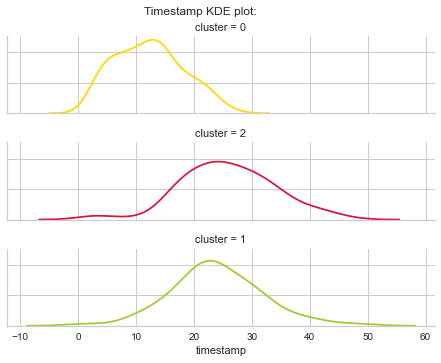

In [895]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [896]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Yorick          14
Darius           9
Sion             6
Zac              5
Camille          5
Gangplank        5
KSante           4
Singed           4
Kaisa            3
Jayce            3
Aatrox           3
Ezreal           2
Gwen             2
Yone             2
Fiora            2
Pantheon         2
Malphite         1
Teemo            1
Riven            1
Soraka           1
Olaf             1
Yasuo            1
Nunu             1
KogMaw           1
Jax              1
Gnar             1

Deaths with each champion:

In [897]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Yorick       39
Kaisa        33
Darius       32
Gangplank    30
Aatrox       28
Camille      28
Sion         26
KSante       25
Pantheon     21
Zac          17
Jayce        16
Gwen         15
Singed       15
Yone         12
Ezreal       11
Fiora         9
Jax           8
Malphite      7
Teemo         7
Olaf          6
Nunu          6
Soraka        5
Riven         5
KogMaw        4
Yasuo         3
Gnar          2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [898]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 26 champions when they won on the red side

Cluster 0 - died with 25 champions:
 ['Aatrox' 'Camille' 'Darius' 'Ezreal' 'Fiora' 'Gangplank' 'Gwen' 'Jax'
 'Jayce' 'KSante' 'Kaisa' 'KogMaw' 'Malphite' 'Nunu' 'Olaf' 'Pantheon'
 'Riven' 'Singed' 'Sion' 'Soraka' 'Teemo' 'Yasuo' 'Yone' 'Yorick' 'Zac']
Yorick       21
Gangplank    18
Camille      15
Aatrox       13
Kaisa        13
Darius       13
Jayce        12
Singed        9
Gwen          9
Ezreal        9
Sion          8
KSante        8
Zac           8
Soraka        5
Pantheon      5
Olaf          4
Riven         3
Yone          3
KogMaw        3
Teemo         3
Fiora         2
Yasuo         2
Nunu          2
Jax           2
Malphite      2
Name: champion, dtype: int64

Cluster 1 - died with 21 champions:
 ['Aatrox' 'Camille' 'Darius' 'Fiora' 'Gangplank' 'Gwen' 'Jax' 'KSante'
 'Kaisa' 'KogMaw' 'Malphite' 'Nunu' 'Olaf' 'Pantheon' 'Riven' 'Singed'
 'Sion' 'Teemo' 'Yone' 'Yorick' 'Zac']
Kaisa        12
Darius      

---
#### Clustering Blue Team Defeat

In [899]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region   champion  timestamp  \
3905    EUW1_6273831598  Blue  anonymous 130   euw1       Sion  21.897483   
3925    EUW1_6273831598  Blue  anonymous 130   euw1       Sion  30.412483   
3931    EUW1_6273831598  Blue  anonymous 130   euw1       Sion  33.936483   
3955    EUW1_6273798143  Blue  anonymous 130   euw1       Sion  11.261517   
3977    EUW1_6273798143  Blue  anonymous 130   euw1       Sion  23.246633   
...                 ...   ...            ...    ...        ...        ...   
643238  EUW1_6289299471  Blue  anonymous 176   euw1  Gangplank  23.591367   
643510  EUW1_6289751522  Blue  anonymous 180   euw1     Yorick  18.121150   
643512  EUW1_6289751522  Blue  anonymous 180   euw1     Yorick  19.537900   
643517  EUW1_6289751522  Blue  anonymous 180   euw1     Yorick  22.041200   
643556  EUW1_6289696584  Blue  anonymous 180   euw1      Nasus  20.391050   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3905          3374.0       10881.0    NaN            NaN  ...   
3925          9555.0        9816.0    NaN            NaN  ...   
3931          5438.0        6264.0    NaN            NaN  ...   
3955          3891.0       12994.0    NaN            NaN  ...   
3977          7958.0        7249.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
643238        1812.0        4549.0    NaN            NaN  ...   
643510        2825.0       12558.0    NaN            NaN  ...   
643512       11724.0        4087.0    NaN            NaN  ...   
643517        1642.0        9813.0    NaN            NaN  ...   
643556         714.0        6706.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3905                NaN    False      Death        NaN           NaN   NaN   
3925                NaN    False      Death        NaN           NaN   NaN   
3931                NaN    False      Death        NaN           NaN   NaN   
3955                NaN    False      Death        NaN           NaN   NaN   
3977                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
643238              NaN    False      Death        NaN           NaN   NaN   
643510              NaN    False      Death        NaN           NaN   NaN   
643512              NaN    False      Death        NaN           NaN   NaN   
643517              NaN    False      Death        NaN           NaN   NaN   
643556              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
3905        NaN       NaN   TOP  Gold  
3925        NaN       NaN   TOP  Gold  
3931        NaN       NaN   TOP  Gold  
3955        NaN       NaN   TOP  Gold  
3977        NaN       NaN   TOP  Gold  
...         ...       ...   ...   ...  
643238      NaN       NaN   TOP  Gold  
643510      NaN       NaN   TOP  Gold  
643512      NaN       NaN   TOP  Gold  
643517      NaN       NaN   TOP  Gold  
643556      NaN       NaN   TOP  Gold  

[518 rows x 56 columns]

In [900]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)].copy()

In [901]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 130 lost 8 matches on the blue side
anonymous 130 has an average of 4.0 deaths per game when losing on the blue side

anonymous 156 lost 12 matches on the blue side
anonymous 156 has an average of 6.666666666666667 deaths per game when losing on the blue side

anonymous 159 lost 9 matches on the blue side
anonymous 159 has an average of 8.444444444444445 deaths per game when losing on the blue side

anonymous 176 lost 14 matches on the blue side
anonymous 176 has an average of 6.214285714285714 deaths per game when losing on the blue side

anonymous 177 lost 8 matches on the blue side
anonymous 177 has an average of 9.75 deaths per game when losing on the blue side

anonymous 180 lost 11 matches on the blue side
anonymous 180 has an average of 4.0 deaths per game when losing on the blue side

anonymous 48 lost 15 matches on the blue side
anonymous 48 has an average of 8.066666666666666 deaths per game when losing on the blue side



In [902]:
print("Defeat games on blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 77 matches in which the top died at least once
7 players died a total of 518 times on the blue side
Defeat games on blue side contains an average of 6.7272727272727275 deaths per game


In [903]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
3905          3374.0       10881.0  21.897483
3925          9555.0        9816.0  30.412483
3931          5438.0        6264.0  33.936483
3955          3891.0       12994.0  11.261517
3977          7958.0        7249.0  23.246633
...              ...           ...        ...
643238        1812.0        4549.0  23.591367
643510        2825.0       12558.0  18.121150
643512       11724.0        4087.0  19.537900
643517        1642.0        9813.0  22.041200
643556         714.0        6706.0  20.391050

[518 rows x 3 columns]

Time discretization

In [904]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [905]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [906]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [907]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [908]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
3905       -0.389406      0.628179          0
3925        1.338354      0.352052          1
3931        0.187539     -0.568889          1
3955       -0.244891      1.176025         -1
3977        0.891949     -0.313504          0
...              ...           ...        ...
643238     -0.826029     -1.013543          0
643510     -0.542867      1.062982          0
643512      1.944650     -1.133328          0
643517     -0.873548      0.351275          0
643556     -1.132950     -0.454290          0

[518 rows x 3 columns]

In [909]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4489449881117889
Silhouette score for k=3: 0.45520629805562934
Silhouette score for k=4: 0.4342348394258011
Silhouette score for k=5: 0.39752822209189365
Silhouette score for k=6: 0.40060943336508614
Silhouette score for k=7: 0.39466459586821134
Silhouette score for k=8: 0.3932058864645127
Silhouette score for k=9: 0.34992743876163535
Silhouette score for k=10: 0.3687343182103487
Silhouette score for k=11: 0.37219126615855663
Silhouette score for k=12: 0.3715471456673615
Silhouette score for k=13: 0.3878676473392843
Silhouette score for k=14: 0.38452347923012214
Silhouette score for k=15: 0.3863489932279538
Silhouette score for k=16: 0.38787615722898533
Silhouette score for k=17: 0.40399995040854925
Silhouette score for k=18: 0.40835757796112016
Silhouette score for k=19: 0.39972515982074003
Silhouette score for k=20: 0.4054909023035014
Silhouette score for k=25: 0.4252076763998684


K-Means with k = 3

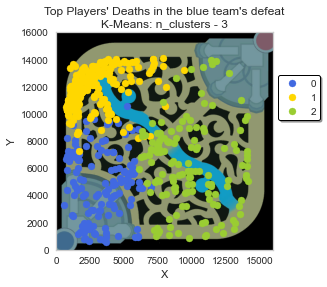

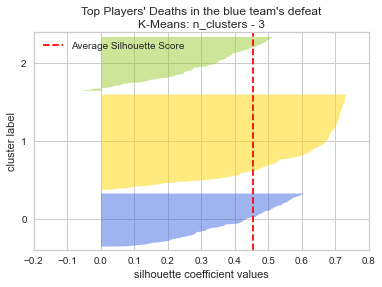

Silhouette score: 0.45520629805562934
1    244
2    138
0    136
Name: cluster, dtype: int64

Inertia: 461.4097395460761

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3356.830882   4846.080882   0.610294
1        1   2698.090164  11736.913934  -0.700820
2        2   9815.130435   6220.673913   0.217391

In [910]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [911]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1626.018018   2505.147844   0.487684
1        1   1751.254110   1384.273762   0.524638
2        2   2236.055704   3064.876902   0.574067

In [912]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            7016.0             587.0           10579.0   
1        1            9396.0             754.0           14119.0   
2        2           14100.0            6118.0           13957.0   

   min coordinate_y  max timestamp  min timestamp  
0             558.0              1              0  
1            7257.0              1             -1  
2             842.0              1             -1

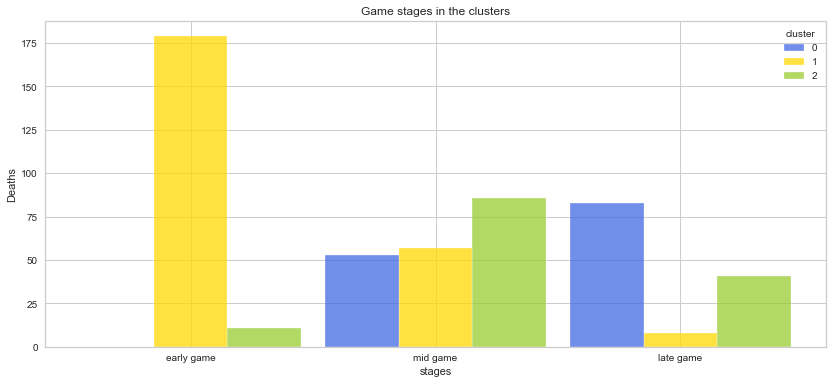

In [913]:
stagesPerClusterV2(blueSideDefeat_df, colors)

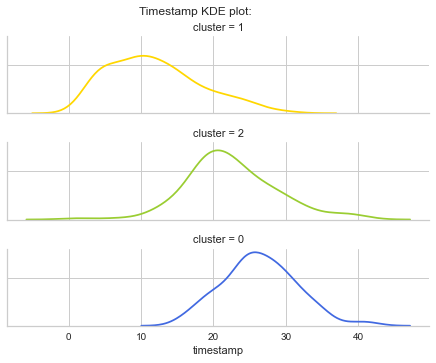

In [914]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [915]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Yorick          13
Gangplank        8
Sion             6
KSante           6
Darius           5
Camille          4
Olaf             3
Gwen             3
Zac              3
Pantheon         3
Yone             3
Aatrox           2
Kennen           1
Viego            1
Chogath          1
DrMundo          1
Trundle          1
Ezreal           1
Riven            1
Lucian           1
Singed           1
Fizz             1
Jayce            1
Jax              1
Vayne            1
Senna            1
Sett             1
Rengar           1
Rammus           1
Nasus            1

Deaths with each champion:

In [916]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Yorick       55
Gangplank    52
KSante       42
Camille      37
Yone         35
Darius       34
Sion         30
Olaf         28
Pantheon     24
Zac          23
Aatrox       14
Lucian       12
Gwen         12
Vayne        11
Jax          11
Ezreal       11
Chogath      10
Fizz          9
Viego         9
Kennen        8
Sett          7
Senna         7
Rammus        6
DrMundo       6
Riven         5
Rengar        5
Trundle       5
Singed        5
Jayce         4
Nasus         1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [917]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 30 champions when they won on the red side

Cluster 0 - died with 30 champions:
 ['Aatrox' 'Camille' 'Chogath' 'Darius' 'DrMundo' 'Ezreal' 'Fizz'
 'Gangplank' 'Gwen' 'Jax' 'Jayce' 'KSante' 'Kennen' 'Lucian' 'Nasus'
 'Olaf' 'Pantheon' 'Rammus' 'Rengar' 'Riven' 'Senna' 'Sett' 'Singed'
 'Sion' 'Trundle' 'Vayne' 'Viego' 'Yone' 'Yorick' 'Zac']
Gangplank    19
Darius       13
Camille      11
KSante       10
Yorick       10
Yone         10
Zac           7
Sion          6
Olaf          6
Aatrox        4
Rammus        4
Viego         4
Pantheon      4
Gwen          3
Lucian        3
Sett          3
Fizz          2
Rengar        2
Riven         2
Jax           2
Chogath       2
Senna         1
Ezreal        1
Kennen        1
Vayne         1
Singed        1
Jayce         1
DrMundo       1
Trundle       1
Nasus         1
Name: champion, dtype: int64

Cluster 1 - died with 28 champions:
 ['Aatrox' 'Camille' 'Chogath' 'Darius' 'DrMundo' 'Ezreal' 'Fizz'
 'Gangplank' 'Gwen'

---
### Platinum Players

#### Clustering Red Team Victory

In [918]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region  champion  timestamp  \
51591   EUW1_6278855540  Red  anonymous 164   euw1  Pantheon   2.759100   
51925   EUW1_6277773273  Red  anonymous 164   euw1    Illaoi   2.980600   
51927   EUW1_6277773273  Red  anonymous 164   euw1    Illaoi   3.549583   
51932   EUW1_6277773273  Red  anonymous 164   euw1    Illaoi   5.697883   
51937   EUW1_6277773273  Red  anonymous 164   euw1    Illaoi   8.143883   
...                 ...  ...            ...    ...       ...        ...   
626196  EUW1_6289236722  Red   anonymous 47   euw1  Malphite   9.494300   
626200  EUW1_6289236722  Red   anonymous 47   euw1  Malphite  11.106550   
626214  EUW1_6289236722  Red   anonymous 47   euw1  Malphite  18.376617   
626224  EUW1_6289236722  Red   anonymous 47   euw1  Malphite  21.694500   
641442  EUW1_6289641940  Red  anonymous 164   euw1  Pantheon   8.790533   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
51591         1227.0       11969.0    NaN            NaN  ...   
51925         1226.0       12410.0    NaN            NaN  ...   
51927         3916.0       13260.0    NaN            NaN  ...   
51932         3684.0       13107.0    NaN            NaN  ...   
51937         3221.0       13374.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
626196        2126.0       13158.0    NaN            NaN  ...   
626200        3088.0       11824.0    NaN            NaN  ...   
626214        3448.0       10033.0    NaN            NaN  ...   
626224        1498.0        2192.0    NaN            NaN  ...   
641442        1844.0       11823.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
51591               NaN     True      Death        NaN           NaN   NaN   
51925               NaN     True      Death        NaN           NaN   NaN   
51927               NaN     True      Death        NaN           NaN   NaN   
51932               NaN     True      Death        NaN           NaN   NaN   
51937               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
626196              NaN     True      Death        NaN           NaN   NaN   
626200              NaN     True      Death        NaN           NaN   NaN   
626214              NaN     True      Death        NaN           NaN   NaN   
626224              NaN     True      Death        NaN           NaN   NaN   
641442              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role      rank  
51591       NaN       NaN   TOP  Platinum  
51925       NaN       NaN   TOP  Platinum  
51927       NaN       NaN   TOP  Platinum  
51932       NaN       NaN   TOP  Platinum  
51937       NaN       NaN   TOP  Platinum  
...         ...       ...   ...       ...  
626196      NaN       NaN   TOP  Platinum  
626200      NaN       NaN   TOP  Platinum  
626214      NaN       NaN   TOP  Platinum  
626224      NaN       NaN   TOP  Platinum  
641442      NaN       NaN   TOP  Platinum  

[663 rows x 56 columns]

In [919]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)].copy()

In [920]:
redSideGames_df = top_deaths_df[top_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [921]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

114

In [922]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

45.6

In [923]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

11.07584363514868

In [924]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 164 won 17 matches on the red side
anonymous 164 has an average of 4.117647058823529 deaths per game when winning on the red side

anonymous 167 won 12 matches on the red side
anonymous 167 has an average of 7.916666666666667 deaths per game when winning on the red side

anonymous 25 won 13 matches on the red side
anonymous 25 has an average of 8.538461538461538 deaths per game when winning on the red side

anonymous 27 won 10 matches on the red side
anonymous 27 has an average of 6.1 deaths per game when winning on the red side

anonymous 38 won 21 matches on the red side
anonymous 38 has an average of 4.904761904761905 deaths per game when winning on the red side

anonymous 41 won 20 matches on the red side
anonymous 41 has an average of 5.75 deaths per game when winning on the red side

anonymous 42 won 9 matches on the red side
anonymous 42 has an average of 5.333333333333333 deaths per game when winning on the red side

anonymous 47 won 12 matches on the red side
anonymo

In [925]:
print("Victory games on red side contains {} matches in which the top died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 114 matches in which the top died at least once
8 players died a total of 663 times on the red side
Victory games on red side contains an average of 5.815789473684211 deaths per game


In [926]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
51591         1227.0       11969.0   2.759100
51925         1226.0       12410.0   2.980600
51927         3916.0       13260.0   3.549583
51932         3684.0       13107.0   5.697883
51937         3221.0       13374.0   8.143883
...              ...           ...        ...
626196        2126.0       13158.0   9.494300
626200        3088.0       11824.0  11.106550
626214        3448.0       10033.0  18.376617
626224        1498.0        2192.0  21.694500
641442        1844.0       11823.0   8.790533

[663 rows x 3 columns]

Time discretization

In [927]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [928]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [929]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [930]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [931]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
51591      -1.023209      0.793877         -1
51925      -1.023517      0.905351         -1
51927      -0.193465      1.120210         -1
51932      -0.265053      1.081535         -1
51937      -0.407921      1.149026         -1
...              ...           ...        ...
626196     -0.745805      1.094427         -1
626200     -0.448961      0.757224         -1
626214     -0.337875      0.304503          0
626224     -0.939586     -1.677510          0
641442     -0.832821      0.756971         -1

[663 rows x 3 columns]

In [932]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4564872323293022
Silhouette score for k=3: 0.44790172347762747
Silhouette score for k=4: 0.4068140502670817
Silhouette score for k=5: 0.4054193164452898
Silhouette score for k=6: 0.3984852636541362
Silhouette score for k=7: 0.3562807352037111
Silhouette score for k=8: 0.3636606601231932
Silhouette score for k=9: 0.374523417203366
Silhouette score for k=10: 0.397521078191519
Silhouette score for k=11: 0.3957344038599797
Silhouette score for k=12: 0.4031462974897346
Silhouette score for k=13: 0.40626299915511666
Silhouette score for k=14: 0.40963153764940263
Silhouette score for k=15: 0.41737819268841375
Silhouette score for k=16: 0.4234049636624812
Silhouette score for k=17: 0.4213297821331246
Silhouette score for k=18: 0.42448462421904487
Silhouette score for k=19: 0.428995913245196
Silhouette score for k=20: 0.4202016722113524
Silhouette score for k=25: 0.451069796902335


K-Means with k = 4

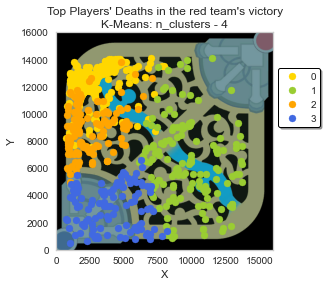

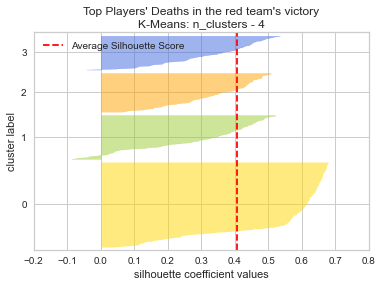

Silhouette score: 0.4068140502670817
0    278
1    145
2    128
3    112
Name: cluster, dtype: int64

Inertia: 475.1311838711362

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3004.888489  12317.830935  -0.895683
1        1   9685.406897   6427.462069   0.351724
2        2   2482.304688   8945.218750   0.320312
3        3   4058.151786   3141.758929   0.571429

In [933]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "orange", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

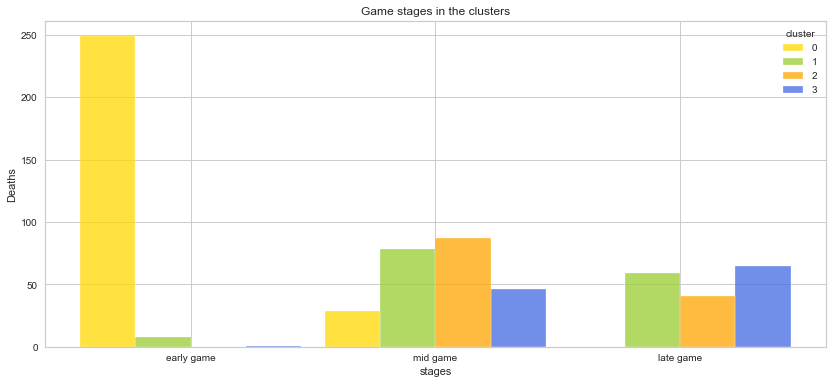

In [934]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

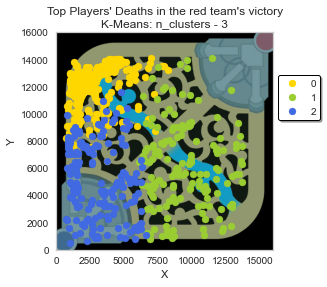

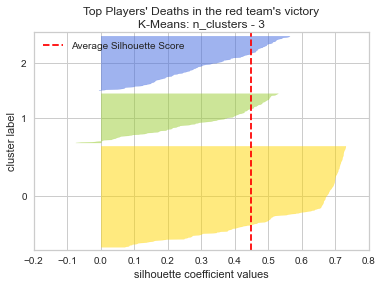

Silhouette score: 0.44790172347762747
0    327
2    176
1    160
Name: cluster, dtype: int64

Inertia: 586.1025893443907

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2939.088685  12043.553517  -0.749235
1        1   9425.093750   6134.831250   0.375000
2        2   3084.625000   5303.346591   0.522727

In [935]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [936]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1501.596435   1511.060301   0.460811
1        1   2087.731229   3121.365799   0.578252
2        2   1684.410180   2762.077063   0.510732

In [937]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8281.0             775.0           14104.0   
1        1           13713.0            6140.0           14143.0   
2        2            6616.0             733.0           11642.0   

   min coordinate_y  max timestamp  min timestamp  
0            6510.0              1             -1  
1             800.0              1             -1  
2             486.0              1             -1

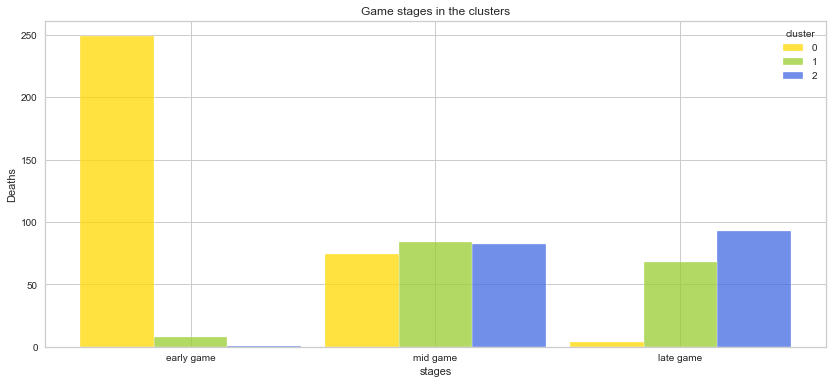

In [938]:
stagesPerClusterV2(redSideVictory_df, colors)

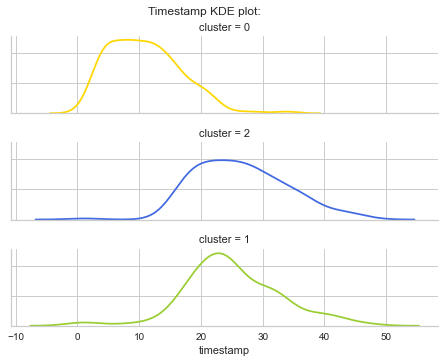

In [939]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [940]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Illaoi            23
Jax               14
Gangplank         11
Pantheon          11
Nasus              6
Malphite           6
Zac                6
Olaf               5
Garen              4
Gnar               4
Fiora              4
Jayce              4
Ornn               2
Sion               2
Tryndamere         2
Yorick             2
Rumble             2
Renekton           1
Shen               1
Mordekaiser        1
Cassiopeia         1
KSante             1
Sett               1

Deaths with each champion:

In [941]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Illaoi         133
Jax             78
Gangplank       77
Malphite        46
Jayce           36
Fiora           35
Pantheon        34
Gnar            32
Garen           29
Zac             27
Nasus           25
Olaf            17
Yorick          17
Ornn            14
Tryndamere      13
Sion            11
Rumble          10
Mordekaiser      9
Sett             7
Shen             6
Cassiopeia       5
KSante           1
Renekton         1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [942]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 23 champions when they won on the red side

Cluster 0 - died with 22 champions:
 ['Cassiopeia' 'Fiora' 'Gangplank' 'Garen' 'Gnar' 'Illaoi' 'Jax' 'Jayce'
 'Malphite' 'Mordekaiser' 'Nasus' 'Olaf' 'Ornn' 'Pantheon' 'Renekton'
 'Rumble' 'Sett' 'Shen' 'Sion' 'Tryndamere' 'Yorick' 'Zac']
Illaoi         63
Gangplank      44
Jax            40
Gnar           18
Fiora          18
Malphite       18
Jayce          17
Pantheon       16
Garen          13
Zac            13
Nasus          13
Olaf           10
Yorick         10
Ornn            9
Sett            5
Shen            4
Sion            4
Mordekaiser     4
Tryndamere      3
Cassiopeia      2
Rumble          2
Renekton        1
Name: champion, dtype: int64

Cluster 1 - died with 20 champions:
 ['Fiora' 'Gangplank' 'Garen' 'Gnar' 'Illaoi' 'Jax' 'Jayce' 'Malphite'
 'Mordekaiser' 'Nasus' 'Olaf' 'Ornn' 'Pantheon' 'Rumble' 'Sett' 'Shen'
 'Sion' 'Tryndamere' 'Yorick' 'Zac']
Illaoi         29
Gangplank      17
Jax         

---
#### Clustering Red Team Defeat

In [943]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region  champion  timestamp  \
51820   EUW1_6278371657  Red  anonymous 164   euw1    Illaoi   6.834500   
51852   EUW1_6278371657  Red  anonymous 164   euw1    Illaoi  25.401833   
51862   EUW1_6278371657  Red  anonymous 164   euw1    Illaoi  31.787000   
52142   EUW1_6277550869  Red  anonymous 164   euw1  Pantheon   2.975533   
52150   EUW1_6277550869  Red  anonymous 164   euw1  Pantheon   6.334400   
...                 ...  ...            ...    ...       ...        ...   
641648  EUW1_6289329486  Red  anonymous 164   euw1  Pantheon  16.968167   
641656  EUW1_6289329486  Red  anonymous 164   euw1  Pantheon  21.400217   
641670  EUW1_6289329486  Red  anonymous 164   euw1  Pantheon  27.296100   
641684  EUW1_6289329486  Red  anonymous 164   euw1  Pantheon  32.407800   
641686  EUW1_6289329486  Red  anonymous 164   euw1  Pantheon  33.914550   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
51820         1961.0       11591.0    NaN            NaN  ...   
51852        13982.0        7319.0    NaN            NaN  ...   
51862        10727.0       14007.0    NaN            NaN  ...   
52142         3765.0       13342.0    NaN            NaN  ...   
52150         4047.0       13450.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
641648        4126.0       12537.0    NaN            NaN  ...   
641656        4391.0       12442.0    NaN            NaN  ...   
641670        8822.0        8560.0    NaN            NaN  ...   
641684       10143.0        7274.0    NaN            NaN  ...   
641686       12735.0       13650.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
51820               NaN    False      Death        NaN           NaN   NaN   
51852               NaN    False      Death        NaN           NaN   NaN   
51862               NaN    False      Death        NaN           NaN   NaN   
52142               NaN    False      Death        NaN           NaN   NaN   
52150               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
641648              NaN    False      Death        NaN           NaN   NaN   
641656              NaN    False      Death        NaN           NaN   NaN   
641670              NaN    False      Death        NaN           NaN   NaN   
641684              NaN    False      Death        NaN           NaN   NaN   
641686              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role      rank  
51820       NaN       NaN   TOP  Platinum  
51852       NaN       NaN   TOP  Platinum  
51862       NaN       NaN   TOP  Platinum  
52142       NaN       NaN   TOP  Platinum  
52150       NaN       NaN   TOP  Platinum  
...         ...       ...   ...       ...  
641648      NaN       NaN   TOP  Platinum  
641656      NaN       NaN   TOP  Platinum  
641670      NaN       NaN   TOP  Platinum  
641684      NaN       NaN   TOP  Platinum  
641686      NaN       NaN   TOP  Platinum  

[1031 rows x 56 columns]

In [944]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)].copy()

In [945]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 164 lost 21 matches on the red side
anonymous 164 has an average of 6.0 deaths per game when losing on the red side

anonymous 167 lost 17 matches on the red side
anonymous 167 has an average of 9.529411764705882 deaths per game when losing on the red side

anonymous 25 lost 12 matches on the red side
anonymous 25 has an average of 9.333333333333334 deaths per game when losing on the red side

anonymous 27 lost 8 matches on the red side
anonymous 27 has an average of 7.625 deaths per game when losing on the red side

anonymous 38 lost 29 matches on the red side
anonymous 38 has an average of 7.0 deaths per game when losing on the red side

anonymous 41 lost 26 matches on the red side
anonymous 41 has an average of 7.846153846153846 deaths per game when losing on the red side

anonymous 42 lost 9 matches on the red side
anonymous 42 has an average of 6.666666666666667 deaths per game when losing on the red side

anonymous 47 lost 14 matches on the red side
anonymous 47 has an 

In [946]:
print("Defeat games on red side contains {} matches in which the top died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 136 matches in which the top died at least once
8 players died a total of 1031 times on the red side
Defeat games on red side contains an average of 7.580882352941177 deaths per game


In [947]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
51820         1961.0       11591.0   6.834500
51852        13982.0        7319.0  25.401833
51862        10727.0       14007.0  31.787000
52142         3765.0       13342.0   2.975533
52150         4047.0       13450.0   6.334400
...              ...           ...        ...
641648        4126.0       12537.0  16.968167
641656        4391.0       12442.0  21.400217
641670        8822.0        8560.0  27.296100
641684       10143.0        7274.0  32.407800
641686       12735.0       13650.0  33.914550

[1031 rows x 3 columns]

Time discretization

In [948]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [949]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [950]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [951]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [952]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
51820      -1.042859      0.417990         -1
51852       2.066370     -0.860880          1
51862       1.224465      1.141246          1
52142      -0.576255      0.942171         -1
52150      -0.503315      0.974502         -1
...              ...           ...        ...
641648     -0.482882      0.701185          0
641656     -0.414340      0.672746          0
641670      0.731737     -0.489373          1
641684      1.073413     -0.874352          1
641686      1.743834      1.034374          1

[1031 rows x 3 columns]

In [953]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4619755730204061
Silhouette score for k=3: 0.43979687530636247
Silhouette score for k=4: 0.42358429280934523
Silhouette score for k=5: 0.39062160312728006
Silhouette score for k=6: 0.3918243673011831
Silhouette score for k=7: 0.39837067086080075
Silhouette score for k=8: 0.40094316283911846
Silhouette score for k=9: 0.3669450690104463
Silhouette score for k=10: 0.3693102219874814
Silhouette score for k=11: 0.37515571445657586
Silhouette score for k=12: 0.3818529886613085
Silhouette score for k=13: 0.39458509224271376
Silhouette score for k=14: 0.3978471443690651
Silhouette score for k=15: 0.40434161424711507
Silhouette score for k=16: 0.3900116508712405
Silhouette score for k=17: 0.4039916095181511
Silhouette score for k=18: 0.39631691404455655
Silhouette score for k=19: 0.4091707950219833
Silhouette score for k=20: 0.39790452014419325
Silhouette score for k=25: 0.41198887984211124


K-Means with k = 4

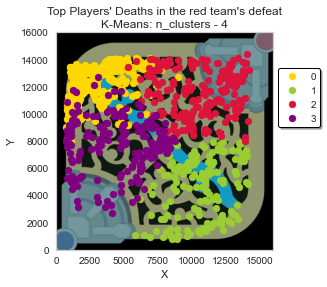

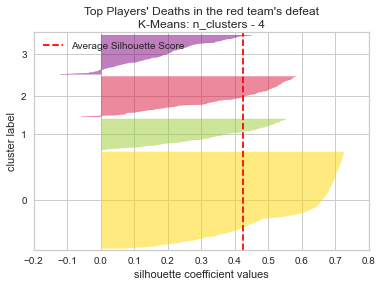

Silhouette score: 0.42358429280934523
0    480
2    201
3    196
1    154
Name: cluster, dtype: int64

Inertia: 771.2533843045057

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3172.262500  12445.604167  -0.772917
1        1  10627.175325   4543.720779   0.383117
2        2  10502.029851  11515.781095   0.492537
3        3   4635.387755   7767.693878   0.244898

In [954]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson", "purple"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

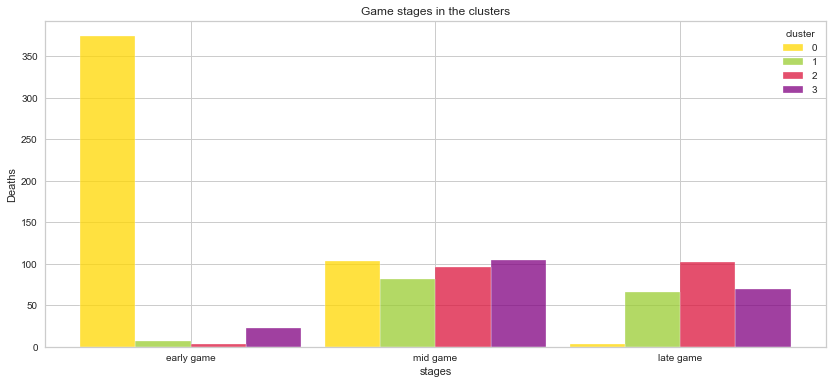

In [955]:
stagesPerClusterV2(redSideDefeat_df, colors)

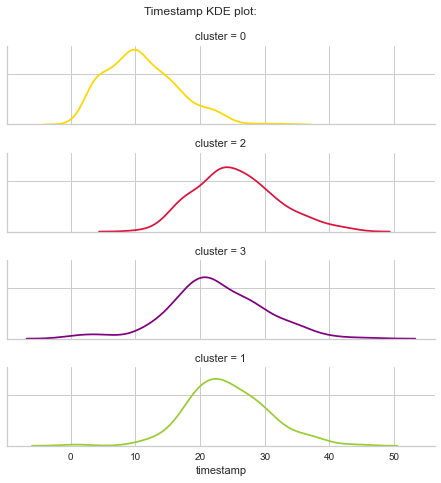

In [956]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

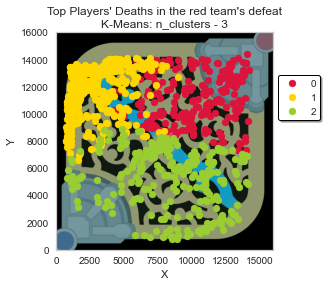

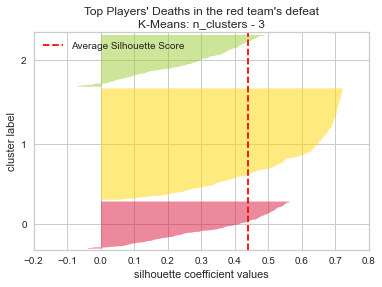

Silhouette score: 0.43979687530636247
1    547
2    254
0    230
Name: cluster, dtype: int64

Inertia: 962.9524545901037

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10161.408696  11239.947826   0.513043
1        1   3128.915905  12027.636197  -0.683729
2        2   8386.118110   5301.015748   0.358268

In [957]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [958]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2501.494456   1804.114174   0.525278
1        1   1571.792555   1610.772873   0.506422
2        2   3249.741188   2141.468076   0.609626

In [959]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14184.0            3860.0           14422.0   
1        1            8988.0             726.0           14106.0   
2        2           14122.0             822.0            8869.0   

   min coordinate_y  max timestamp  min timestamp  
0            7319.0              1             -1  
1            6630.0              1             -1  
2             816.0              1             -1

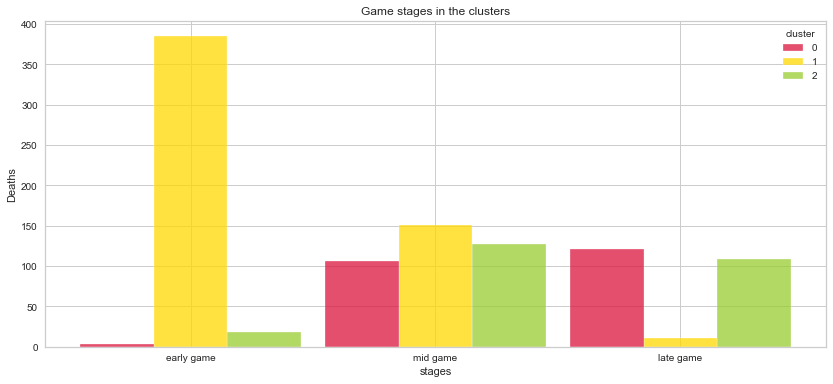

In [960]:
stagesPerClusterV2(redSideDefeat_df, colors)

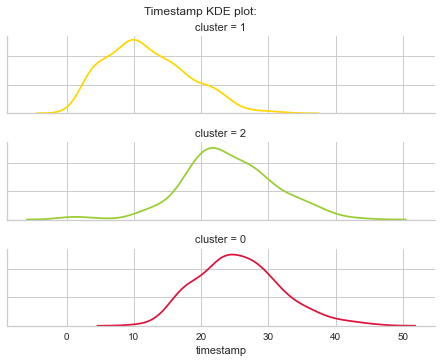

In [961]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [962]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Illaoi           29
Gangplank        19
Jax              14
KSante           10
Garen             9
Pantheon          7
Nasus             6
Gnar              6
Olaf              5
Shen              5
Sion              5
Malphite          3
Jayce             2
Rumble            2
Fiora             2
Zac               2
Senna             1
DrMundo           1
Udyr              1
Kayle             1
Urgot             1
Lillia            1
Camille           1
Tryndamere        1
Renekton          1
Ornn              1

Deaths with each champion:

In [963]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Illaoi        202
Gangplank     180
Jax           100
Gnar           60
KSante         59
Nasus          59
Garen          55
Pantheon       50
Sion           48
Olaf           39
Shen           30
Malphite       19
Fiora          19
Zac            13
Rumble         13
Senna          11
Urgot          11
DrMundo        10
Udyr            8
Kayle           8
Renekton        8
Jayce           8
Ornn            8
Tryndamere      6
Lillia          5
Camille         2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [964]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 26 champions when they won on the red side

Cluster 0 - died with 24 champions:
 ['DrMundo' 'Fiora' 'Gangplank' 'Garen' 'Gnar' 'Illaoi' 'Jax' 'Jayce'
 'KSante' 'Kayle' 'Lillia' 'Malphite' 'Nasus' 'Olaf' 'Ornn' 'Pantheon'
 'Rumble' 'Senna' 'Shen' 'Sion' 'Tryndamere' 'Udyr' 'Urgot' 'Zac']
Gangplank     46
Illaoi        38
Jax           18
Nasus         15
Pantheon      14
KSante        14
Gnar          13
Olaf          11
Shen           7
Garen          7
Sion           7
Senna          5
Rumble         5
Zac            5
Malphite       5
Fiora          4
Ornn           3
Urgot          2
Kayle          2
Lillia         2
DrMundo        2
Udyr           2
Jayce          2
Tryndamere     1
Name: champion, dtype: int64

Cluster 1 - died with 26 champions:
 ['Camille' 'DrMundo' 'Fiora' 'Gangplank' 'Garen' 'Gnar' 'Illaoi' 'Jax'
 'Jayce' 'KSante' 'Kayle' 'Lillia' 'Malphite' 'Nasus' 'Olaf' 'Ornn'
 'Pantheon' 'Renekton' 'Rumble' 'Senna' 'Shen' 'Sion' 'Tryndamere' 'Ud

---
#### Clustering Blue Team Victory

In [965]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region  champion  timestamp  \
51683   EUW1_6278793167  Blue  anonymous 164   euw1  Pantheon  15.243983   
51758   EUW1_6278418523  Blue  anonymous 164   euw1  Pantheon   9.762150   
51763   EUW1_6278418523  Blue  anonymous 164   euw1  Pantheon  12.464517   
51774   EUW1_6278418523  Blue  anonymous 164   euw1  Pantheon  17.561383   
51802   EUW1_6278418523  Blue  anonymous 164   euw1  Pantheon  27.913783   
...                 ...   ...            ...    ...       ...        ...   
642457  EUW1_6282329749  Blue  anonymous 167   euw1     Jayce  12.692917   
642462  EUW1_6282329749  Blue  anonymous 167   euw1     Jayce  14.778650   
642466  EUW1_6282329749  Blue  anonymous 167   euw1     Jayce  16.520733   
642469  EUW1_6282329749  Blue  anonymous 167   euw1     Jayce  18.120183   
642495  EUW1_6282329749  Blue  anonymous 167   euw1     Jayce  29.846683   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
51683         3062.0       13683.0    NaN            NaN  ...   
51758         3282.0       11006.0    NaN            NaN  ...   
51763         1064.0       10269.0    NaN            NaN  ...   
51774         9390.0        8824.0    NaN            NaN  ...   
51802        13380.0       12416.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642457        3203.0       13671.0    NaN            NaN  ...   
642462        6684.0       14045.0    NaN            NaN  ...   
642466        3015.0       13352.0    NaN            NaN  ...   
642469        4441.0       13562.0    NaN            NaN  ...   
642495        8753.0       12538.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
51683               NaN     True      Death        NaN           NaN   NaN   
51758               NaN     True      Death        NaN           NaN   NaN   
51763               NaN     True      Death        NaN           NaN   NaN   
51774               NaN     True      Death        NaN           NaN   NaN   
51802               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642457              NaN     True      Death        NaN           NaN   NaN   
642462              NaN     True      Death        NaN           NaN   NaN   
642466              NaN     True      Death        NaN           NaN   NaN   
642469              NaN     True      Death        NaN           NaN   NaN   
642495              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role      rank  
51683       NaN       NaN   TOP  Platinum  
51758       NaN       NaN   TOP  Platinum  
51763       NaN       NaN   TOP  Platinum  
51774       NaN       NaN   TOP  Platinum  
51802       NaN       NaN   TOP  Platinum  
...         ...       ...   ...       ...  
642457      NaN       NaN   TOP  Platinum  
642462      NaN       NaN   TOP  Platinum  
642466      NaN       NaN   TOP  Platinum  
642469      NaN       NaN   TOP  Platinum  
642495      NaN       NaN   TOP  Platinum  

[759 rows x 56 columns]

In [966]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)].copy()

In [967]:
blueSideGames_df = top_deaths_df[top_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [968]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

148

In [969]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

58.26771653543307

In [970]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

13.163371488033299

In [971]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 164 won 23 matches on the blue side
anonymous 164 has an average of 3.782608695652174 deaths per game when winning on the blue side

anonymous 167 won 21 matches on the blue side
anonymous 167 has an average of 6.761904761904762 deaths per game when winning on the blue side

anonymous 25 won 9 matches on the blue side
anonymous 25 has an average of 4.888888888888889 deaths per game when winning on the blue side

anonymous 27 won 5 matches on the blue side
anonymous 27 has an average of 5.6 deaths per game when winning on the blue side

anonymous 38 won 31 matches on the blue side
anonymous 38 has an average of 5.419354838709677 deaths per game when winning on the blue side

anonymous 41 won 30 matches on the blue side
anonymous 41 has an average of 6.2 deaths per game when winning on the blue side

anonymous 42 won 14 matches on the blue side
anonymous 42 has an average of 3.857142857142857 deaths per game when winning on the blue side

anonymous 47 won 15 matches on the blue

In [972]:
print("Victory games on blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 148 matches in which the top died at least once
8 players died a total of 759 times on the blue side
Victory games on blue side contains an average of 5.128378378378378 deaths per game


In [973]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
51683         3062.0       13683.0  15.243983
51758         3282.0       11006.0   9.762150
51763         1064.0       10269.0  12.464517
51774         9390.0        8824.0  17.561383
51802        13380.0       12416.0  27.913783
...              ...           ...        ...
642457        3203.0       13671.0  12.692917
642462        6684.0       14045.0  14.778650
642466        3015.0       13352.0  16.520733
642469        4441.0       13562.0  18.120183
642495        8753.0       12538.0  29.846683

[759 rows x 3 columns]

Time discretization

In [974]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [975]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [976]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [977]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [978]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
51683      -0.764734      1.042081          0
51758      -0.711009      0.178053         -1
51763      -1.252664     -0.059821         -1
51774       0.780619     -0.526209          0
51802       1.755012      0.633145          1
...              ...           ...        ...
642457     -0.730301      1.038208         -1
642462      0.119790      1.158920         -1
642466     -0.776212      0.935248          0
642469     -0.427971      1.003027          0
642495      0.625058      0.672521          1

[759 rows x 3 columns]

In [979]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4871982416598394
Silhouette score for k=3: 0.43495588060040585
Silhouette score for k=4: 0.3921378416957479
Silhouette score for k=5: 0.4017567997595034
Silhouette score for k=6: 0.3921504656288753
Silhouette score for k=7: 0.387259630818904
Silhouette score for k=8: 0.3619340828662287
Silhouette score for k=9: 0.36998791361310024
Silhouette score for k=10: 0.36908761205192314
Silhouette score for k=11: 0.3844644817530503
Silhouette score for k=12: 0.38335258410851103
Silhouette score for k=13: 0.3842868869664829
Silhouette score for k=14: 0.3924926108054377
Silhouette score for k=15: 0.391552634025359
Silhouette score for k=16: 0.40287123491236904
Silhouette score for k=17: 0.38095705200542107
Silhouette score for k=18: 0.40957763344554543
Silhouette score for k=19: 0.3895874613763848
Silhouette score for k=20: 0.4106414895393502
Silhouette score for k=25: 0.3899018147766904


K-Means with k = 4

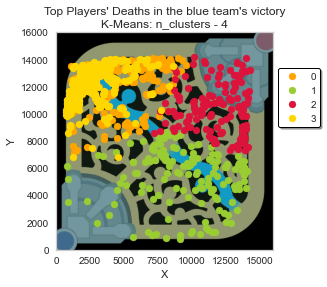

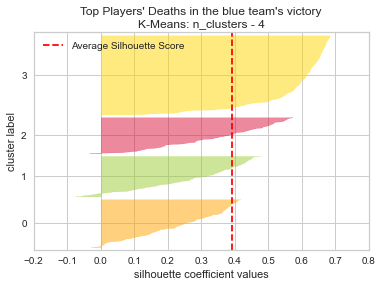

Silhouette score: 0.3921378416957479
3    295
0    179
1    151
2    134
Name: cluster, dtype: int64

Inertia: 539.1703692239537

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5015.770950  12035.787709   0.162011
1        1   9336.827815   5350.357616   0.350993
2        2  11705.276119  10540.126866   0.574627
3        3   2795.454237  12068.332203  -1.000000

In [980]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["orange", "yellowgreen", "crimson", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

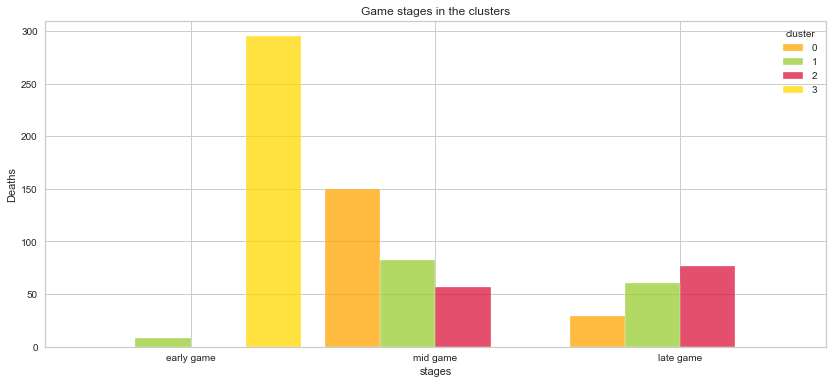

In [981]:
stagesPerClusterV2(blueSideVictory_df, colors)

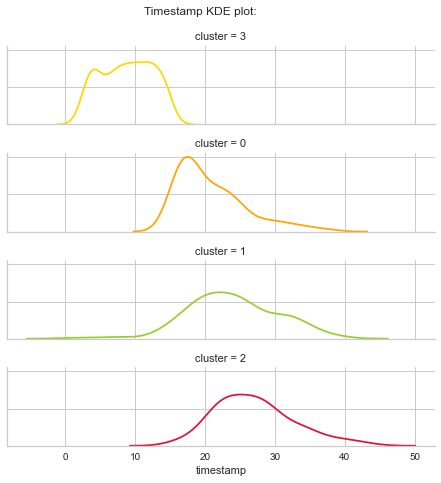

In [982]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

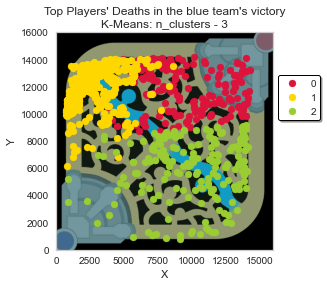

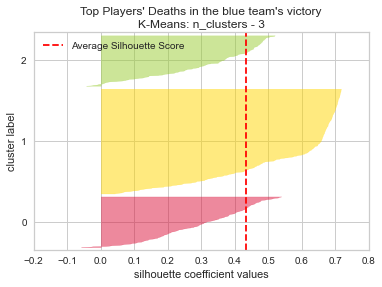

Silhouette score: 0.43495588060040585
1    386
0    187
2    186
Name: cluster, dtype: int64

Inertia: 659.7524326311116

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9345.385027  11883.529412   0.475936
1        1   2890.974093  11948.222798  -0.756477
2        2   9878.209677   5917.263441   0.360215

In [983]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [984]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2811.222345   1598.416671   0.499421
1        1   1552.756821   1489.215517   0.446949
2        2   3045.563799   2174.943089   0.562567

In [985]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14273.0            2938.0           14153.0   
1        1            8581.0             773.0           14061.0   
2        2           14122.0             890.0            9160.0   

   min coordinate_y  max timestamp  min timestamp  
0            8712.0              1              0  
1            6148.0              1             -1  
2             812.0              1             -1

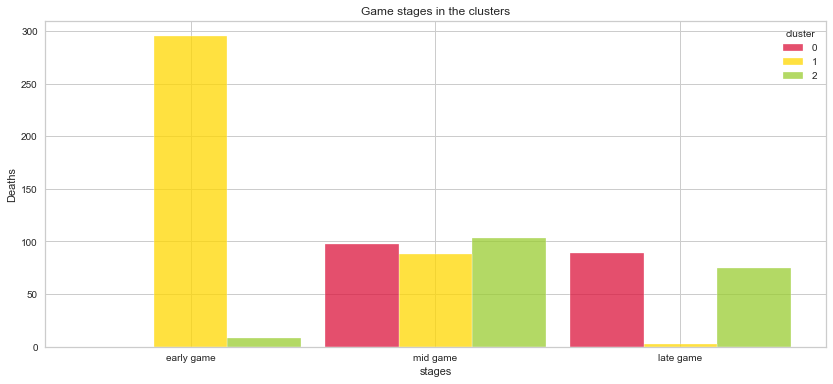

In [986]:
stagesPerClusterV2(blueSideVictory_df, colors)

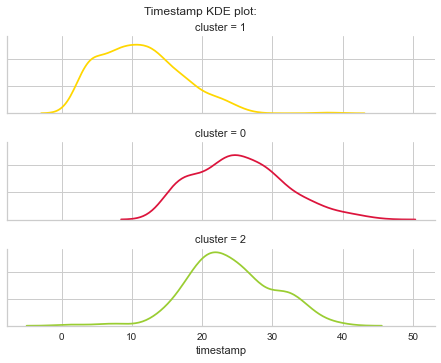

In [987]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [988]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Illaoi            32
Jax               24
Gangplank         17
Garen             12
Pantheon          11
Jayce              6
KSante             6
Malphite           6
Zac                4
Tryndamere         4
Rumble             3
Gnar               3
Gwen               2
Akshan             2
Olaf               2
Sion               2
Nasus              2
Fiora              2
Warwick            1
Kayle              1
Renekton           1
Cassiopeia         1
Mordekaiser        1
Ornn               1
Darius             1
Camille            1

Deaths with each champion:

In [989]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Illaoi         191
Jax            126
Gangplank       98
Garen           52
Pantheon        40
Jayce           36
KSante          35
Tryndamere      22
Zac             18
Malphite        16
Gnar            14
Sion            14
Rumble          13
Fiora           10
Ornn            10
Warwick         10
Kayle            9
Cassiopeia       9
Akshan           8
Olaf             6
Renekton         5
Darius           4
Nasus            4
Camille          4
Gwen             3
Mordekaiser      2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [990]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 26 champions when they won on the red side

Cluster 0 - died with 22 champions:
 ['Akshan' 'Camille' 'Cassiopeia' 'Darius' 'Fiora' 'Gangplank' 'Garen'
 'Gnar' 'Illaoi' 'Jax' 'Jayce' 'KSante' 'Kayle' 'Malphite' 'Mordekaiser'
 'Pantheon' 'Renekton' 'Rumble' 'Sion' 'Tryndamere' 'Warwick' 'Zac']
Illaoi         77
Jax            28
Gangplank      19
Garen          17
KSante          8
Jayce           5
Tryndamere      4
Pantheon        4
Malphite        4
Sion            3
Fiora           3
Mordekaiser     2
Gnar            2
Darius          2
Kayle           2
Renekton        1
Rumble          1
Zac             1
Cassiopeia      1
Warwick         1
Akshan          1
Camille         1
Name: champion, dtype: int64

Cluster 1 - died with 25 champions:
 ['Akshan' 'Camille' 'Cassiopeia' 'Darius' 'Fiora' 'Gangplank' 'Garen'
 'Gnar' 'Gwen' 'Illaoi' 'Jax' 'Jayce' 'KSante' 'Kayle' 'Malphite' 'Nasus'
 'Olaf' 'Ornn' 'Pantheon' 'Renekton' 'Rumble' 'Sion' 'Tryndamere'
 'Warw

---
#### Clustering Blue Team Defeat

In [991]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region  champion  timestamp  \
52497   EUW1_6276997866  Blue  anonymous 164   euw1      Shen  10.574450   
52504   EUW1_6276997866  Blue  anonymous 164   euw1      Shen  13.185683   
52508   EUW1_6276997866  Blue  anonymous 164   euw1      Shen  14.878383   
52513   EUW1_6276997866  Blue  anonymous 164   euw1      Shen  16.491433   
52525   EUW1_6276997866  Blue  anonymous 164   euw1      Shen  22.026183   
...                 ...   ...            ...    ...       ...        ...   
641318  EUW1_6289773753  Blue  anonymous 164   euw1  Pantheon  14.907683   
641320  EUW1_6289773753  Blue  anonymous 164   euw1  Pantheon  15.937817   
641323  EUW1_6289773753  Blue  anonymous 164   euw1  Pantheon  17.190450   
641330  EUW1_6289773753  Blue  anonymous 164   euw1  Pantheon  22.174250   
641339  EUW1_6289773753  Blue  anonymous 164   euw1  Pantheon  26.019550   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
52497         7120.0       12532.0    NaN            NaN  ...   
52504         1531.0       11201.0    NaN            NaN  ...   
52508        10873.0        5451.0    NaN            NaN  ...   
52513         1128.0       10390.0    NaN            NaN  ...   
52525         6391.0        6253.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
641318        4100.0       12791.0    NaN            NaN  ...   
641320         853.0        8120.0    NaN            NaN  ...   
641323        7092.0        3859.0    NaN            NaN  ...   
641330       10050.0        2572.0    NaN            NaN  ...   
641339         826.0       10823.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
52497               NaN    False      Death        NaN           NaN   NaN   
52504               NaN    False      Death        NaN           NaN   NaN   
52508               NaN    False      Death        NaN           NaN   NaN   
52513               NaN    False      Death        NaN           NaN   NaN   
52525               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
641318              NaN    False      Death        NaN           NaN   NaN   
641320              NaN    False      Death        NaN           NaN   NaN   
641323              NaN    False      Death        NaN           NaN   NaN   
641330              NaN    False      Death        NaN           NaN   NaN   
641339              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName  role      rank  
52497       NaN       NaN   TOP  Platinum  
52504       NaN       NaN   TOP  Platinum  
52508       NaN       NaN   TOP  Platinum  
52513       NaN       NaN   TOP  Platinum  
52525       NaN       NaN   TOP  Platinum  
...         ...       ...   ...       ...  
641318      NaN       NaN   TOP  Platinum  
641320      NaN       NaN   TOP  Platinum  
641323      NaN       NaN   TOP  Platinum  
641330      NaN       NaN   TOP  Platinum  
641339      NaN       NaN   TOP  Platinum  

[837 rows x 56 columns]

In [992]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)].copy()

In [993]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 164 lost 8 matches on the blue side
anonymous 164 has an average of 5.875 deaths per game when losing on the blue side

anonymous 167 lost 3 matches on the blue side
anonymous 167 has an average of 9.666666666666666 deaths per game when losing on the blue side

anonymous 25 lost 10 matches on the blue side
anonymous 25 has an average of 8.2 deaths per game when losing on the blue side

anonymous 27 lost 5 matches on the blue side
anonymous 27 has an average of 6.2 deaths per game when losing on the blue side

anonymous 38 lost 23 matches on the blue side
anonymous 38 has an average of 8.304347826086957 deaths per game when losing on the blue side

anonymous 41 lost 25 matches on the blue side
anonymous 41 has an average of 9.08 deaths per game when losing on the blue side

anonymous 42 lost 14 matches on the blue side
anonymous 42 has an average of 6.857142857142857 deaths per game when losing on the blue side

anonymous 47 lost 18 matches on the blue side
anonymous 47 has an

In [994]:
print("Defeat games on blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 106 matches in which the top died at least once
8 players died a total of 837 times on the blue side
Defeat games on blue side contains an average of 7.89622641509434 deaths per game


In [995]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
52497         7120.0       12532.0  10.574450
52504         1531.0       11201.0  13.185683
52508        10873.0        5451.0  14.878383
52513         1128.0       10390.0  16.491433
52525         6391.0        6253.0  22.026183
...              ...           ...        ...
641318        4100.0       12791.0  14.907683
641320         853.0        8120.0  15.937817
641323        7092.0        3859.0  17.190450
641330       10050.0        2572.0  22.174250
641339         826.0       10823.0  26.019550

[837 rows x 3 columns]

Time discretization

In [996]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [997]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [998]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [999]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [1000]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
52497       0.618603      0.980653         -1
52504      -0.894485      0.646903         -1
52508       1.634639     -0.794917         -1
52513      -1.003588      0.443544          0
52525       0.421244     -0.593814          0
...              ...           ...        ...
641318     -0.198990      1.045597         -1
641320     -1.078038     -0.125662          0
641323      0.611023     -1.194113          0
641330      1.411831     -1.516829          0
641339     -1.085347      0.552119          1

[837 rows x 3 columns]

In [1001]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.48142710768319247
Silhouette score for k=3: 0.45713257749345554
Silhouette score for k=4: 0.4197103374186704
Silhouette score for k=5: 0.41910277023394776
Silhouette score for k=6: 0.4189260370907605
Silhouette score for k=7: 0.42737426495133685
Silhouette score for k=8: 0.440928630950534
Silhouette score for k=9: 0.3849345939183145
Silhouette score for k=10: 0.3785736782787891
Silhouette score for k=11: 0.3858721846133652
Silhouette score for k=12: 0.4027529198018947
Silhouette score for k=13: 0.39939267862081695
Silhouette score for k=14: 0.4044239165104258
Silhouette score for k=15: 0.40981001713029247
Silhouette score for k=16: 0.41332599923010144
Silhouette score for k=17: 0.38579238384449194
Silhouette score for k=18: 0.4046401974565332
Silhouette score for k=19: 0.40885147675646
Silhouette score for k=20: 0.4114013126989485
Silhouette score for k=25: 0.41735435939459914


K-Means with k = 3

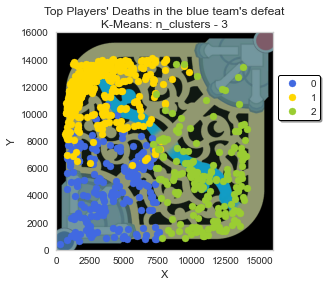

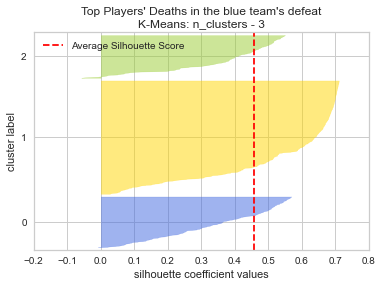

Silhouette score: 0.45713257749345554
1    458
0    206
2    173
Name: cluster, dtype: int64

Inertia: 726.951547204719

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3943.184466   4681.126214   0.504854
1        1   2932.631004  11652.524017  -0.679039
2        2  10933.369942   5287.439306   0.393064

In [1002]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [1003]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2019.876817   2477.017068   0.519032
1        1   1902.396082   1641.202592   0.532398
2        2   1963.132268   2929.887806   0.585330

In [1004]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            7598.0             301.0           10645.0   
1        1            9756.0             702.0           14086.0   
2        2           14053.0            7157.0           13707.0   

   min coordinate_y  max timestamp  min timestamp  
0             452.0              1             -1  
1            6206.0              1             -1  
2             854.0              1             -1

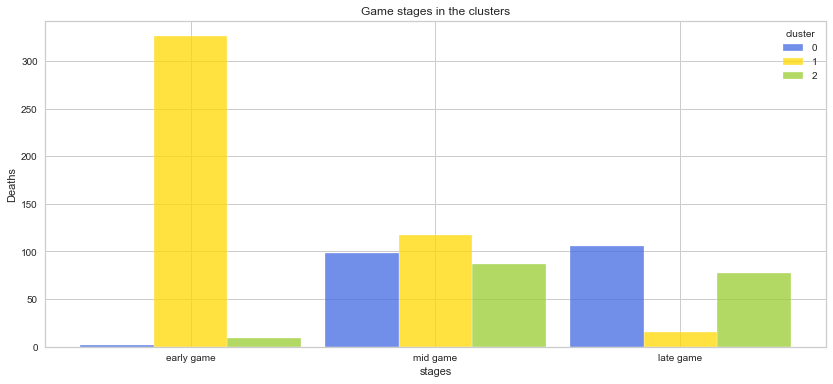

In [1005]:
stagesPerClusterV2(blueSideDefeat_df, colors)

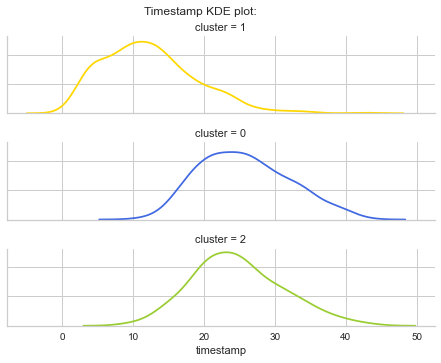

In [1006]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [1007]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Illaoi           23
Jax              16
Nasus            10
Gangplank         7
Pantheon          6
Garen             5
Malphite          5
KSante            5
Gnar              4
Jayce             4
Sion              4
Olaf              3
Zac               3
Cassiopeia        2
Fiora             1
Warwick           1
Akshan            1
Shen              1
Soraka            1
Yorick            1
Chogath           1
Sett              1
Irelia            1

Deaths with each champion:

In [1008]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Illaoi        207
Jax           128
Nasus          71
Gangplank      63
Garen          41
KSante         40
Malphite       37
Sion           36
Pantheon       35
Gnar           30
Olaf           29
Jayce          22
Zac            17
Sett           12
Cassiopeia     11
Irelia         10
Fiora          10
Yorick          8
Soraka          7
Warwick         6
Akshan          6
Shen            6
Chogath         5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [1009]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 23 champions when they won on the red side

Cluster 0 - died with 23 champions:
 ['Akshan' 'Cassiopeia' 'Chogath' 'Fiora' 'Gangplank' 'Garen' 'Gnar'
 'Illaoi' 'Irelia' 'Jax' 'Jayce' 'KSante' 'Malphite' 'Nasus' 'Olaf'
 'Pantheon' 'Sett' 'Shen' 'Sion' 'Soraka' 'Warwick' 'Yorick' 'Zac']
Illaoi        34
Jax           34
Gangplank     20
Malphite      13
Nasus         13
Garen         13
Sion          10
Pantheon      10
KSante         9
Jayce          9
Olaf           9
Zac            6
Gnar           5
Sett           4
Akshan         3
Cassiopeia     3
Shen           2
Yorick         2
Soraka         2
Irelia         2
Fiora          1
Warwick        1
Chogath        1
Name: champion, dtype: int64

Cluster 1 - died with 23 champions:
 ['Akshan' 'Cassiopeia' 'Chogath' 'Fiora' 'Gangplank' 'Garen' 'Gnar'
 'Illaoi' 'Irelia' 'Jax' 'Jayce' 'KSante' 'Malphite' 'Nasus' 'Olaf'
 'Pantheon' 'Sett' 'Shen' 'Sion' 'Soraka' 'Warwick' 'Yorick' 'Zac']
Illaoi        133
Jax    

---

### Blue Win Rate vs Red Win Rate

In [1010]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death")]

wins_df = top_deaths_df[top_deaths_df["victory"] == True]
wins_df

gameId  team       summoner region champion  timestamp  \
3471    EUW1_6276409988  Blue  anonymous 130   euw1   Singed  14.727967   
3488    EUW1_6276409988  Blue  anonymous 130   euw1   Singed  22.273483   
3514    EUW1_6275563297   Red  anonymous 130   euw1   Singed   3.267650   
3520    EUW1_6275563297   Red  anonymous 130   euw1   Singed   5.931200   
3526    EUW1_6275563297   Red  anonymous 130   euw1   Singed   8.785300   
...                 ...   ...            ...    ...      ...        ...   
643269  EUW1_6289931620  Blue  anonymous 180   euw1   Yorick  13.617750   
643430  EUW1_6289796520   Red  anonymous 180   euw1   Yorick  15.175550   
643434  EUW1_6289796520   Red  anonymous 180   euw1   Yorick  17.062267   
643438  EUW1_6289796520   Red  anonymous 180   euw1   Yorick  18.843033   
643443  EUW1_6289796520   Red  anonymous 180   euw1   Yorick  20.601450   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3471          6520.0       13909.0    NaN            NaN  ...   
3488          5429.0       13998.0    NaN            NaN  ...   
3514          3777.0       13520.0    NaN            NaN  ...   
3520          1780.0       11652.0    NaN            NaN  ...   
3526          3208.0       11933.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
643269        3139.0       13226.0    NaN            NaN  ...   
643430        1603.0       11809.0    NaN            NaN  ...   
643434        3029.0       12628.0    NaN            NaN  ...   
643438        3999.0       12762.0    NaN            NaN  ...   
643443        4270.0        9212.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3471                NaN     True      Death        NaN           NaN   NaN   
3488                NaN     True      Death        NaN           NaN   NaN   
3514                NaN     True      Death        NaN           NaN   NaN   
3520                NaN     True      Death        NaN           NaN   NaN   
3526                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
643269              NaN     True      Death        NaN           NaN   NaN   
643430              NaN     True      Death        NaN           NaN   NaN   
643434              NaN     True      Death        NaN           NaN   NaN   
643438              NaN     True      Death        NaN           NaN   NaN   
643443              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName  role  rank  
3471        NaN       NaN   TOP  Gold  
3488        NaN       NaN   TOP  Gold  
3514        NaN       NaN   TOP  Gold  
3520        NaN       NaN   TOP  Gold  
3526        NaN       NaN   TOP  Gold  
...         ...       ...   ...   ...  
643269      NaN       NaN   TOP  Gold  
643430      NaN       NaN   TOP  Gold  
643434      NaN       NaN   TOP  Gold  
643438      NaN       NaN   TOP  Gold  
643443      NaN       NaN   TOP  Gold  

[5176 rows x 56 columns]

In [1011]:
wins = len(np.unique(wins_df["gameId"]))
wins

1048

In [1012]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 49.713740458015266 vs Blue: 50.286259541984734


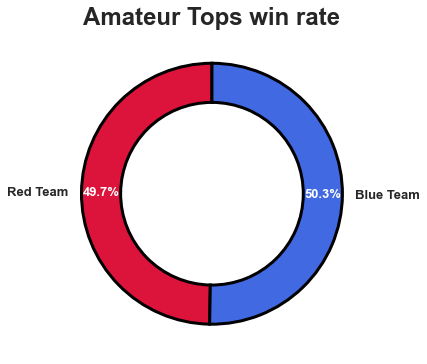

In [1013]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Amateur Tops win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()